# Reunión
* todero aseador
* valor cuota administración  aumenta solo 7,5%
* cuota extraordinaría   2.533.650.  Tengo el mejor apartamento del conjunto   2.46
* 23 de Abril siguiente reunión

# Plan
* carga archivos
* seleccion variables
* clasificaciòn variable
  * definiciones variables categoricas, validar varios escenarios
* construccion dataset
 * se incluye el tratamiento de la información de texto
* preparaciòn de variables dependientes
* aplicación de varias tecnicas y escenarios por variable dependiente
  

# Filtros
* Estado (status) Cerrado
* con información de Failure Code


In [1]:
import pandas as pd
import numpy as np

In [2]:
from IPython.core.display import display, HTML
import warnings
warnings.filterwarnings('ignore')
display(HTML("<style>.container { width:100% !important; }</style>"))
pd.set_option('display.max_columns', None)
pd.set_option('max_colwidth', 800)

In [5]:
import pyLDAvis
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()
import gensim
import pyLDAvis.gensim_models
from gensim.models.coherencemodel import CoherenceModel
from gensim import corpora
from gensim.corpora import Dictionary
from gensim.models import LdaModel

from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk.tokenize import ToktokTokenizer
import nltk
import json, re

C:\ProgramData\Anaconda3\envs\T\lib\site-packages\sklearn\linear_model\_least_angle.py:30: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='lar', copy_X=True, eps=np.finfo(np.float).eps,
C:\ProgramData\Anaconda3\envs\T\lib\site-packages\sklearn\linear_model\_least_angle.py:169: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='la

In [272]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

In [6]:
def limpiar_texto(texto):
    """
    Función para realizar la limpieza de un texto dado.
    """
    # Eliminamos los caracteres especiales
    texto = re.sub(r'\W', ' ', str(texto))
    # Eliminamos comas y /
    texto = re.sub(r',', ' ', str(texto))
    texto = re.sub(r'/', ' ', str(texto))
    # Eliminado las palabras que tengo un solo caracter
    texto = re.sub(r'\s+[a-zA-Z]\s+', ' ', texto)
    # Sustituir los espacios en blanco en uno solo
    texto = re.sub(r'\s+', ' ', texto, flags=re.I)
    # Convertimos textos a minusculas
    texto = texto.lower()
    return texto

In [7]:
nltk.download('stopwords')
STOPWORDS = set(stopwords.words("spanish"))
def filtrar_stopword_digitos(tokens):
    """
    Filtra stopwords y digitos de una lista de tokens.
    """
    return [token for token in tokens if token not in STOPWORDS 
            and not token.isdigit()]

stemmer = SnowballStemmer("spanish")
def stem_palabras(tokens):
    """
    Reduce cada palabra de una lista dada a su raíz.
    """
    return [stemmer.stem(token) for token in tokens]


[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


In [288]:
stemmer = SnowballStemmer("spanish")
def stem_palabras(tokens):
    """
    Reduce cada palabra de una lista dada a su raíz.
    """
    return [stemmer.stem(token) for token in tokens]

In [8]:
def Limpiar_Caracter(texto):
    if len(texto) == 1 or texto == ',':
        texto = ''
    else:
        texto = texto
    return texto

In [9]:
#modelo topicos
### Funciones para modelo de tópicos
def make_bigrams(texts,bigram_mod):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts,bigram_mod,trigram_mod):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def impresionTopicos(mod,nPalabras,nTopicos):
    topicos = mod.print_topics(num_words=nPalabras, num_topics=nTopicos)
    for topico in topicos:
        print(topico)    
        
def impresionTopicosLimp(mod,nPalabras,nTopicos):
    #Impresion limpia de Tópicos
    topicos = mod.print_topics(num_words=nPalabras, num_topics=nTopicos)
    i=0
    for topico in topicos:
        i=i+1
        textoAux = re.sub(r'\W', ' ', str(topico))
        textoAux = re.sub(r'\s+[a-zA-Z]\s+', ' ', textoAux)
        textoAux = re.sub(r'[0-9]', ' ', textoAux)
        textoAux = re.sub(r'\s+', ' ', textoAux, flags=re.I)
        print(str(i),textoAux)

In [10]:
def disbribucionProbTopicos(arr_text):
    bow_comentario = diccionario.doc2bow(arr_text)
    distribucion_noticia = lda[bow_comentario]
    print(len(distribucion_noticia))
    print(distribucion_noticia)
    print (dict(distribucion_noticia))
    df_aux=pd.DataFrame(distribucion_noticia,columns=['ind','prob'])
    print(df_aux)
    df_plan=pd.DataFrame(index=range(0,numeroTopicos))
    df_plan=df_plan.merge(df_aux, left_index=True, right_on='ind', how='left')
    df_plan.fillna(0,inplace=True)
    df_plan.set_index('ind', inplace=True)
    print(df_plan['prob'])
    #return [x[1] for x in distribucion_noticia]    
    return df_plan['prob']

# Carga de Archivos
* maximo.classification.csv
* maximo.classstructure.csv
* maximo.failurecode.csv
* maximo.incident.csv
* maximo.longdescription.csv

In [3]:
df_independientes= pd.read_csv('fuente2/maximo.incident_4_tablas.csv',sep='|', header = 0)
df_dependientes= pd.read_csv('fuente2/maximo.incident_2_tablas.csv',sep='|', header = 0)

In [4]:
df_independientes.head(5)

,ASSETSITEID,ASSIGNEDOWNERGROUP,CHANGEBY,CL_C_TIPO,CL_SERVICIO,CL_SER_AFEC,CREATEDBY,DIAGNOSTICADO,EXTERNALSYSTEM,FAILURECODE,FR1CODE,HASACTIVITY,HASLD,IMPACT,INCCARGAPRIORIDAD,INCEXCLUIR,INCEXCLUIR_ENLD,INC_ALARMA,INTERNALPRIORITY,LANGCODE,MUN100,ONCALLOWNERGROUP,ORIGRECORDCLASS,OUTAGEDURATION,OWNER,PROBLEMCODE,PROVEEDORES,REGIONAL,SRDATOS,SRINTERNET,SRTV,SRVOZ,TICKETID,TICKET_EXT,TIPOCOMUNICADO,URGENCY,WORKTYPE,FR2CODE,CLASSSTRUCTUREID,INCSERVICE,CLASSIFICATIONID,CL_C_DESC_AFECTACION,CL_INC_IMPACTO,C_CL_AFECTA,DESCRIPCION_TECNICA,DESCRIPTION,INCMCANCEL,INCMESTADO,INCMEXCLUSION,INCSOLUCION,STATUS,A,FAILURECODE.1,DESCRIPTION.1,ORGID,FAILURECODEID,LANGCODE.1,HASLD.1,ROWSTAMP,A.1,CLASSSTRUCTUREID.1,DESCRIPTION.2,GENASSETDESC,ORGID.1,PARENT,CLASSIFICATIONID.1,USECLASSINDESC,TYPE,SITEID,CLASSSTRUCTUREUID,HASCHILDREN,LANGCODE.2,HASLD.2,ROWSTAMP.1,SHOWINASSETTOPO,PLUSPISGLOBAL,PLUSPROLLDOWN,PLUSPROLLDOWNATTR,PLUSPINSERTCUSTOMER,SHOWINTOPO,PMCOMTOPOIMG,DISCLASSIFICATION,CLASSIFICATIONGROUPID,COMMODITYGROUP,COMMODITY,PERSONGROUP,PERSON,OWNER.1,INDICATEDPRIORITY,SHOWINIA,A.2,CLASSIFICATIONID.2,DESCRIPTION.3,ORGID.2,SITEID.1,CLASSIFICATIONUID,ROWSTAMP.2,HASLD.3,LANGCODE.3
0,CLAROMOV,NOCBOLSAINC,MAXADMIN,NaN,NaN,NaN,NETCOOL,0,NETCOOL_CA_FS_II,ACCESO_ESTACION_BASE,T_CONEC_CABLES/CONECT,1,1,2.0,2.02,1,0,0,3.0,EN,0,FOSERVICIO,NaN,42.916667,NaN,NaN,ELECTRICARIBE,COSTA,1,0,0,1,INC1972953,5801074,NaN,3.0,CFIBRA,REPAR,I1286,NaN,CONTINUA,NaN,NaN,NaN,NaN,FAOC: MPACC_T1: Fuera de servicio EB BAR.Riomar-2 H3 UMTS/LTE en Barranquilla EB sin PE. (TX) (Cod),NaN,NaN,Falla red de energia electrica comercial AC,NaN,CERRADO,----------,ACCESO_ESTACION_BASE,Fallas asociadas a Estaciones Base Celulares,CLARO,11826,ES,0,5622415560,----------,I1286,SERVICIOS MOVILES \ AFECTACION DE SERVICIO_ACCESO \ CONTINUA,0.0,NaN,INC1006,CONTINUA,1.0,NaN,NaN,7672500.0,0.0,EN,0.0,1.150020e+10,0.0,1.0,1.0,1.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,FOACCESO,NaN,NaN,NaN,0.0,----------,CONTINUA,CONTINUA,NaN,NaN,3235000.0,6.603774e+09,0.0,ES
1,CLAROMOV,CUSTCARE,MAXADMIN,NaN,NaN,NaN,ECM1207B,0,NaN,ACCESO_ESTACION_BASE,NaN,0,1,3.0,2.01,0,0,0,3.0,ES,0,NaN,NaN,0.016667,ECM1207B,NaN,NaN,CENTRO ORIENTE,0,0,0,0,INC921809,NaN,NaN,3.0,ME,NaN,I1512,NaN,RUTINA,NaN,NaN,NaN,NaN,CCP:Revisión sondas Medux #724 #753 *229 *230,NaN,NaN,NaN,"Rutina exitosa, sin novedades de fallas",CERRADO,----------,ACCESO_ESTACION_BASE,Fallas asociadas a Estaciones Base Celulares,CLARO,11826,ES,0,5622415560,----------,I1512,SERVICIOS MOVILES \ PRUEBA \ RUTINA,0.0,NaN,INC1005,RUTINA,1.0,NaN,NaN,7754000.0,0.0,EN,0.0,1.150020e+10,0.0,1.0,1.0,1.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,CUSTCARE,NaN,NaN,NaN,0.0,----------,RUTINA,RUTINA,NaN,NaN,2544500.0,6.603774e+09,0.0,ES
2,CLAROMOV,CUSTCARE,MAXADMIN,NaN,NaN,NaN,ECF3574BB,0,NaN,ACCESO_ESTACION_BASE,NaN,0,1,3.0,2.01,0,0,0,3.0,ES,0,NaN,NaN,0.050000,ECF3574BB,NaN,NaN,CENTRO ORIENTE,0,0,0,0,INC922198,NaN,NaN,3.0,ME,NaN,I1512,NaN,RUTINA,NaN,NaN,NaN,NaN,"CCP: NOC Pruebas por demanda, validación de sondas medux a nivel nacional",NaN,NaN,NaN,NaN,CERRADO,----------,ACCESO_ESTACION_BASE,Fallas asociadas a Estaciones Base Celulares,CLARO,11826,ES,0,5622415560,----------,I1512,SERVICIOS MOVILES \ PRUEBA \ RUTINA,0.0,NaN,INC1005,RUTINA,1.0,NaN,NaN,7754000.0,0.0,EN,0.0,1.150020e+10,0.0,1.0,1.0,1.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,CUSTCARE,NaN,NaN,NaN,0.0,----------,RUTINA,RUTINA,NaN,NaN,2544500.0,6.603774e+09,0.0,ES
3,CLAROMOV,CUSTCARE,MAXADMIN,NaN,NaN,NaN,ECF3574BB,0,NaN,ACCESO_ESTACION_BASE,NaN,0,1,3.0,2.01,0,0,0,3.0,ES,0,NaN,NaN,0.016667,ECF3574BB,NaN,NaN,CENTRO ORIENTE,0,0,0,0,INC922276,NaN,NaN,3.0,ME,NaN,I1512,NaN,RUTINA,NaN,NaN,NaN,NaN,"CCP: NOC Pruebas por demanda, validación de sondas medux a nivel nacional",NaN,NaN,NaN,NaN,CERRADO,----------,ACCESO_ESTACION_BASE,Fallas asociadas a Estaciones Base Celulares,CLARO,11826,ES,0,5622415560,----------,I1512,SERVICIOS MOVILES \ PRUEBA \ RUTINA,0.0,NaN,INC1005,RUTINA,1.0,NaN,NaN,7754000.0,0.0,EN,0.0,1.150020e+10,0.0,1.0,1.0,1.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,CU

In [15]:
# validación filtros
len(df_independientes)

1519015

In [16]:
len(df_independientes[df_independientes['STATUS']=='CERRADO'])

1519015

In [19]:
len(df_independientes[df_independientes['FAILURECODE'].notnull()])

1519015

In [11]:
# validar si estan las columnas seleccionadas

In [12]:
camp_approbados=['ASSETSITEID','ASSIGNEDOWNERGROUP','CL_C_TIPO','CL_SERVICIO','CL_SER_AFEC',
                'DIAGNOSTICADO','EXTERNALSYSTEM','FAILURECODE','FR1CODE','HASACTIVITY','HASLD','IMPACT','INCCARGAPRIORIDAD','INCEXCLUIR','INCEXCLUIR_ENLD',
                'INC_ALARMA','INTERNALPRIORITY','MUN100','ONCALLOWNERGROUP','ORIGRECORDCLASS','OUTAGEDURATION','OWNER','PROBLEMCODE',
                'PROVEEDORES','REGIONAL','SRDATOS','SRINTERNET','SRTV','SRVOZ','TICKETID','TICKET_EXT','TIPOCOMUNICADO','URGENCY','WORKTYPE',
                'FR2CODE','CLASSSTRUCTUREID','INCSERVICE','CLASSIFICATIONID']
#muchos blancos, pocos ejemplos
camp_texto=['CL_C_DESC_AFECTACION','CL_INC_IMPACTO','C_CL_AFECTA','DESCRIPCION_TECNICA','DESCRIPTION','INCMCANCEL','INCMESTADO','INCMEXCLUSION',
            'INCSOLUCION']

In [13]:
df_independientes[camp_approbados]

,ASSETSITEID,ASSIGNEDOWNERGROUP,CL_C_TIPO,CL_SERVICIO,CL_SER_AFEC,DIAGNOSTICADO,EXTERNALSYSTEM,FAILURECODE,FR1CODE,HASACTIVITY,HASLD,IMPACT,INCCARGAPRIORIDAD,INCEXCLUIR,INCEXCLUIR_ENLD,INC_ALARMA,INTERNALPRIORITY,MUN100,ONCALLOWNERGROUP,ORIGRECORDCLASS,OUTAGEDURATION,OWNER,PROBLEMCODE,PROVEEDORES,REGIONAL,SRDATOS,SRINTERNET,SRTV,SRVOZ,TICKETID,TICKET_EXT,TIPOCOMUNICADO,URGENCY,WORKTYPE,FR2CODE,CLASSSTRUCTUREID,INCSERVICE,CLASSIFICATIONID
0,CLAROMOV,NOCBOLSAINC,NaN,NaN,NaN,0,NETCOOL_CA_FS_II,ACCESO_ESTACION_BASE,T_CONEC_CABLES/CONECT,1,1,2.0,2.02,1,0,0,3.0,0,FOSERVICIO,NaN,42.916667,NaN,NaN,ELECTRICARIBE,COSTA,1,0,0,1,INC1972953,5801074,NaN,3.0,CFIBRA,REPAR,I1286,NaN,CONTINUA
1,CLAROMOV,CUSTCARE,NaN,NaN,NaN,0,NaN,ACCESO_ESTACION_BASE,NaN,0,1,3.0,2.01,0,0,0,3.0,0,NaN,NaN,0.016667,ECM1207B,NaN,NaN,CENTRO ORIENTE,0,0,0,0,INC921809,NaN,NaN,3.0,ME,NaN,I1512,NaN,RUTINA
2,CLAROMOV,CUSTCARE,NaN,NaN,NaN,0,NaN,ACCESO_ESTACION_BASE,NaN,0,1,3.0,2.01,0,0,0,3.0,0,NaN,NaN,0.050000,ECF3574BB,NaN,NaN,CENTRO ORIENTE,0,0,0,0,INC922198,NaN,NaN,3.0,ME,NaN,I1512,NaN,RUTINA
3,CLAROMOV,CUSTCARE,NaN,NaN,NaN,0,NaN,ACCESO_ESTACION_BASE,NaN,0,1,3.0,2.01,0,0,0,3.0,0,NaN,NaN,0.016667,ECF3574BB,NaN,NaN,CENTRO ORIENTE,0,0,0,0,INC922276,NaN,NaN,3.0,ME,NaN,I1512,NaN,RUTINA
4,CLAROMOV,FOPERFORMANCE,NaN,NaN,NaN,0,NaN,ACCESO_ESTACION_BASE,NaN,0,0,3.0,2.00,0,0,0,3.0,0,NaN,NaN,0.000000,NaN,NaN,NaN,CENTRO ORIENTE,0,0,0,1,INC944267,NaN,NaN,3.0,ME,NaN,INC1002,NaN,PERFORMANCE/CALIDAD/DEGRADACION
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1519010,CLAROMOV,CUSTCARE,NaN,NaN,NaN,1,NaN,PRUEBAS DE SERVICIOS MOVILES,PRUEBA_RUTINA,0,1,3.0,NaN,0,0,0,3.0,0,CUSTCARE,NaN,0.000000,NaN,PRUEBA_DATOS,NaN,CENTRO ORIENTE,0,0,0,0,INC6090215,NaN,NaN,3.0,NaN,PRUEBA_EX,I1512,NaN,RUTINA
1519011,CLAROMOV,FO_SDH,NaN,NaN,NaN,1,NaN,BACKBONE TRANSMISION SDH/DWDM/OTN,NaN,1,1,3.0,NaN,0,0,0,3.0,0,FO_SDH,NaN,1.050000,NaN,NaN,NaN,OCCIDENTE,0,0,0,0,INC6079296,NaN,NaN,3.0,NaN,NaN,4251,NaN,NOTIFICACION/SIN AFECTACION
1519012,CLAROMOV,FOGESTINTERMITENCIAS,NaN,NaN,NaN,0,COR48_BL_USR,ACCESO_ESTACION_BASE,A_CEL_HW,0,1,3.0,NaN,0,0,1,3.0,0,NaN,NaN,0.000000,NaN,SIT_PARC_3G,NaN,OCCIDENTE,0,0,0,0,INC6079305,NaN,NaN,3.0,NaN,NaN,I1131,BLOQUEO,PERDIDA DE GESTION
1519013,NaN,CUSCARSO,NaN,NaN,NaN,1,NaN,FALLA_SONDAS_CRC,SON_CRC_FALLHWEB,0,1,2.0,NaN,0,0,0,2.0,0,CUSCARSO,NaN,0.000000,NaN,SON_CRC_EBFDS,NaN,NaN,1,0,0,0,INC6064631,NaN,NaN,2.0,NaN,SON_CRC_REEMPLZEQ,I1136,NaN,CRC


In [14]:
df_independientes[camp_texto]

,CL_C_DESC_AFECTACION,CL_INC_IMPACTO,C_CL_AFECTA,DESCRIPCION_TECNICA,DESCRIPTION,INCMCANCEL,INCMESTADO,INCMEXCLUSION,INCSOLUCION
0,NaN,NaN,NaN,NaN,FAOC: MPACC_T1: Fuera de servicio EB BAR.Riomar-2 H3 UMTS/LTE en Barranquilla EB sin PE. (TX) (Cod),NaN,NaN,Falla red de energia electrica comercial AC,NaN
1,NaN,NaN,NaN,NaN,CCP:Revisión sondas Medux #724 #753 *229 *230,NaN,NaN,NaN,"Rutina exitosa, sin novedades de fallas"
2,NaN,NaN,NaN,NaN,"CCP: NOC Pruebas por demanda, validación de sondas medux a nivel nacional",NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,"CCP: NOC Pruebas por demanda, validación de sondas medux a nivel nacional",NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,MC: PERFORMANCE degradación del servicio de Voz EB GSM BOG.Corabastos-2 Sectores [A] en el en la ciudad de Bogota D.C. (Drop Call 8.54%),NaN,NaN,NaN,Se realiza reinicio en el elemento [BTS] (Afectación de KPIS-{7607} <7607 TRX OPERATION DEGRADED> /NA\)
...,...,...,...,...,...,...,...,...,...
1519010,NaN,NaN,NaN,NaN,FAPP:MPACC_T1: Rutina revision de graficas PRTG - PCRF - CACTI - U2000 - 22-03-22/09h.,NaN,NaN,NaN,MFPMC:FAPP:MPACC_T1: Rutina revision de graficas PRTG - PCRF - CACTI - U2000 - 22-03-22/09h.
1519011,NaN,NaN,NaN,NaN,FO SDH ALARMAS OTU4_LOF EN EQUIPO 26-571_NEI_MANZANARES,NaN,NaN,NaN,Causa: Degradacion del canal 193.0\nSolucion: Calibracion de la frecuencia
1519012,NaN,NaN,NaN,NaN,Bloqueo por Usuario EB: VAL.Candelaria-2 Sectores: I J K X Y Y1 Y2 Y3 Z,NaN,NaN,NaN,"Se aplica reset automático, servicio operativo por más de 2 horas. No presentan ticket por fuera de servicio."
1519013,NaN,NaN,NaN,NaN,FUERA DE SERVICIO / SIN MEDICIONES 3G La sonda Nexus_Claro_408_353627079728484 ubicada en la EB CUN.MACHETA_2 estación del operador Claro en la ciudad Macheta en el departamento de Cundinamarca municipio Macheta,NaN,NaN,NaN,"Ausencia o intermitencia de mediciones por fallas en la red (core, transmisión, acceso, transporte)."


In [21]:
# validacíon nuevos campos

In [20]:
# identificación de subindices de columna de cada conjunto de datos

In [22]:
df_independientes.columns

Index(['ASSETSITEID', 'ASSIGNEDOWNERGROUP', 'CHANGEBY', 'CL_C_TIPO',
       'CL_SERVICIO', 'CL_SER_AFEC', 'CREATEDBY', 'DIAGNOSTICADO',
       'EXTERNALSYSTEM', 'FAILURECODE', 'FR1CODE', 'HASACTIVITY', 'HASLD',
       'IMPACT', 'INCCARGAPRIORIDAD', 'INCEXCLUIR', 'INCEXCLUIR_ENLD',
       'INC_ALARMA', 'INTERNALPRIORITY', 'LANGCODE', 'MUN100',
       'ONCALLOWNERGROUP', 'ORIGRECORDCLASS', 'OUTAGEDURATION', 'OWNER',
       'PROBLEMCODE', 'PROVEEDORES', 'REGIONAL', 'SRDATOS', 'SRINTERNET',
       'SRTV', 'SRVOZ', 'TICKETID', 'TICKET_EXT', 'TIPOCOMUNICADO', 'URGENCY',
       'WORKTYPE', 'FR2CODE', 'CLASSSTRUCTUREID', 'INCSERVICE',
       'CLASSIFICATIONID', 'CL_C_DESC_AFECTACION', 'CL_INC_IMPACTO',
       'C_CL_AFECTA', 'DESCRIPCION_TECNICA', 'DESCRIPTION', 'INCMCANCEL',
       'INCMESTADO', 'INCMEXCLUSION', 'INCSOLUCION', 'STATUS', 'A',
       'FAILURECODE.1', 'DESCRIPTION.1', 'ORGID', 'FAILURECODEID',
       'LANGCODE.1', 'HASLD.1', 'ROWSTAMP', 'A.1', 'CLASSSTRUCTUREID.1',
       'DESCRI

In [26]:
df_independientes.columns[:52]
#posicion 51

Index(['ASSETSITEID', 'ASSIGNEDOWNERGROUP', 'CHANGEBY', 'CL_C_TIPO',
       'CL_SERVICIO', 'CL_SER_AFEC', 'CREATEDBY', 'DIAGNOSTICADO',
       'EXTERNALSYSTEM', 'FAILURECODE', 'FR1CODE', 'HASACTIVITY', 'HASLD',
       'IMPACT', 'INCCARGAPRIORIDAD', 'INCEXCLUIR', 'INCEXCLUIR_ENLD',
       'INC_ALARMA', 'INTERNALPRIORITY', 'LANGCODE', 'MUN100',
       'ONCALLOWNERGROUP', 'ORIGRECORDCLASS', 'OUTAGEDURATION', 'OWNER',
       'PROBLEMCODE', 'PROVEEDORES', 'REGIONAL', 'SRDATOS', 'SRINTERNET',
       'SRTV', 'SRVOZ', 'TICKETID', 'TICKET_EXT', 'TIPOCOMUNICADO', 'URGENCY',
       'WORKTYPE', 'FR2CODE', 'CLASSSTRUCTUREID', 'INCSERVICE',
       'CLASSIFICATIONID', 'CL_C_DESC_AFECTACION', 'CL_INC_IMPACTO',
       'C_CL_AFECTA', 'DESCRIPCION_TECNICA', 'DESCRIPTION', 'INCMCANCEL',
       'INCMESTADO', 'INCMEXCLUSION', 'INCSOLUCION', 'STATUS', 'A'],
      dtype='object')

In [28]:
df_independientes.columns[51]

'A'

In [32]:
df_independientes.columns[51:60]
#posicion 59

Index(['A', 'FAILURECODE.1', 'DESCRIPTION.1', 'ORGID', 'FAILURECODEID',
       'LANGCODE.1', 'HASLD.1', 'ROWSTAMP', 'A.1'],
      dtype='object')

In [35]:
df_independientes.columns[59]

'A.1'

In [42]:
df_independientes.columns[59:91]
#posicion 90

Index(['A.1', 'CLASSSTRUCTUREID.1', 'DESCRIPTION.2', 'GENASSETDESC', 'ORGID.1',
       'PARENT', 'CLASSIFICATIONID.1', 'USECLASSINDESC', 'TYPE', 'SITEID',
       'CLASSSTRUCTUREUID', 'HASCHILDREN', 'LANGCODE.2', 'HASLD.2',
       'ROWSTAMP.1', 'SHOWINASSETTOPO', 'PLUSPISGLOBAL', 'PLUSPROLLDOWN',
       'PLUSPROLLDOWNATTR', 'PLUSPINSERTCUSTOMER', 'SHOWINTOPO',
       'PMCOMTOPOIMG', 'DISCLASSIFICATION', 'CLASSIFICATIONGROUPID',
       'COMMODITYGROUP', 'COMMODITY', 'PERSONGROUP', 'PERSON', 'OWNER.1',
       'INDICATEDPRIORITY', 'SHOWINIA', 'A.2'],
      dtype='object')

In [43]:
df_independientes.columns[90]

'A.2'

In [44]:
len(df_independientes.columns)

99

In [45]:
df_independientes.columns[90:99]
#final posicion 98

Index(['A.2', 'CLASSIFICATIONID.2', 'DESCRIPTION.3', 'ORGID.2', 'SITEID.1',
       'CLASSIFICATIONUID', 'ROWSTAMP.2', 'HASLD.3', 'LANGCODE.3'],
      dtype='object')

In [47]:
df_independientes.columns[98]

'LANGCODE.3'

In [ ]:
# posiciones 51 ,59 ,90 ,98

# Validación Tabla principal

In [106]:
df_independientes.columns[:51]

Index(['ASSETSITEID', 'ASSIGNEDOWNERGROUP', 'CHANGEBY', 'CL_C_TIPO',
       'CL_SERVICIO', 'CL_SER_AFEC', 'CREATEDBY', 'DIAGNOSTICADO',
       'EXTERNALSYSTEM', 'FAILURECODE', 'FR1CODE', 'HASACTIVITY', 'HASLD',
       'IMPACT', 'INCCARGAPRIORIDAD', 'INCEXCLUIR', 'INCEXCLUIR_ENLD',
       'INC_ALARMA', 'INTERNALPRIORITY', 'LANGCODE', 'MUN100',
       'ONCALLOWNERGROUP', 'ORIGRECORDCLASS', 'OUTAGEDURATION', 'OWNER',
       'PROBLEMCODE', 'PROVEEDORES', 'REGIONAL', 'SRDATOS', 'SRINTERNET',
       'SRTV', 'SRVOZ', 'TICKETID', 'TICKET_EXT', 'TIPOCOMUNICADO', 'URGENCY',
       'WORKTYPE', 'FR2CODE', 'CLASSSTRUCTUREID', 'INCSERVICE',
       'CLASSIFICATIONID', 'CL_C_DESC_AFECTACION', 'CL_INC_IMPACTO',
       'C_CL_AFECTA', 'DESCRIPCION_TECNICA', 'DESCRIPTION', 'INCMCANCEL',
       'INCMESTADO', 'INCMEXCLUSION', 'INCSOLUCION', 'STATUS'],
      dtype='object')

In [107]:
df_independientes[df_independientes.columns[:51]]['OWNER'].value_counts()
#Eliminar

ECM2020B     33183
ECM2169B     23205
ECM8974L     23041
ICF0063BB    20428
ECM0063E     16270
             ...  
ECM7837FF        1
ALEXISH          1
ICM7911A         1
EHT2867AA        1
ECM1131A         1
Name: OWNER, Length: 1182, dtype: int64

In [108]:
df_independientes[df_independientes.columns[:51]]['LANGCODE'].value_counts()
#Eliminar

ES    823739
EN    695276
Name: LANGCODE, dtype: int64

In [109]:
df_independientes[df_independientes.columns[:51]]['CLASSSTRUCTUREID'].value_counts()
#Eliminar

I1286     260210
I1130     153263
I1518     141289
I1512      75065
I1483      52306
           ...  
I2192          1
IN1538         1
3802           1
I1199          1
I1600          1
Name: CLASSSTRUCTUREID, Length: 795, dtype: int64

In [111]:
df_independientes[df_independientes.columns[:51]]['STATUS'].value_counts()
#eliminar

CERRADO    1519015
Name: STATUS, dtype: int64

In [110]:
df_independientes[df_independientes.columns[:51]]['CLASSIFICATIONID'].value_counts()
#conservar

CONTINUA                        303745
OFENSOR AGUDO                   154737
ALARMA DE ENERGIA               141240
RUTINA                           75065
SENAL DEFICIENTE                 64684
                                 ...  
ROSA EM 9                            1
OLVIDE CLAVE WIFI                    1
PROYECTOS                            1
CAIDA DE NIVELES SATELITALES         1
OCSDM                                1
Name: CLASSIFICATIONID, Length: 442, dtype: int64

In [113]:
colTab1=['ASSETSITEID', 'ASSIGNEDOWNERGROUP', 'CHANGEBY', 'CL_C_TIPO','CL_SERVICIO', 'CL_SER_AFEC', 'CREATEDBY', 'DIAGNOSTICADO',
'EXTERNALSYSTEM', 'FAILURECODE', 'FR1CODE', 'HASACTIVITY', 'HASLD','IMPACT', 'INCCARGAPRIORIDAD', 'INCEXCLUIR', 'INCEXCLUIR_ENLD',
'INC_ALARMA', 'INTERNALPRIORITY', 'MUN100','ONCALLOWNERGROUP', 'ORIGRECORDCLASS', 'OUTAGEDURATION', 
'PROBLEMCODE', 'PROVEEDORES', 'REGIONAL', 'SRDATOS', 'SRINTERNET','SRTV', 'SRVOZ', 'TICKETID', 'TICKET_EXT', 'TIPOCOMUNICADO', 'URGENCY',
'WORKTYPE', 'FR2CODE', 'INCSERVICE','CLASSIFICATIONID', 'CL_C_DESC_AFECTACION', 'CL_INC_IMPACTO',
'C_CL_AFECTA', 'DESCRIPCION_TECNICA', 'DESCRIPTION', 'INCMCANCEL','INCMESTADO', 'INCMEXCLUSION', 'INCSOLUCION']

## Validación tabla relacionada 1
## FailureCode

In [49]:
df_independientes[df_independientes.columns[51:60]]

,A,FAILURECODE.1,DESCRIPTION.1,ORGID,FAILURECODEID,LANGCODE.1,HASLD.1,ROWSTAMP,A.1
0,----------,ACCESO_ESTACION_BASE,Fallas asociadas a Estaciones Base Celulares,CLARO,11826,ES,0,5622415560,----------
1,----------,ACCESO_ESTACION_BASE,Fallas asociadas a Estaciones Base Celulares,CLARO,11826,ES,0,5622415560,----------
2,----------,ACCESO_ESTACION_BASE,Fallas asociadas a Estaciones Base Celulares,CLARO,11826,ES,0,5622415560,----------
3,----------,ACCESO_ESTACION_BASE,Fallas asociadas a Estaciones Base Celulares,CLARO,11826,ES,0,5622415560,----------
4,----------,ACCESO_ESTACION_BASE,Fallas asociadas a Estaciones Base Celulares,CLARO,11826,ES,0,5622415560,----------
...,...,...,...,...,...,...,...,...,...
1519010,----------,PRUEBAS DE SERVICIOS MOVILES,NaN,CLARO,53936,ES,0,16744512005,----------
1519011,----------,BACKBONE TRANSMISION SDH/DWDM/OTN,Backbone Transmision Sdh/Dwdm/Otn,CLARO,42400,ES,0,6247193933,----------
1519012,----------,ACCESO_ESTACION_BASE,Fallas asociadas a Estaciones Base Celulares,CLARO,11826,ES,0,5622415560,----------
1519013,----------,FALLA_SONDAS_CRC,Falla_Sondas_Crc,CLARO,43401,ES,0,6247194101,----------


In [51]:
df_independientes[df_independientes.columns[51:60]]['FAILURECODE.1'].value_counts()

ACCESO_ESTACION_BASE            503860
ACCESO RED COAXIAL              335819
FIBRA OPTICA                    219692
PRUEBAS DE SERVICIOS MOVILES     80920
FALLA_SONDAS_CRC                 55854
                                 ...  
FAL_ASO_SER_CAN_LIN_HAC_CEN          6
CORE_TV_ENCODER                      5
CORE_ROAMING_CANAL_SCCP              4
CORE_TV_CTI                          2
CORE VOZ MOVIL                       1
Name: FAILURECODE.1, Length: 104, dtype: int64

In [52]:
df_independientes[df_independientes.columns[51:60]]['DESCRIPTION.1'].value_counts()

Fallas asociadas a Estaciones Base Celulares                503860
Acceso Red Coaxial                                          335819
Fibra Optica                                                219692
Falla_Sondas_Crc                                             55854
Requerimientos Internos                                      34996
                                                             ...  
FALLAS ASOCIADAS A SERVICIO CANALES LINEALES HACIA CENAM         6
Fallas Asociadas A Encoder                                       5
Fallas Asociadas A Canal Sccp                                    4
Fallas Asociadas A Cti                                           2
Core Voz Movil                                                   1
Name: DESCRIPTION.1, Length: 97, dtype: int64

In [ ]:
# no aporta esta tabla

In [ ]:
# validar nulos

In [53]:
len(df_independientes[df_independientes['FAILURECODE.1'].isnull()])

0

## Validación tabla relacionada 2
## CLASSSTRUCTUREID

In [55]:
df_independientes.columns[59:91]

Index(['A.1', 'CLASSSTRUCTUREID.1', 'DESCRIPTION.2', 'GENASSETDESC', 'ORGID.1',
       'PARENT', 'CLASSIFICATIONID.1', 'USECLASSINDESC', 'TYPE', 'SITEID',
       'CLASSSTRUCTUREUID', 'HASCHILDREN', 'LANGCODE.2', 'HASLD.2',
       'ROWSTAMP.1', 'SHOWINASSETTOPO', 'PLUSPISGLOBAL', 'PLUSPROLLDOWN',
       'PLUSPROLLDOWNATTR', 'PLUSPINSERTCUSTOMER', 'SHOWINTOPO',
       'PMCOMTOPOIMG', 'DISCLASSIFICATION', 'CLASSIFICATIONGROUPID',
       'COMMODITYGROUP', 'COMMODITY', 'PERSONGROUP', 'PERSON', 'OWNER.1',
       'INDICATEDPRIORITY', 'SHOWINIA', 'A.2'],
      dtype='object')

In [56]:
df_independientes[df_independientes.columns[59:91]]

,A.1,CLASSSTRUCTUREID.1,DESCRIPTION.2,GENASSETDESC,ORGID.1,PARENT,CLASSIFICATIONID.1,USECLASSINDESC,TYPE,SITEID,CLASSSTRUCTUREUID,HASCHILDREN,LANGCODE.2,HASLD.2,ROWSTAMP.1,SHOWINASSETTOPO,PLUSPISGLOBAL,PLUSPROLLDOWN,PLUSPROLLDOWNATTR,PLUSPINSERTCUSTOMER,SHOWINTOPO,PMCOMTOPOIMG,DISCLASSIFICATION,CLASSIFICATIONGROUPID,COMMODITYGROUP,COMMODITY,PERSONGROUP,PERSON,OWNER.1,INDICATEDPRIORITY,SHOWINIA,A.2
0,----------,I1286,SERVICIOS MOVILES \ AFECTACION DE SERVICIO_ACCESO \ CONTINUA,0.0,NaN,INC1006,CONTINUA,1.0,NaN,NaN,7672500.0,0.0,EN,0.0,1.150020e+10,0.0,1.0,1.0,1.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,FOACCESO,NaN,NaN,NaN,0.0,----------
1,----------,I1512,SERVICIOS MOVILES \ PRUEBA \ RUTINA,0.0,NaN,INC1005,RUTINA,1.0,NaN,NaN,7754000.0,0.0,EN,0.0,1.150020e+10,0.0,1.0,1.0,1.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,CUSTCARE,NaN,NaN,NaN,0.0,----------
2,----------,I1512,SERVICIOS MOVILES \ PRUEBA \ RUTINA,0.0,NaN,INC1005,RUTINA,1.0,NaN,NaN,7754000.0,0.0,EN,0.0,1.150020e+10,0.0,1.0,1.0,1.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,CUSTCARE,NaN,NaN,NaN,0.0,----------
3,----------,I1512,SERVICIOS MOVILES \ PRUEBA \ RUTINA,0.0,NaN,INC1005,RUTINA,1.0,NaN,NaN,7754000.0,0.0,EN,0.0,1.150020e+10,0.0,1.0,1.0,1.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,CUSTCARE,NaN,NaN,NaN,0.0,----------
4,----------,INC1002,SERVICIOS MOVILES \ PERFORMANCE/CALIDAD/DEGRADACION,0.0,NaN,INC001,PERFORMANCE/CALIDAD/DEGRADACION,1.0,NaN,NaN,7679500.0,1.0,EN,0.0,1.150020e+10,0.0,1.0,1.0,1.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,FOPERFORMANCE,NaN,NaN,NaN,0.0,----------
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1519010,----------,I1512,SERVICIOS MOVILES \ PRUEBA \ RUTINA,0.0,NaN,INC1005,RUTINA,1.0,NaN,NaN,7754000.0,0.0,EN,0.0,1.150020e+10,0.0,1.0,1.0,1.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,CUSTCARE,NaN,NaN,NaN,0.0,----------
1519011,----------,4251,SERVICIOS MOVILES \ TRANSMISION OPTICA \ SERVICIO VULNERABLE \ NOTIFICACION/SIN AFECTACION,0.0,NaN,3838,NOTIFICACION/SIN AFECTACION,1.0,NaN,NaN,12086500.0,0.0,EN,0.0,1.168943e+10,0.0,1.0,1.0,1.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,FO_SDH,NaN,NaN,NaN,0.0,----------
1519012,----------,I1131,SERVICIOS MOVILES \ NOTIFICACION/POSIBLE AFECTACION/SIN AFECTACION \ PERDIDA DE GESTION,0.0,NaN,INC1001,PERDIDA DE GESTION,1.0,NaN,NaN,7679000.0,0.0,EN,0.0,1.150020e+10,0.0,1.0,1.0,1.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,FRONTOFFICE,NaN,NaN,NaN,0.0,----------
1519013,----------,I1136,SERVICIOS MOVILES \ SONDA \ CRC,0.0,NaN,INC1004,CRC,0.0,NaN,NaN,7712000.0,0.0,EN,0.0,1.150020e+10,0.0,1.0,1.0,1.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,CUSCARSO,NaN,NaN,NaN,0.0,----------


In [60]:
df_independientes[df_independientes.columns[59:91]].columns

Index(['A.1', 'CLASSSTRUCTUREID.1', 'DESCRIPTION.2', 'GENASSETDESC', 'ORGID.1',
       'PARENT', 'CLASSIFICATIONID.1', 'USECLASSINDESC', 'TYPE', 'SITEID',
       'CLASSSTRUCTUREUID', 'HASCHILDREN', 'LANGCODE.2', 'HASLD.2',
       'ROWSTAMP.1', 'SHOWINASSETTOPO', 'PLUSPISGLOBAL', 'PLUSPROLLDOWN',
       'PLUSPROLLDOWNATTR', 'PLUSPINSERTCUSTOMER', 'SHOWINTOPO',
       'PMCOMTOPOIMG', 'DISCLASSIFICATION', 'CLASSIFICATIONGROUPID',
       'COMMODITYGROUP', 'COMMODITY', 'PERSONGROUP', 'PERSON', 'OWNER.1',
       'INDICATEDPRIORITY', 'SHOWINIA', 'A.2'],
      dtype='object')

In [57]:
df_independientes[df_independientes.columns[59:91]]['CLASSSTRUCTUREID.1'].value_counts()
#eliminar

I1286     260210
I1130     153263
I1518     141289
I1512      75065
I1483      52306
           ...  
I2192          1
IN1538         1
3802           1
I1199          1
I1600          1
Name: CLASSSTRUCTUREID.1, Length: 791, dtype: int64

In [61]:
df_independientes[df_independientes.columns[59:91]]['GENASSETDESC'].value_counts()
#eliminar

0.0    1518078
1.0          1
Name: GENASSETDESC, dtype: int64

In [62]:
df_independientes[df_independientes.columns[59:91]]['ORGID.1'].value_counts()
#eliminar

Series([], Name: ORGID.1, dtype: int64)

In [63]:
df_independientes[df_independientes.columns[59:91]]['PARENT'].value_counts()
#eliminar

INC1006    304420
INC1001    282251
INC1002    236753
I1309      110848
I1482       95977
            ...  
I1564           1
IN1631          1
I1150           1
I2648           1
I2652           1
Name: PARENT, Length: 208, dtype: int64

In [66]:
df_independientes[df_independientes.columns[59:91]]['TYPE'].value_counts()
#eliminar

Series([], Name: TYPE, dtype: int64)

In [67]:
df_independientes[df_independientes.columns[59:91]]['SITEID'].value_counts()
#eliminar

Series([], Name: SITEID, dtype: int64)

In [68]:
df_independientes[df_independientes.columns[59:91]]['CLASSSTRUCTUREUID'].value_counts()
#eliminar

7672500.0     260210
7684000.0     153263
9339000.0     141289
7754000.0      75065
7634500.0      52306
               ...  
9658000.0          1
12015500.0         1
11598000.0         1
7601000.0          1
9375000.0          1
Name: CLASSSTRUCTUREUID, Length: 791, dtype: int64

In [70]:
df_independientes[df_independientes.columns[59:91]]['LANGCODE.2'].value_counts()
#eliminar

EN    1518079
Name: LANGCODE.2, dtype: int64

In [71]:
df_independientes[df_independientes.columns[59:91]]['HASLD.2'].value_counts()
#eliminar

0.0    1518079
Name: HASLD.2, dtype: int64

In [72]:
df_independientes[df_independientes.columns[59:91]]['ROWSTAMP.1'].value_counts()
#eliminar

1.150020e+10    260210
1.150020e+10    153263
1.150020e+10    141289
1.150020e+10     75065
1.150021e+10     52306
                 ...  
1.150020e+10         1
1.150020e+10         1
1.168943e+10         1
1.617279e+10         1
1.150020e+10         1
Name: ROWSTAMP.1, Length: 791, dtype: int64

In [73]:
df_independientes[df_independientes.columns[59:91]]['SHOWINASSETTOPO'].value_counts()
#eliminar

0.0    1518079
Name: SHOWINASSETTOPO, dtype: int64

In [74]:
df_independientes[df_independientes.columns[59:91]]['PLUSPISGLOBAL'].value_counts()
#eliminar

1.0    1518079
Name: PLUSPISGLOBAL, dtype: int64

In [75]:
df_independientes[df_independientes.columns[59:91]]['PLUSPROLLDOWN'].value_counts()
#eliminar

1.0    1518079
Name: PLUSPROLLDOWN, dtype: int64

In [76]:
df_independientes[df_independientes.columns[59:91]]['PLUSPROLLDOWNATTR'].value_counts()
#eliminar

1.0    1518079
Name: PLUSPROLLDOWNATTR, dtype: int64

In [77]:
df_independientes[df_independientes.columns[59:91]]['PLUSPINSERTCUSTOMER'].value_counts()
#eliminar

Series([], Name: PLUSPINSERTCUSTOMER, dtype: int64)

In [78]:
df_independientes[df_independientes.columns[59:91]]['SHOWINTOPO'].value_counts()
#eliminar

0.0    1518079
Name: SHOWINTOPO, dtype: int64

In [79]:
df_independientes[df_independientes.columns[59:91]]['PMCOMTOPOIMG'].value_counts()
#eliminar

Series([], Name: PMCOMTOPOIMG, dtype: int64)

In [80]:
df_independientes[df_independientes.columns[59:91]]['DISCLASSIFICATION'].value_counts()
#eliminar

Series([], Name: DISCLASSIFICATION, dtype: int64)

In [81]:
df_independientes[df_independientes.columns[59:91]]['CLASSIFICATIONGROUPID'].value_counts()
#eliminar

Series([], Name: CLASSIFICATIONGROUPID, dtype: int64)

In [82]:
df_independientes[df_independientes.columns[59:91]]['COMMODITYGROUP'].value_counts()
#eliminar

Series([], Name: COMMODITYGROUP, dtype: int64)

In [83]:
df_independientes[df_independientes.columns[59:91]]['COMMODITY'].value_counts()
#eliminar

Series([], Name: COMMODITY, dtype: int64)

In [85]:
df_independientes[df_independientes.columns[59:91]]['PERSON'].value_counts()
#eliminar

Series([], Name: PERSON, dtype: int64)

In [86]:
df_independientes[df_independientes.columns[59:91]]['OWNER.1'].value_counts()
#eliminar

ANDRES.SUAREZ    244
ICF5355A         104
JUAN.ABREO        17
ICM0653A           1
EOY4268A           1
NUBIAF             1
Name: OWNER.1, dtype: int64

In [87]:
df_independientes[df_independientes.columns[59:91]]['INDICATEDPRIORITY'].value_counts()
#eliminar

Series([], Name: INDICATEDPRIORITY, dtype: int64)

In [88]:
df_independientes[df_independientes.columns[59:91]]['SHOWINIA'].value_counts()
#eliminar

0.0    1518079
Name: SHOWINIA, dtype: int64

In [64]:
df_independientes[df_independientes.columns[59:91]]['CLASSIFICATIONID.1'].value_counts()
#eliminar

CONTINUA                        303792
OFENSOR AGUDO                   154641
ALARMA DE ENERGIA               141289
RUTINA                           75065
SENAL DEFICIENTE                 64684
                                 ...  
BBIP FTTH                            1
CAIDA DE NIVELES SATELITALES         1
ALARMA OPTICO LIGHTPLEX OUT          1
TRAFFRNC14VEN                        1
OCSDM                                1
Name: CLASSIFICATIONID.1, Length: 439, dtype: int64

In [59]:
df_independientes[df_independientes.columns[59:91]]['DESCRIPTION.2'].value_counts()
## trabajarlo como texto?????

SERVICIOS MOVILES \ AFECTACION DE SERVICIO_ACCESO \ CONTINUA                                                         260210
SERVICIOS MOVILES \ PERFORMANCE/CALIDAD/DEGRADACION \ OFENSOR AGUDO                                                  153263
SERVICIOS MOVILES \ NOTIFICACION/POSIBLE AFECTACION/SIN AFECTACION \ ALARMA DE ENERGIA                               141299
SERVICIOS MOVILES \ PRUEBA \ RUTINA                                                                                   75065
SERVICIOS FIJOS \ RECLAMACION DE USUARIO/PQR/CPD \ VOZ CLIENTE \ TELEVISION/TELEFONIA/INTERNET \ SENAL DEFICIENTE     52306
                                                                                                                      ...  
SERVICIOS FIJOS \ RECLAMACION DE USUARIO/PQR/CPD \ VOZ CLIENTE \ DTH \ FALLAS GUIA DE PROGRAMACION                        1
SERVICIOS FIJOS \ PLANTA INTERNA                                                                                          1
REQUERIM

In [65]:
df_independientes[df_independientes.columns[59:91]]['USECLASSINDESC'].value_counts()
#opcionada

1.0    1480231
0.0      37848
Name: USECLASSINDESC, dtype: int64

In [69]:
df_independientes[df_independientes.columns[59:91]]['HASCHILDREN'].value_counts()
#opcionada

0.0    1434269
1.0      83810
Name: HASCHILDREN, dtype: int64

In [84]:
df_independientes[df_independientes.columns[59:91]]['PERSONGROUP'].value_counts()
#validar

FRONTOFFICE              282620
FOACCESO                 265575
FOPERFORMANCE            222114
FOHFC                    153876
FRONTCCI                 129720
CUSTCARE                  87943
FOINFRAESTRUCTURA         78208
FOPERFOR                  54605
CUSCARSO                  37829
FOCORE                    31846
EMPFO                     26146
FOGESTINTERMITENCIAS      25271
NEGFO                     21400
CC_SON_NOC                17870
FO_SDH                    17277
FOSERVICIO                15888
FOTV                      15436
FOCABLE                   11513
CCARE_IE                   5857
GSGR                       2368
EMER_BO_IP                 2033
NOC TELEFONIA              1799
AMDOCS                     1686
CNOC_MOVIL                 1406
BO_ALAM_HOG_CABLE          1101
COL-FJ-SD-RED_EXTERNA       677
FOSD                        571
PERFOR_PRUEBA               409
BO_ALAM_HOG                 264
FOENERGI                    132
MAXIMO_NETCOOL              126
BOCORCPD

##### Preselección variables

In [89]:
colTab2=['PERSONGROUP','HASCHILDREN','USECLASSINDESC','DESCRIPTION.2']

In [90]:
df_independientes[colTab2]

,PERSONGROUP,HASCHILDREN,USECLASSINDESC,CLASSIFICATIONID.1,DESCRIPTION.2
0,FOACCESO,0.0,1.0,CONTINUA,SERVICIOS MOVILES \ AFECTACION DE SERVICIO_ACCESO \ CONTINUA
1,CUSTCARE,0.0,1.0,RUTINA,SERVICIOS MOVILES \ PRUEBA \ RUTINA
2,CUSTCARE,0.0,1.0,RUTINA,SERVICIOS MOVILES \ PRUEBA \ RUTINA
3,CUSTCARE,0.0,1.0,RUTINA,SERVICIOS MOVILES \ PRUEBA \ RUTINA
4,FOPERFORMANCE,1.0,1.0,PERFORMANCE/CALIDAD/DEGRADACION,SERVICIOS MOVILES \ PERFORMANCE/CALIDAD/DEGRADACION
...,...,...,...,...,...
1519010,CUSTCARE,0.0,1.0,RUTINA,SERVICIOS MOVILES \ PRUEBA \ RUTINA
1519011,FO_SDH,0.0,1.0,NOTIFICACION/SIN AFECTACION,SERVICIOS MOVILES \ TRANSMISION OPTICA \ SERVICIO VULNERABLE \ NOTIFICACION/SIN AFECTACION
1519012,FRONTOFFICE,0.0,1.0,PERDIDA DE GESTION,SERVICIOS MOVILES \ NOTIFICACION/POSIBLE AFECTACION/SIN AFECTACION \ PERDIDA DE GESTION
1519013,CUSCARSO,0.0,0.0,CRC,SERVICIOS MOVILES \ SONDA \ CRC


### Revisión,  tabla 3

In [92]:
df_independientes[df_independientes.columns[90:98]]

,A.2,CLASSIFICATIONID.2,DESCRIPTION.3,ORGID.2,SITEID.1,CLASSIFICATIONUID,ROWSTAMP.2,HASLD.3
0,----------,CONTINUA,CONTINUA,NaN,NaN,3235000.0,6.603774e+09,0.0
1,----------,RUTINA,RUTINA,NaN,NaN,2544500.0,6.603774e+09,0.0
2,----------,RUTINA,RUTINA,NaN,NaN,2544500.0,6.603774e+09,0.0
3,----------,RUTINA,RUTINA,NaN,NaN,2544500.0,6.603774e+09,0.0
4,----------,PERFORMANCE/CALIDAD/DEGRADACION,PERFORMANCE/CALIDAD/DEGRADACION,NaN,NaN,3233000.0,6.603774e+09,0.0
...,...,...,...,...,...,...,...,...
1519010,----------,RUTINA,RUTINA,NaN,NaN,2544500.0,6.603774e+09,0.0
1519011,----------,NOTIFICACION/SIN AFECTACION,NOTIFICACION/SIN AFECTACION,NaN,NaN,6248500.0,1.135247e+10,0.0
1519012,----------,PERDIDA DE GESTION,PERDIDA DE GESTION,NaN,NaN,3509000.0,6.603774e+09,0.0
1519013,----------,CRC,CRC,NaN,NaN,3469500.0,6.603773e+09,0.0


In [93]:
df_independientes[df_independientes.columns[90:98]].columns

Index(['A.2', 'CLASSIFICATIONID.2', 'DESCRIPTION.3', 'ORGID.2', 'SITEID.1',
       'CLASSIFICATIONUID', 'ROWSTAMP.2', 'HASLD.3'],
      dtype='object')

In [97]:
df_independientes[df_independientes.columns[90:98]]['ORGID.2'].value_counts()
#eliminar

Series([], Name: ORGID.2, dtype: int64)

In [98]:
df_independientes[df_independientes.columns[90:98]]['SITEID.1'].value_counts()
#eliminar

Series([], Name: SITEID.1, dtype: int64)

In [99]:
df_independientes[df_independientes.columns[90:98]]['CLASSIFICATIONUID'].value_counts()
#eliminar

3235000.0    303745
3452000.0    154737
5112500.0    141240
2544500.0     75065
3443000.0     64684
              ...  
6563000.0         1
3454000.0         1
5181500.0         1
5130000.0         1
5146500.0         1
Name: CLASSIFICATIONUID, Length: 440, dtype: int64

In [100]:
df_independientes[df_independientes.columns[90:98]]['ROWSTAMP.2'].value_counts()
#eliminar

6.603774e+09    303745
6.603774e+09    154737
6.603773e+09    141240
6.603774e+09     75065
6.603774e+09     64684
                 ...  
1.565658e+10         1
6.603773e+09         1
6.603774e+09         1
6.603774e+09         1
6.603774e+09         1
Name: ROWSTAMP.2, Length: 440, dtype: int64

In [101]:
df_independientes[df_independientes.columns[90:98]]['HASLD.3'].value_counts()
#eliminar

0.0    1518082
Name: HASLD.3, dtype: int64

In [95]:
df_independientes[df_independientes.columns[90:98]]['CLASSIFICATIONID.2'].value_counts()
#opcional

CONTINUA                       303745
OFENSOR AGUDO                  154737
ALARMA DE ENERGIA              141240
RUTINA                          75065
SENAL DEFICIENTE                64684
                                ...  
NIVELES_BAJO_EN_RT                  1
ALARMA OPTICO LIGHTPLEX OUT         1
SKA                                 1
CALIDAD SALIDA INTERNET             1
OCSDM                               1
Name: CLASSIFICATIONID.2, Length: 440, dtype: int64

In [96]:
df_independientes[df_independientes.columns[90:98]]['DESCRIPTION.3'].value_counts()
#opcional texto

CONTINUA                       303745
OFENSOR AGUDO                  154737
ALARMA DE ENERGIA              141240
RUTINA                          75065
SENAL DEFICIENTE                64684
                                ...  
ALARMA OPTICO LIGHTPLEX OUT         1
TRAFFRNC14VEN                       1
CONEXION WPS                        1
CABLE FTTH                          1
OCSDM                               1
Name: DESCRIPTION.3, Length: 438, dtype: int64

In [176]:
coltab3=['CLASSIFICATIONID.2', 'DESCRIPTION.3']

# observaciones
* traer del script anterior
* idioma LANGCODE, no aplica

### Clasificación variables seleccionadas

In [183]:
var_num=['IMPACT','INCCARGAPRIORIDAD','INTERNALPRIORITY','OUTAGEDURATION','URGENCY']
var_texto=['CL_C_DESC_AFECTACION','C_CL_AFECTA','DESCRIPTION','INCMEXCLUSION','INCSOLUCION']
var_texto_desc=['CL_INC_IMPACTO','INCMCANCEL']
var_bool=['DIAGNOSTICADO','HASACTIVITY','HASLD','INCEXCLUIR','INCEXCLUIR_ENLD','INC_ALARMA','MUN100','SRDATOS','SRINTERNET','SRTV','SRVOZ',
         #tab2
         'HASCHILDREN','USECLASSINDESC'
         ]
var_cat=['ASSIGNEDOWNERGROUP','CL_C_TIPO','CL_SERVICIO','CL_SER_AFEC','EXTERNALSYSTEM','FR1CODE','ONCALLOWNERGROUP','ORIGRECORDCLASS','PROBLEMCODE','PROVEEDORES','REGIONAL','TICKET_EXT',
        'TIPOCOMUNICADO','WORKTYPE','FR2CODE','INCSERVICE','CLASSIFICATIONID','DESCRIPCION_TECNICA','INCMESTADO',
        #tab2
         'PERSONGROUP','DESCRIPTION.2'
        ]
var_excluir=['ASSETSITEID','CHANGEBY','CREATEDBY']
var_etiqueta=['FAILURECODE','TICKETID']

In [167]:
len(colTab1)

47

In [184]:
len(var_num+var_texto+var_bool+var_cat+var_excluir+var_etiqueta)

51

In [192]:
df_independientes['INCSOLUCION'].value_counts()

Se Normalizo luego de Ejecutadas las Acciones Automaticas                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  133178
Ok                                                                                                                                                                                                                                                                                                                                                                                                                                                    

In [177]:
coltab3

['CLASSIFICATIONID.2', 'DESCRIPTION.3']

### Analisis de etiquetas
* para determinar el manejo de categoricas

In [193]:
df_independientes['FAILURECODE'].value_counts()

ACCESO_ESTACION_BASE            503860
ACCESO RED COAXIAL              335819
FIBRA OPTICA                    219692
PRUEBAS DE SERVICIOS MOVILES     80920
FALLA_SONDAS_CRC                 55854
                                 ...  
FAL_ASO_SER_CAN_LIN_HAC_CEN          6
CORE_TV_ENCODER                      5
CORE_ROAMING_CANAL_SCCP              4
CORE_TV_CTI                          2
CORE VOZ MOVIL                       1
Name: FAILURECODE, Length: 104, dtype: int64

<AxesSubplot:>

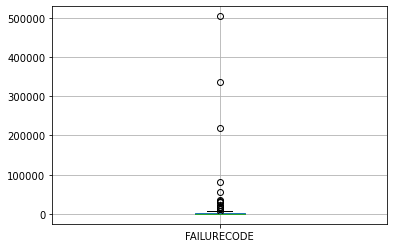

In [195]:
df_independientes['FAILURECODE'].value_counts().to_frame().boxplot()

In [196]:
df_independientes['FAILURECODE'].value_counts().to_frame().describe()

,FAILURECODE
count,104.000000
mean,14605.913462
std,62999.711366
min,1.000000
25%,25.000000
50%,175.000000
75%,3197.500000
max,503860.000000


In [197]:
#opcion clasificar para más de 100 casos

In [199]:
et_failurecode=df_independientes['FAILURECODE'].value_counts().to_frame()

In [203]:
len(et_failurecode[et_failurecode['FAILURECODE']>=100])

59

In [204]:
len(et_failurecode[et_failurecode['FAILURECODE']<100])

45

In [208]:
et_failurecode

,FAILURECODE
ACCESO_ESTACION_BASE,503860
ACCESO RED COAXIAL,335819
FIBRA OPTICA,219692
PRUEBAS DE SERVICIOS MOVILES,80920
FALLA_SONDAS_CRC,55854
...,...
FAL_ASO_SER_CAN_LIN_HAC_CEN,6
CORE_TV_ENCODER,5
CORE_ROAMING_CANAL_SCCP,4
CORE_TV_CTI,2


In [205]:
#categiricas con top, como parámetro

In [211]:
et_failurecodeV2=df_dependientes[['TICKETID','FAILURECODE.1']].drop_duplicates()

In [216]:
et_failurecodeV2=et_failurecodeV2['FAILURECODE.1'].value_counts().to_frame()

In [217]:
et_failurecodeV2

,FAILURECODE.1
ACCESO_ESTACION_BASE,503909
ACCESO RED COAXIAL,335895
FIBRA OPTICA,219736
PRUEBAS DE SERVICIOS MOVILES,80922
FALLA_SONDAS_CRC,55884
...,...
FAL_ASO_SER_CAN_LIN_HAC_CEN,6
CORE_TV_ENCODER,5
CORE_ROAMING_CANAL_SCCP,4
CORE_TV_CTI,2


In [219]:
len(et_failurecodeV2[et_failurecodeV2['FAILURECODE.1']>=100])

59

In [220]:
len(et_failurecodeV2[et_failurecodeV2['FAILURECODE.1']<100])

45

## PROBLEM

In [221]:
df_dependientes

,FAILURECODE,TYPE,TICKETCLASS,A,TICKETID,FAILURECODE.1
0,SIT_PARC_3G+4G,PROBLEM,INCIDENT,---,INC1972953,ACCESO_ESTACION_BASE
1,T_CONEC_CABLES/CONECT,CAUSE,INCIDENT,---,INC1972953,ACCESO_ESTACION_BASE
2,REPAR,REMEDY,INCIDENT,---,INC1972953,ACCESO_ESTACION_BASE
3,NaN,NaN,NaN,---,INC921809,ACCESO_ESTACION_BASE
4,NaN,NaN,NaN,---,INC922198,ACCESO_ESTACION_BASE
...,...,...,...,...,...,...
4543632,NOT_ENERGIA,PROBLEM,INCIDENT,---,INC6086600,ACCESO_ESTACION_BASE
4543633,CERT_ALARMAS,REMEDY,INCIDENT,---,INC6086600,ACCESO_ESTACION_BASE
4543634,REEMPLAZAR,REMEDY,INCIDENT,---,INC6090125,ACCESO RED COAXIAL
4543635,AMPLIFICADOR BHA,PROBLEM,INCIDENT,---,INC6090125,ACCESO RED COAXIAL


In [224]:
et_problemV2=df_dependientes[df_dependientes['TYPE']=='PROBLEM']['FAILURECODE'].value_counts().to_frame()
et_problemV2

,FAILURECODE
NOT_ENERGIA,186784
CABLE AEREO,155054
SIN FALLA O&M ACCESO,91480
SIT_TOT,79385
SIT_PARC_3G,72833
...,...
SON_IE_FM,1
CC 0C11H,1
ALARMA VAS CLOUD 405140005,1
ALARMA CRITICAL FAULT,1


<AxesSubplot:>

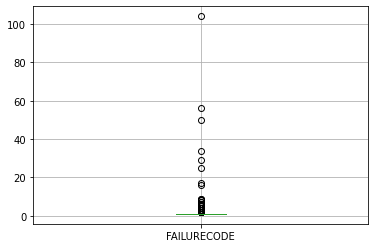

In [225]:
et_problemV2['FAILURECODE'].value_counts().to_frame().boxplot()

In [226]:
len(et_problemV2[et_problemV2['FAILURECODE']>=100])

278

In [227]:
len(et_problemV2[et_problemV2['FAILURECODE']<100])

533

In [228]:
## Etiquetas sin ejemplos se unifican
# se pueden clasificar o agrupar las etiquetas?  esto puede mejorar los resultados y luego hacer zoom con otros modelos
# 100 es un parámetro también del modelo

## CAUSE

In [229]:
et_causaV2=df_dependientes[df_dependientes['TYPE']=='CAUSE']['FAILURECODE'].value_counts().to_frame()
et_causaV2

,FAILURECODE
DETERIORIO VIDA UTIL,140362
VERIFICACION DE SENAL COAXIAL,88867
FALLA_ENER_COM_SITIO SIN PLANTA,77520
FALLA_ENER_COM_SITIO CON PLANTA,77019
PRUEBA_RUTINA,68996
...,...
AVERIA DE CORE DE SISTEMA,1
PROBLEMAS_ADMINISTRATIVOS_LOGISTICOS,1
AVERIA-FUGA INDICADOR DE NIVEL DE ACEITE,1
CAPACIDAD-UPLINK INSUFICIENTE,1


<AxesSubplot:>

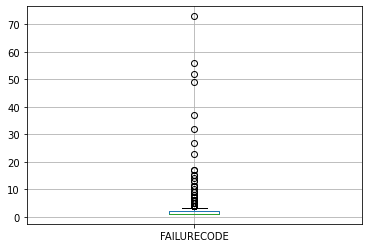

In [230]:
et_causaV2['FAILURECODE'].value_counts().to_frame().boxplot()

In [231]:
len(et_causaV2[et_causaV2['FAILURECODE']>=100])

589

In [232]:
len(et_causaV2[et_causaV2['FAILURECODE']<=100])

787

In [ ]:
#más información de los equipos que reciben los eventos, para facilitar la clasificación de las etiquetas

## Remedy

In [233]:
et_remedyV2=df_dependientes[df_dependientes['TYPE']=='REMEDY']['FAILURECODE'].value_counts().to_frame()
et_remedyV2

,FAILURECODE
REEMPLAZAR,286120
RETORNA AC COMERCIAL,200188
VERIFICAR SERVICIO OK,91475
PRUEBA_EX,79568
RES_REM,65789
...,...
CARGA_DE_LICENCIAS,1
CARGA_Y/O_CX_DE_UNIDADES,1
AMPLIACION,1
ACTUALIZACIÓN DE LICENCIAS,1


<AxesSubplot:>

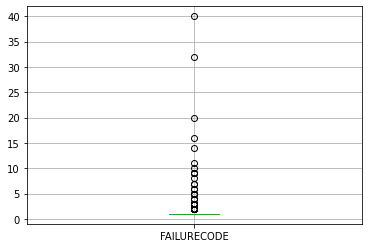

In [234]:
et_remedyV2['FAILURECODE'].value_counts().to_frame().boxplot()

In [235]:
len(et_remedyV2[et_remedyV2['FAILURECODE']>=100])

247

In [236]:
len(et_remedyV2[et_remedyV2['FAILURECODE']<100])

333

In [237]:
# se requiere un modelo muy flexible con pocas restricciones

### Procesamiento dataSet

In [246]:
df_independientes.set_index('TICKETID',inplace=True)

In [260]:
df_independientes.fillna(-1,inplace=True)

In [261]:
df_independientes

,ASSETSITEID,ASSIGNEDOWNERGROUP,CHANGEBY,CL_C_TIPO,CL_SERVICIO,CL_SER_AFEC,CREATEDBY,DIAGNOSTICADO,EXTERNALSYSTEM,FAILURECODE,FR1CODE,HASACTIVITY,HASLD,IMPACT,INCCARGAPRIORIDAD,INCEXCLUIR,INCEXCLUIR_ENLD,INC_ALARMA,INTERNALPRIORITY,LANGCODE,MUN100,ONCALLOWNERGROUP,ORIGRECORDCLASS,OUTAGEDURATION,OWNER,PROBLEMCODE,PROVEEDORES,REGIONAL,SRDATOS,SRINTERNET,SRTV,SRVOZ,TICKET_EXT,TIPOCOMUNICADO,URGENCY,WORKTYPE,FR2CODE,CLASSSTRUCTUREID,INCSERVICE,CLASSIFICATIONID,CL_C_DESC_AFECTACION,CL_INC_IMPACTO,C_CL_AFECTA,DESCRIPCION_TECNICA,DESCRIPTION,INCMCANCEL,INCMESTADO,INCMEXCLUSION,INCSOLUCION,STATUS,A,FAILURECODE.1,DESCRIPTION.1,ORGID,FAILURECODEID,LANGCODE.1,HASLD.1,ROWSTAMP,A.1,CLASSSTRUCTUREID.1,DESCRIPTION.2,GENASSETDESC,ORGID.1,PARENT,CLASSIFICATIONID.1,USECLASSINDESC,TYPE,SITEID,CLASSSTRUCTUREUID,HASCHILDREN,LANGCODE.2,HASLD.2,ROWSTAMP.1,SHOWINASSETTOPO,PLUSPISGLOBAL,PLUSPROLLDOWN,PLUSPROLLDOWNATTR,PLUSPINSERTCUSTOMER,SHOWINTOPO,PMCOMTOPOIMG,DISCLASSIFICATION,CLASSIFICATIONGROUPID,COMMODITYGROUP,COMMODITY,PERSONGROUP,PERSON,OWNER.1,INDICATEDPRIORITY,SHOWINIA,A.2,CLASSIFICATIONID.2,DESCRIPTION.3,ORGID.2,SITEID.1,CLASSIFICATIONUID,ROWSTAMP.2,HASLD.3,LANGCODE.3
TICKETID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
INC1972953,CLAROMOV,NOCBOLSAINC,MAXADMIN,-1,-1,-1,NETCOOL,0,NETCOOL_CA_FS_II,ACCESO_ESTACION_BASE,T_CONEC_CABLES/CONECT,1,1,2.0,2.02,1,0,0,3.0,EN,0,FOSERVICIO,-1,42.916667,-1,-1,ELECTRICARIBE,COSTA,1,0,0,1,5801074,-1,3.0,CFIBRA,REPAR,I1286,-1,CONTINUA,-1,-1,-1,-1,FAOC: MPACC_T1: Fuera de servicio EB BAR.Riomar-2 H3 UMTS/LTE en Barranquilla EB sin PE. (TX) (Cod),-1,-1,Falla red de energia electrica comercial AC,-1,CERRADO,----------,ACCESO_ESTACION_BASE,Fallas asociadas a Estaciones Base Celulares,CLARO,11826,ES,0,5622415560,----------,I1286,SERVICIOS MOVILES \ AFECTACION DE SERVICIO_ACCESO \ CONTINUA,0.0,-1.0,INC1006,CONTINUA,1.0,-1.0,-1.0,7672500.0,0.0,EN,0.0,1.150020e+10,0.0,1.0,1.0,1.0,-1.0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,FOACCESO,-1.0,-1,-1.0,0.0,----------,CONTINUA,CONTINUA,-1.0,-1.0,3235000.0,6.603774e+09,0.0,ES
INC921809,CLAROMOV,CUSTCARE,MAXADMIN,-1,-1,-1,ECM1207B,0,-1,ACCESO_ESTACION_BASE,-1,0,1,3.0,2.01,0,0,0,3.0,ES,0,-1,-1,0.016667,ECM1207B,-1,-1,CENTRO ORIENTE,0,0,0,0,-1,-1,3.0,ME,-1,I1512,-1,RUTINA,-1,-1,-1,-1,CCP:Revisión sondas Medux #724 #753 *229 *230,-1,-1,-1,"Rutina exitosa, sin novedades de fallas",CERRADO,----------,ACCESO_ESTACION_BASE,Fallas asociadas a Estaciones Base Celulares,CLARO,11826,ES,0,5622415560,----------,I1512,SERVICIOS MOVILES \ PRUEBA \ RUTINA,0.0,-1.0,INC1005,RUTINA,1.0,-1.0,-1.0,7754000.0,0.0,EN,0.0,1.150020e+10,0.0,1.0,1.0,1.0,-1.0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,CUSTCARE,-1.0,-1,-1.0,0.0,----------,RUTINA,RUTINA,-1.0,-1.0,2544500.0,6.603774e+09,0.0,ES
INC922198,CLAROMOV,CUSTCARE,MAXADMIN,-1,-1,-1,ECF3574BB,0,-1,ACCESO_ESTACION_BASE,-1,0,1,3.0,2.01,0,0,0,3.0,ES,0,-1,-1,0.050000,ECF3574BB,-1,-1,CENTRO ORIENTE,0,0,0,0,-1,-1,3.0,ME,-1,I1512,-1,RUTINA,-1,-1,-1,-1,"CCP: NOC Pruebas por demanda, validación de sondas medux a nivel nacional",-1,-1,-1,-1,CERRADO,----------,ACCESO_ESTACION_BASE,Fallas asociadas a Estaciones Base Celulares,CLARO,11826,ES,0,5622415560,----------,I1512,SERVICIOS MOVILES \ PRUEBA \ RUTINA,0.0,-1.0,INC1005,RUTINA,1.0,-1.0,-1.0,7754000.0,0.0,EN,0.0,1.150020e+10,0.0,1.0,1.0,1.0,-1.0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,CUSTCARE,-1.0,-1,-1.0,0.0,----------,RUTINA,RUTINA,-1.0,-1.0,2544500.0,6.603774e+09,0.0,ES
INC922276,CLAROMOV,CUSTCARE,MAXADMIN,-1,-1,-1,ECF3574BB,0,-1,ACCESO_ESTACION_BASE,-1,0,1,3.0,2.01,0,0,0,3.0,ES,0,-1,-1,0.016667,ECF3574BB,-1,-1,CENTRO ORIENTE,0,0,0,0,-1,-1,3.0,ME,-1,I1512,-1,RUTINA,-1,-1,-1,-1,"CCP: NOC Pruebas por demanda, validación de sondas medux a nivel nacional",-1,-1,-1,-1,CERRADO,----------,ACCESO_ESTACION_BASE,Fallas asociadas a Estaciones Base Celulares,CLARO,11826,ES,0,5622415560,----------,I1512,SERVICIOS MOVILES \ PRUEBA \ RUTINA,0.0,-1.0,INC1005,RUTINA,1.0,-1.0,-1.0,7754000.0,0.0,EN,0.0,1.15002

In [238]:
var_num

['IMPACT',
 'INCCARGAPRIORIDAD',
 'INTERNALPRIORITY',
 'OUTAGEDURATION',
 'URGENCY']

In [239]:
var_bool

['DIAGNOSTICADO',
 'HASACTIVITY',
 'HASLD',
 'INCEXCLUIR',
 'INCEXCLUIR_ENLD',
 'INC_ALARMA',
 'MUN100',
 'SRDATOS',
 'SRINTERNET',
 'SRTV',
 'SRVOZ',
 'HASCHILDREN',
 'USECLASSINDESC']

In [240]:
var_cat

['ASSIGNEDOWNERGROUP',
 'CL_C_TIPO',
 'CL_SERVICIO',
 'CL_SER_AFEC',
 'EXTERNALSYSTEM',
 'FR1CODE',
 'ONCALLOWNERGROUP',
 'ORIGRECORDCLASS',
 'PROBLEMCODE',
 'PROVEEDORES',
 'REGIONAL',
 'TICKET_EXT',
 'TIPOCOMUNICADO',
 'WORKTYPE',
 'FR2CODE',
 'INCSERVICE',
 'CLASSIFICATIONID',
 'DESCRIPCION_TECNICA',
 'INCMESTADO',
 'PERSONGROUP',
 'DESCRIPTION.2']

In [242]:
var_texto

['CL_C_DESC_AFECTACION',
 'CL_INC_IMPACTO',
 'C_CL_AFECTA',
 'DESCRIPTION',
 'INCMCANCEL',
 'INCMEXCLUSION',
 'INCSOLUCION']

### Numéricas y bool

In [262]:
df_num_fin=df_independientes[var_num+var_bool]
df_num_fin

,IMPACT,INCCARGAPRIORIDAD,INTERNALPRIORITY,OUTAGEDURATION,URGENCY,DIAGNOSTICADO,HASACTIVITY,HASLD,INCEXCLUIR,INCEXCLUIR_ENLD,INC_ALARMA,MUN100,SRDATOS,SRINTERNET,SRTV,SRVOZ,HASCHILDREN,USECLASSINDESC
TICKETID,,,,,,,,,,,,,,,,,,
INC1972953,2.0,2.02,3.0,42.916667,3.0,0,1,1,1,0,0,0,1,0,0,1,0.0,1.0
INC921809,3.0,2.01,3.0,0.016667,3.0,0,0,1,0,0,0,0,0,0,0,0,0.0,1.0
INC922198,3.0,2.01,3.0,0.050000,3.0,0,0,1,0,0,0,0,0,0,0,0,0.0,1.0
INC922276,3.0,2.01,3.0,0.016667,3.0,0,0,1,0,0,0,0,0,0,0,0,0.0,1.0
INC944267,3.0,2.00,3.0,0.000000,3.0,0,0,0,0,0,0,0,0,0,0,1,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
INC6090215,3.0,-1.00,3.0,0.000000,3.0,1,0,1,0,0,0,0,0,0,0,0,0.0,1.0
INC6079296,3.0,-1.00,3.0,1.050000,3.0,1,1,1,0,0,0,0,0,0,0,0,0.0,1.0
INC6079305,3.0,-1.00,3.0,0.000000,3.0,0,0,1,0,0,1,0,0,0,0,0,0.0,1.0


### Categoricas

In [263]:
num_min_cat=100

In [275]:
df_cat_fin=df_independientes[var_cat]
df_cat_fin

,ASSIGNEDOWNERGROUP,CL_C_TIPO,CL_SERVICIO,CL_SER_AFEC,EXTERNALSYSTEM,FR1CODE,ONCALLOWNERGROUP,ORIGRECORDCLASS,PROBLEMCODE,PROVEEDORES,REGIONAL,TICKET_EXT,TIPOCOMUNICADO,WORKTYPE,FR2CODE,INCSERVICE,CLASSIFICATIONID,DESCRIPCION_TECNICA,INCMESTADO,PERSONGROUP,DESCRIPTION.2
TICKETID,,,,,,,,,,,,,,,,,,,,,
INC1972953,NOCBOLSAINC,-1,-1,-1,NETCOOL_CA_FS_II,T_CONEC_CABLES/CONECT,FOSERVICIO,-1,-1,ELECTRICARIBE,COSTA,5801074,-1,CFIBRA,REPAR,-1,CONTINUA,-1,-1,FOACCESO,SERVICIOS MOVILES \ AFECTACION DE SERVICIO_ACCESO \ CONTINUA
INC921809,CUSTCARE,-1,-1,-1,-1,-1,-1,-1,-1,-1,CENTRO ORIENTE,-1,-1,ME,-1,-1,RUTINA,-1,-1,CUSTCARE,SERVICIOS MOVILES \ PRUEBA \ RUTINA
INC922198,CUSTCARE,-1,-1,-1,-1,-1,-1,-1,-1,-1,CENTRO ORIENTE,-1,-1,ME,-1,-1,RUTINA,-1,-1,CUSTCARE,SERVICIOS MOVILES \ PRUEBA \ RUTINA
INC922276,CUSTCARE,-1,-1,-1,-1,-1,-1,-1,-1,-1,CENTRO ORIENTE,-1,-1,ME,-1,-1,RUTINA,-1,-1,CUSTCARE,SERVICIOS MOVILES \ PRUEBA \ RUTINA
INC944267,FOPERFORMANCE,-1,-1,-1,-1,-1,-1,-1,-1,-1,CENTRO ORIENTE,-1,-1,ME,-1,-1,PERFORMANCE/CALIDAD/DEGRADACION,-1,-1,FOPERFORMANCE,SERVICIOS MOVILES \ PERFORMANCE/CALIDAD/DEGRADACION
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
INC6090215,CUSTCARE,-1,-1,-1,-1,PRUEBA_RUTINA,CUSTCARE,-1,PRUEBA_DATOS,-1,CENTRO ORIENTE,-1,-1,-1,PRUEBA_EX,-1,RUTINA,-1,-1,CUSTCARE,SERVICIOS MOVILES \ PRUEBA \ RUTINA
INC6079296,FO_SDH,-1,-1,-1,-1,-1,FO_SDH,-1,-1,-1,OCCIDENTE,-1,-1,-1,-1,-1,NOTIFICACION/SIN AFECTACION,-1,-1,FO_SDH,SERVICIOS MOVILES \ TRANSMISION OPTICA \ SERVICIO VULNERABLE \ NOTIFICACION/SIN AFECTACION
INC6079305,FOGESTINTERMITENCIAS,-1,-1,-1,COR48_BL_USR,A_CEL_HW,-1,-1,SIT_PARC_3G,-1,OCCIDENTE,-1,-1,-1,-1,BLOQUEO,PERDIDA DE GESTION,-1,-1,FRONTOFFICE,SERVICIOS MOVILES \ NOTIFICACION/POSIBLE AFECTACION/SIN AFECTACION \ PERDIDA DE GESTION


In [276]:
for var in var_cat:
    df_cat_fin[var]=df_cat_fin[[var]].applymap(str)
    df_aux=df_cat_fin[var].value_counts().to_frame('num')
    aux_cats=df_aux[df_aux['num']>=num_min_cat].index
    df_cat_fin[var]=np.where(df_cat_fin[var].isin(aux_cats),df_cat_fin[var],'otro')

In [277]:
len(df_cat_fin['ASSIGNEDOWNERGROUP'].value_counts().to_frame('num').index)

95

In [278]:
df_cat_fin['ASSIGNEDOWNERGROUP'].value_counts().to_frame('num')

,num
FOHFC,144335
FRONTCCI,131770
MESACALI2G,90032
FOINFRAESTRUCTURA,79402
NOCBOLSAINC,76304
...,...
MC_RECLAMACIONES,153
CUSCARPE,150
BORAN,144
CGEOCCIDENTE,111


In [279]:
df_cat_fin[df_cat_fin['ASSIGNEDOWNERGROUP']=='otro']

,ASSIGNEDOWNERGROUP,CL_C_TIPO,CL_SERVICIO,CL_SER_AFEC,EXTERNALSYSTEM,FR1CODE,ONCALLOWNERGROUP,ORIGRECORDCLASS,PROBLEMCODE,PROVEEDORES,REGIONAL,TICKET_EXT,TIPOCOMUNICADO,WORKTYPE,FR2CODE,INCSERVICE,CLASSIFICATIONID,DESCRIPCION_TECNICA,INCMESTADO,PERSONGROUP,DESCRIPTION.2
TICKETID,,,,,,,,,,,,,,,,,,,,,
INC924047,otro,-1,-1,-1,-1,-1,otro,-1,-1,-1,OCCIDENTE,-1,-1,ME,-1,-1,PERFORMANCE/CALIDAD/DEGRADACION,-1,-1,FOPERFORMANCE,SERVICIOS MOVILES \ PERFORMANCE/CALIDAD/DEGRADACION
872376,otro,-1,-1,-1,-1,-1,otro,-1,-1,-1,NORTE,-1,-1,ME,-1,-1,NOTIFICACION/POSIBLE AFECTACION/SIN AFECTACION,-1,CONDICIONES CLIMATICAS,FRONTOFFICE,SERVICIOS MOVILES \ NOTIFICACION/POSIBLE AFECTACION/SIN AFECTACION
INC887209,otro,-1,-1,-1,-1,-1,-1,-1,-1,-1,NORTE,-1,-1,ME,-1,-1,AFECTACION DE SERVICIO_ACCESO,-1,-1,FOACCESO,SERVICIOS MOVILES \ AFECTACION DE SERVICIO_ACCESO
INC960685,otro,-1,-1,-1,-1,FALLA_HW,otro,-1,-1,-1,OCCIDENTE,-1,-1,ME,REM_HW,-1,RUTAS INTERCONEXION,-1,-1,FOCORE,SERVICIOS MOVILES \ AFECTACION DE SERVICIO_CORE \ RUTAS INTERCONEXION
INC948372,otro,-1,-1,-1,-1,-1,-1,-1,-1,-1,NORTE,-1,-1,ME,-1,-1,AFECTACION DE SERVICIO_ACCESO,-1,-1,FOACCESO,SERVICIOS MOVILES \ AFECTACION DE SERVICIO_ACCESO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
INC6067665,otro,-1,-1,-1,-1,PREVENTIVO HFC,-1,-1,PREVENTIVO,-1,CENTRO ORIENTE,-1,-1,-1,EXITOSA,-1,otro,-1,-1,-1,otro
INC6039597,otro,-1,-1,4G,-1,FALLA_ENER_COM_SITIO SIN PLANTA,otro,-1,NOT_ENERGIA,-1,OCCIDENTE,-1,-1,ME,RETORNA AC COMERCIAL,-1,CONTINUA,-1,-1,FOACCESO,SERVICIOS MOVILES \ AFECTACION DE SERVICIO_ACCESO \ CONTINUA
INC6055813,otro,-1,-1,-1,-1,-1,otro,-1,-1,-1,ORIENTE,otro,FALLA MASIVA,ME,-1,-1,otro,-1,-1,otro,otro


In [280]:
class_ohe = OneHotEncoder(handle_unknown="ignore")
class_ohe = class_ohe.fit(df_cat_fin[var_cat])
tablaAnalisis_class_ohe = class_ohe.transform(df_cat_fin[var_cat]).toarray()
colDummies=class_ohe.get_feature_names(var_cat)

C:\ProgramData\Anaconda3\envs\T\lib\site-packages\sklearn\preprocessing\_encoders.py:104: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  X_int = np.zeros((n_samples, n_features), dtype=np.int)
C:\ProgramData\Anaconda3\envs\T\lib\site-packages\sklearn\preprocessing\_encoders.py:105: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.2

In [281]:
tablaAnalisis_class_ohe

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [282]:
df_cat_finv2=pd.DataFrame(tablaAnalisis_class_ohe,index=df_cat_fin.index, columns=colDummies)

In [283]:
df_cat_finv2

ASSIGNEDOWNERGROUP_AMDOCS  ASSIGNEDOWNERGROUP_AMDOCS OPTIMIZACION  \
TICKETID                                                                        
INC1972953                        0.0                                     0.0   
INC921809                         0.0                                     0.0   
INC922198                         0.0                                     0.0   
INC922276                         0.0                                     0.0   
INC944267                         0.0                                     0.0   
...                               ...                                     ...   
INC6090215                        0.0                                     0.0   
INC6079296                        0.0                                     0.0   
INC6079305                        0.0                                     0.0   
INC6064631                        0.0                                     0.0   
INC6086600                        0.0                                     0.0   

            ASSIGNEDOWNERGROUP_AMDOCS-TRIAGE 2G  \
TICKETID                                          
INC1972953                                  0.0   
INC921809                                   0.0   
INC922198                                   0.0   
INC922276                                   0.0   
INC944267                                   0.0   
...                                         ...   
INC6090215                                  0.0   
INC6079296                                  0.0   
INC6079305                                  0.0   
INC6064631                                  0.0   
INC6086600                                  0.0   

            ASSIGNEDOWNERGROUP_AMDOCS-TRIAGE 4G  \
TICKETID                                          
INC1972953                                  0.0   
INC921809                                   0.0   
INC922198                                   0.0   
INC922276                                   0.0   
INC944267                                   0.0   
...                                         ...   
INC6090215                                  0.0   
INC6079296                                  0.0   
INC6079305                                  0.0   
INC6064631                                  0.0   
INC6086600                                  0.0   

            ASSIGNEDOWNERGROUP_BACKTXMW/SATEL/PERFORMANCE  \
TICKETID                                                    
INC1972953                                            0.0   
INC921809                                             0.0   
INC922198                                             0.0   
INC922276                                             0.0   
INC944267                                             0.0   
...                                                   ...   
INC6090215                                            0.0   
INC6079296                                            0.0   
INC6079305                                            0.0   
INC6064631                                            0.0   
INC6086600                                            0.0   

            ASSIGNEDOWNERGROUP_BACK_AUT_PRUEBA  ASSIGNEDOWNERGROUP_BODATOS  \
TICKETID                                                                     
INC1972953                                 0.0                         0.0   
INC921809                                  0.0                         0.0   
INC922198                                  0.0                         0.0   
INC922276                                  0.0                         0.0   
INC944267                                  0.0                         0.0   
...                                        ...                         ...   
INC6090215                                 0.0                         0.0   
INC6079296                                 0.0                         0.0   
INC6079305                                 0.0          

### Texto

In [353]:
num_topicos=5

In [354]:
tokenizer = ToktokTokenizer()

In [355]:
df_text_fin=df_independientes[var_texto]
df_text_fin

,CL_C_DESC_AFECTACION,CL_INC_IMPACTO,C_CL_AFECTA,DESCRIPTION,INCMCANCEL,INCMEXCLUSION,INCSOLUCION
TICKETID,,,,,,,
INC1972953,-1,-1,-1,FAOC: MPACC_T1: Fuera de servicio EB BAR.Riomar-2 H3 UMTS/LTE en Barranquilla EB sin PE. (TX) (Cod),-1,Falla red de energia electrica comercial AC,-1
INC921809,-1,-1,-1,CCP:Revisión sondas Medux #724 #753 *229 *230,-1,-1,"Rutina exitosa, sin novedades de fallas"
INC922198,-1,-1,-1,"CCP: NOC Pruebas por demanda, validación de sondas medux a nivel nacional",-1,-1,-1
INC922276,-1,-1,-1,"CCP: NOC Pruebas por demanda, validación de sondas medux a nivel nacional",-1,-1,-1
INC944267,-1,-1,-1,MC: PERFORMANCE degradación del servicio de Voz EB GSM BOG.Corabastos-2 Sectores [A] en el en la ciudad de Bogota D.C. (Drop Call 8.54%),-1,-1,Se realiza reinicio en el elemento [BTS] (Afectación de KPIS-{7607} <7607 TRX OPERATION DEGRADED> /NA\)
...,...,...,...,...,...,...,...
INC6090215,-1,-1,-1,FAPP:MPACC_T1: Rutina revision de graficas PRTG - PCRF - CACTI - U2000 - 22-03-22/09h.,-1,-1,MFPMC:FAPP:MPACC_T1: Rutina revision de graficas PRTG - PCRF - CACTI - U2000 - 22-03-22/09h.
INC6079296,-1,-1,-1,FO SDH ALARMAS OTU4_LOF EN EQUIPO 26-571_NEI_MANZANARES,-1,-1,Causa: Degradacion del canal 193.0\nSolucion: Calibracion de la frecuencia
INC6079305,-1,-1,-1,Bloqueo por Usuario EB: VAL.Candelaria-2 Sectores: I J K X Y Y1 Y2 Y3 Z,-1,-1,"Se aplica reset automático, servicio operativo por más de 2 horas. No presentan ticket por fuera de servicio."


In [356]:
### clasificar texto null con todo cero mmm

In [357]:
valdis=-1

In [358]:
def disbribucionProbTopicos_old(arr_text):
    #valdis=valdis+1
    #print(arr_text,valdis)   
    print(arr_text)
    if arr_text==[]:
        return np.zeros(num_topicos)
    else:
        bow_comentario = diccionario.doc2bow(arr_text)
        distribucion_noticia = lda[bow_comentario]
        #print(len(distribucion_noticia))
        #print(distribucion_noticia)
        #print (dict(distribucion_noticia))
        df_aux=pd.DataFrame(distribucion_noticia,columns=['ind','prob'])
        #print(df_aux)
        df_plan=pd.DataFrame(index=range(0,num_topicos))
        df_plan=df_plan.merge(df_aux, left_index=True, right_on='ind', how='left')
        df_plan.fillna(0,inplace=True)
        df_plan.set_index('ind', inplace=True)
        #print(df_plan['prob'])
        #return [x[1] for x in distribucion_noticia]    
        return df_plan['prob']

In [360]:
from datetime import datetime

In [361]:
dic_lda={}

In [362]:
for var in var_texto:
    print(var)
    
    print(" preprocesamiento texto:",datetime.now())
    df_text_fin[var] = df_text_fin[var].apply(limpiar_texto)
    df_text_fin[var] = df_text_fin[var].apply(tokenizer.tokenize)
    df_text_fin[var] = df_text_fin[var].apply(filtrar_stopword_digitos)
    df_text_fin[var] = df_text_fin[var].apply(stem_palabras)
    
    print(" gramas y corpus:",datetime.now())
    lista_general = df_text_fin[var].tolist()
    lista_general = [x for x in lista_general if x!= []]
    
    bigram = gensim.models.Phrases(lista_general, min_count=5, threshold=10) 
    trigram = gensim.models.Phrases(bigram[lista_general], threshold=10)  

    bigram_mod = gensim.models.phrases.Phraser(bigram)
    trigram_mod = gensim.models.phrases.Phraser(trigram)

    data_words_bigrams = make_bigrams(lista_general,bigram_mod)

    diccionario = Dictionary(data_words_bigrams)
    #print(f'Número de tokens: {len(diccionario)}')

    diccionario.filter_extremes(no_below=2, no_above = 0.9)
    #print(f'Número de tokens: {len(diccionario)}')
    corpus = [diccionario.doc2bow(noticia) for noticia in data_words_bigrams]
    
    print(" modelado de tópicos:",datetime.now())
    #lda = LdaModel(corpus=corpus, id2word=diccionario, 
    #          num_topics=num_topicos, random_state=35, 
    #           chunksize=1000, iterations=200, passes=40, alpha='auto')
    dic_lda[var] = LdaModel(corpus=corpus, id2word=diccionario, 
               num_topics=num_topicos, random_state=35, 
               chunksize=500, iterations=10, passes=10, alpha='auto')
    ####
    #print(" probabilidades salida:",datetime.now())
    #for i in range(0,num_topicos):
    #    df_text_fin[var+'_'+str(i)]=0
    
    #df_text_fin[[f"{var}_{s}" for s in list(range(0,num_topicos))]]=df_text_fin[var].apply(disbribucionProbTopicos)

CL_C_DESC_AFECTACION
 preprocesamiento texto: 2022-03-28 13:51:11.684580
 gramas y corpus: 2022-03-28 13:52:20.072384
 modelado de tópicos: 2022-03-28 13:52:24.726453
CL_INC_IMPACTO
 preprocesamiento texto: 2022-03-28 13:53:33.248880
 gramas y corpus: 2022-03-28 13:54:30.466281
 modelado de tópicos: 2022-03-28 13:54:30.668797
C_CL_AFECTA
 preprocesamiento texto: 2022-03-28 13:54:31.012484
 gramas y corpus: 2022-03-28 13:55:39.894973
 modelado de tópicos: 2022-03-28 13:55:43.340130
DESCRIPTION
 preprocesamiento texto: 2022-03-28 13:56:21.508418
 gramas y corpus: 2022-03-28 14:04:42.662211
 modelado de tópicos: 2022-03-28 14:06:32.050403
INCMCANCEL
 preprocesamiento texto: 2022-03-28 15:04:46.546523
 gramas y corpus: 2022-03-28 15:05:48.429648
 modelado de tópicos: 2022-03-28 15:05:49.657238
INCMEXCLUSION
 preprocesamiento texto: 2022-03-28 15:05:49.799969
 gramas y corpus: 2022-03-28 15:07:23.613731
 modelado de tópicos: 2022-03-28 15:07:34.311569
INCSOLUCION
 preprocesamiento texto: 20

In [364]:
from joblib import dump,load

In [365]:
#Guardar LDA
ruta_objeto= f"modeloEntrenado/ldas.pkl"
dump(dic_lda, ruta_objeto)

['modeloEntrenado/ldas.pkl']

In [ ]:
#val ldas

In [373]:
for var in var_texto:
    print(var)
    impresionTopicos(dic_lda[var],5,num_topicos)

CL_C_DESC_AFECTACION
(0, '0.215*"medellin" + 0.175*"santand" + 0.121*"cartagen" + 0.120*"boliv" + 0.070*"bucaramang"')
(1, '0.171*"dat" + 0.166*"tecnologi" + 0.165*"agrup" + 0.165*"involucr" + 0.165*"cis"')
(2, '0.247*"fij" + 0.124*"impact" + 0.124*"pestan" + 0.113*"internet" + 0.108*"voz"')
(3, '0.198*"fij" + 0.115*"c" + 0.115*"bogot" + 0.099*"impact" + 0.099*"pestan"')
(4, '0.218*"2g" + 0.218*"3g" + 0.218*"4g" + 0.051*"voz" + 0.016*"dat"')
CL_INC_IMPACTO
(0, '0.347*"v1" + 0.062*"v11" + 0.027*"soapenv" + 0.022*"user" + 0.017*"nam"')
(1, '0.084*"servici" + 0.073*"telefoni" + 0.068*"afect" + 0.067*"total" + 0.067*"equival_afectacion"')
(2, '0.339*"v1" + 0.060*"v11" + 0.024*"id" + 0.024*"affectedci" + 0.022*"nam"')
(3, '0.324*"v1" + 0.069*"v11" + 0.029*"soapenv" + 0.024*"user" + 0.011*"requestdat"')
(4, '0.352*"v1" + 0.057*"location" + 0.056*"affectedci" + 0.056*"nam" + 0.056*"id"')
C_CL_AFECTA
(0, '0.195*"atlant" + 0.187*"barranquill" + 0.083*"boliv" + 0.068*"cartagen" + 0.063*"sant"')


In [531]:
def disbribucionProbTopicos(row, var):
    #print("inicial2",var, row.name)
    #print("fila",row)
    arr_text=row[var]
    #print("arreglo",arr_text)
    #print(arr_text)
    #print (row.index)
    #arr_text
    #print(arr_text,valdis)   
    #print(arr_text)
    lda=dic_lda[var]
    if arr_text==[]:
        return np.zeros(num_topicos)
    else:
        bow_comentario = diccionario.doc2bow(arr_text)
        try:
            distribucion_noticia = lda[bow_comentario]
        except:
            return np.zeros(num_topicos)
        #print(len(distribucion_noticia))
        #print(distribucion_noticia)
        #print (dict(distribucion_noticia))
        df_aux=pd.DataFrame(distribucion_noticia,columns=['ind','prob'])
        #print(df_aux)
        df_plan=pd.DataFrame(index=range(0,num_topicos))
        df_plan=df_plan.merge(df_aux, left_index=True, right_on='ind', how='left')
        df_plan.fillna(0,inplace=True)
        df_plan.set_index('ind', inplace=True)
        #print(df_plan['prob'])
        #return [x[1] for x in distribucion_noticia]    
        return df_plan['prob']

In [524]:
df_text_fin[[f"CL_C_DESC_AFECTACION_{s}" for s in list(range(0,num_topicos))]]

,CL_C_DESC_AFECTACION_0,CL_C_DESC_AFECTACION_1,CL_C_DESC_AFECTACION_2,CL_C_DESC_AFECTACION_3,CL_C_DESC_AFECTACION_4
TICKETID,,,,,
INC1972953,0,0,0,0,0
INC921809,0,0,0,0,0
INC922198,0,0,0,0,0
INC922276,0,0,0,0,0
INC944267,0,0,0,0,0
...,...,...,...,...,...
INC6090215,0,0,0,0,0
INC6079296,0,0,0,0,0
INC6079305,0,0,0,0,0


In [ ]:
# fin validación
# mirar otros ejemplos

In [529]:
dfs_proc_texto={}

In [532]:
#Distribuir probabilidad
for var in var_texto:
    print(var," probabilidades salida:",datetime.now())
    #aux_df=pd.DataFrame(in)
    for i in range(0,num_topicos):
        df_text_fin[var+'_'+str(i)]=0
    #df_text_fin[[f"{var}_{s}" for s in list(range(0,num_topicos))]]=df_text_fin[var].apply(disbribucionProbTopicos)
    #df_text_fin[[f"{var}_{s}" for s in list(range(0,num_topicos))]]=df_text_fin.apply(lambda row: disbribucionProbTopicos(row,var), axis=1)
    dfs_proc_texto[var]=df_text_fin.apply(lambda row: disbribucionProbTopicos(row,var), axis=1)

CL_C_DESC_AFECTACION  probabilidades salida: 2022-03-28 20:05:59.733585
CL_INC_IMPACTO  probabilidades salida: 2022-03-28 20:06:18.755221
C_CL_AFECTA  probabilidades salida: 2022-03-28 20:06:35.795229
DESCRIPTION  probabilidades salida: 2022-03-28 20:06:55.196566
INCMCANCEL  probabilidades salida: 2022-03-28 20:58:54.690809
INCMEXCLUSION  probabilidades salida: 2022-03-28 20:59:16.330303
INCSOLUCION  probabilidades salida: 2022-03-28 20:59:47.260680


In [615]:
#Guardar LDA
ruta_objeto= f"modeloEntrenado/dic_text.pkl"
dump(dfs_proc_texto, ruta_objeto)

['modeloEntrenado/dic_text.pkl']

In [636]:
# Seleccionar columnas
var_texto_sel=['CL_INC_IMPACTO','DESCRIPTION','INCMEXCLUSION','INCSOLUCION']

In [648]:
df_text_finV2=pd.DataFrame()
for var in var_texto_sel:
    print(var)
    aux_df=pd.DataFrame.from_dict(dfs_proc_texto[var])
    if len(aux_df.columns)==1:
        aux_df=pd.DataFrame(aux_df[0].tolist(), index= aux_df.index)
        
    aux_df.columns=[f"{var}_{s}" for s in list(range(0,num_topicos))]
    if len(df_text_finV2)==0:
        df_text_finV2=aux_df.copy()
    else:
        df_text_finV2=df_text_finV2.merge(aux_df, left_index=True, right_index=True, how='left')

CL_INC_IMPACTO
DESCRIPTION
INCMEXCLUSION
INCSOLUCION


In [650]:
df_text_finV2

,CL_INC_IMPACTO_0,CL_INC_IMPACTO_1,CL_INC_IMPACTO_2,CL_INC_IMPACTO_3,CL_INC_IMPACTO_4,DESCRIPTION_0,DESCRIPTION_1,DESCRIPTION_2,DESCRIPTION_3,DESCRIPTION_4,INCMEXCLUSION_0,INCMEXCLUSION_1,INCMEXCLUSION_2,INCMEXCLUSION_3,INCMEXCLUSION_4,INCSOLUCION_0,INCSOLUCION_1,INCSOLUCION_2,INCSOLUCION_3,INCSOLUCION_4
TICKETID,,,,,,,,,,,,,,,,,,,,
INC1972953,0.0,0.0,0.0,0.0,0.0,0.355399,0.431597,0.000000,0.010171,0.193625,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
INC921809,0.0,0.0,0.0,0.0,0.0,0.446203,0.050798,0.428829,0.045545,0.028625,0.0,0.0,0.0,0.0,0.0,0.068000,0.044722,0.057537,0.737761,0.091981
INC922198,0.0,0.0,0.0,0.0,0.0,0.266479,0.207411,0.260454,0.139667,0.125989,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
INC922276,0.0,0.0,0.0,0.0,0.0,0.266469,0.207446,0.260443,0.139662,0.125981,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
INC944267,0.0,0.0,0.0,0.0,0.0,0.333581,0.445075,0.206077,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.128642,0.022416,0.590116,0.200503,0.058323
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
INC6090215,0.0,0.0,0.0,0.0,0.0,0.321658,0.019629,0.167122,0.017595,0.473997,0.0,0.0,0.0,0.0,0.0,0.034429,0.023137,0.341508,0.468039,0.132888
INC6079296,0.0,0.0,0.0,0.0,0.0,0.318299,0.036364,0.029408,0.032493,0.583437,0.0,0.0,0.0,0.0,0.0,0.300143,0.033551,0.043027,0.066653,0.556626
INC6079305,0.0,0.0,0.0,0.0,0.0,0.129697,0.552627,0.187726,0.121908,0.000000,0.0,0.0,0.0,0.0,0.0,0.037720,0.120184,0.218389,0.575235,0.048473


In [651]:
df_text_finV2.describe()

,CL_INC_IMPACTO_0,CL_INC_IMPACTO_1,CL_INC_IMPACTO_2,CL_INC_IMPACTO_3,CL_INC_IMPACTO_4,DESCRIPTION_0,DESCRIPTION_1,DESCRIPTION_2,DESCRIPTION_3,DESCRIPTION_4,INCMEXCLUSION_0,INCMEXCLUSION_1,INCMEXCLUSION_2,INCMEXCLUSION_3,INCMEXCLUSION_4,INCSOLUCION_0,INCSOLUCION_1,INCSOLUCION_2,INCSOLUCION_3,INCSOLUCION_4
count,1.519015e+06,1.519015e+06,1.519015e+06,1.519015e+06,1.519015e+06,1.519015e+06,1.519015e+06,1.519015e+06,1.519015e+06,1.519015e+06,1.519015e+06,1.519015e+06,1519015.0,1519015.0,1.519015e+06,1.519015e+06,1.519015e+06,1.519015e+06,1.519015e+06,1.519015e+06
mean,9.906206e-07,2.526910e-07,2.663293e-07,2.286942e-07,2.366291e-07,3.121725e-01,3.321860e-01,1.092717e-01,5.695169e-02,1.794357e-01,1.853368e-04,6.520845e-07,0.0,0.0,9.471812e-05,1.160295e-01,9.094116e-02,1.326457e-01,1.445404e-01,1.640887e-01
std,7.048999e-04,1.798083e-04,1.895130e-04,1.627329e-04,1.683792e-04,1.891509e-01,1.950404e-01,1.288461e-01,8.496504e-02,1.460497e-01,1.107867e-02,5.682896e-04,0.0,0.0,5.651765e-03,1.621290e-01,1.530342e-01,1.711048e-01,1.738313e-01,2.184605e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.798046e-01,2.014083e-01,1.244329e-02,1.233164e-02,2.899911e-02,0.000000e+00,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.032654e-01,3.431561e-01,4.129771e-02,2.553269e-02,1.679967e-01,0.000000e+00,0.000000e+00,0.0,0.0,0.000000e+00,5.704124e-02,2.104413e-02,6.876810e-02,9.027752e-02,8.928262e-02
75%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.435719e-01,4.525310e-01,1.900103e-01,7.313406e-02,2.764186e-01,0.000000e+00,0.000000e+00,0.0,0.0,0.000000e+00,1.730810e-01,8.948907e-02,1.920569e-01,2.083102e-01,2.242053e-01
max,5.017176e-01,1.279474e-01,1.348555e-01,1.157968e-01,1.198781e-01,9.608804e-01,9.939935e-01,9.179300e-01,8.716213e-01,9.547869e-01,6.624221e-01,4.952631e-01,0.0,0.0,5.019068e-01,9.821737e-01,8.533944e-01,9.762490e-01,9.328158e-01,9.674526e-01


In [ ]:
#union resultado analisis textos

###  Union tablas

In [ ]:
#listas tablas parciales

In [653]:
df_text_finV2.shape

(1519015, 20)

In [655]:
df_num_fin.shape

(1519015, 18)

In [654]:
df_cat_finv2.shape

(1519015, 1557)

In [ ]:
df_base=df_text_finV2.merge(df_num_fin, left_index=True, right_index=True, how='left').merge(df_cat_finv2,left_index=True, right_index=True, how='left' )

## optimización memoria

In [ ]:
import gc
del E_MF_MM1_T
del E_MF_MM2_T
gc.collect()


### Agregar Etiquetas

### Plan
* Unir tablas base
* alistar etiquetas
* probar técnicas
 * guardar resultado y probabilidad

# Recortes

In [4]:
df_classification
# primary key
#CLASSIFICATIONID

,CLASSIFICATIONID,DESCRIPTION,ORGID,SITEID,CLASSIFICATIONUID,ROWSTAMP,HASLD,LANGCODE
0,EM.EL.AC.TGD,ELECTROMECANICOS \ ELECTROMECANICOS \ CORRIENTE DIRECTA \ TABLERO GENERAL DISTRIBUCION,NaN,NaN,2533000,1604646502,0,ES
1,CN.HFC,CORE NETWORK \ HFC,NaN,NaN,2581500,4378169226,0,ES
2,CN.OS.GES.NADC,CORE NETWORK \ OSS-CORE \ GESTORES \ NADC,NaN,NaN,2589000,4612791577,0,ES
3,ERPS,ERPS,NaN,NaN,2735500,5492661125,0,ES
4,UDC.NTHLR.HLRFE.IPROUT,UDC \ NTHLR \ HLRFE \ RUTA IP DINAMICA,NaN,NaN,2759000,5492662797,0,ES
...,...,...,...,...,...,...,...,...
994,CUSTOMCOLLECTION.CUSTOMCOLLECTION,NaN,NaN,NaN,2596000,4670233234,0,EN
995,SIMPLE.SFUNCTION,NaN,NaN,NaN,2596500,4670233283,0,EN
996,SYS.APPLIANCE.DATAPOWER,NaN,NaN,NaN,2597000,4670233311,0,EN
997,APP.MESSAGING.MB.MBMESSAGEFLOW,NaN,NaN,NaN,2597500,4670233432,0,EN


In [5]:
val_datos=df_classification.fillna(-1).nunique().to_frame('part_data')
val_datos

,part_data
CLASSIFICATIONID,999
DESCRIPTION,974
ORGID,1
SITEID,1
CLASSIFICATIONUID,999
ROWSTAMP,999
HASLD,1
LANGCODE,2


In [6]:
df_classification.drop(columns=val_datos[val_datos['part_data']<=1].index.values, inplace=True)

In [7]:
df_classstructure
#CLASSSTRUCTUREID 

,CLASSSTRUCTUREID,DESCRIPTION,GENASSETDESC,ORGID,PARENT,CLASSIFICATIONID,USECLASSINDESC,TYPE,SITEID,CLASSSTRUCTUREUID,HASCHILDREN,LANGCODE,HASLD,ROWSTAMP,SHOWINASSETTOPO,PLUSPISGLOBAL,PLUSPROLLDOWN,PLUSPROLLDOWNATTR,PLUSPINSERTCUSTOMER,SHOWINTOPO,PMCOMTOPOIMG,DISCLASSIFICATION,CLASSIFICATIONGROUPID,COMMODITYGROUP,COMMODITY,PERSONGROUP,PERSON,OWNER,INDICATEDPRIORITY,SHOWINIA
0,4840,NaN,0,NaN,NaN,ERPS,1,NaN,NaN,3365500,0,EN,0,5492661124,0.0,1,1,1,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
1,4893,NaN,0,NaN,NaN,UDC.NTHLR.HLRFE.IPROUT,1,NaN,NaN,3389500,0,EN,0,5492662783,0.0,1,1,1,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2,2203,NaN,0,NaN,1677,EM.EL.AC.TRANSF,1,NaN,NaN,3148000,0,EN,0,9550478576,0.0,1,1,1,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
3,4902,NaN,0,NaN,NaN,UDC.ONENDS.PGWDSA,1,NaN,NaN,3394500,0,EN,0,5492663230,0.0,1,1,1,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
4,4912,NaN,0,NaN,NaN,STP,1,NaN,NaN,3399000,0,EN,0,5492663386,0.0,1,1,1,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,SMPL10007,SIMPLE.SPHYSICALFILE,0,NaN,ACTUALCIROOTCLASS,SIMPLE.SPHYSICALFILE,0,NaN,NaN,3202500,0,EN,0,4670233068,NaN,1,1,1,NaN,NaN,NaN,simple/SPhysicalFile,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
995,SMPL10003,SIMPLE.SDEPLOYABLECOMPONENT,0,NaN,ACTUALCIROOTCLASS,SIMPLE.SDEPLOYABLECOMPONENT,0,NaN,NaN,3203000,0,EN,0,4670233100,NaN,1,1,1,NaN,NaN,NaN,simple/SDeployableComponent,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
996,SMPL10002,SIMPLE.SCOMPUTERSYSTEM,0,NaN,ACTUALCIROOTCLASS,SIMPLE.SCOMPUTERSYSTEM,0,NaN,NaN,3203500,0,EN,0,4670233128,NaN,1,1,1,NaN,NaN,NaN,simple/SComputerSystem,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
997,SMPL10008,SIMPLE.SSOFTWAREINSTALLATION,0,NaN,ACTUALCIROOTCLASS,SIMPLE.SSOFTWAREINSTALLATION,0,NaN,NaN,3204000,0,EN,0,4670233173,NaN,1,1,1,NaN,NaN,NaN,simple/SSoftwareInstallation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
df_classstructure.nunique()

CLASSSTRUCTUREID         999
DESCRIPTION              450
GENASSETDESC               2
ORGID                      0
PARENT                   280
CLASSIFICATIONID         720
USECLASSINDESC             2
TYPE                       0
SITEID                     0
CLASSSTRUCTUREUID        999
HASCHILDREN                2
LANGCODE                   1
HASLD                      1
ROWSTAMP                 999
SHOWINASSETTOPO            1
PLUSPISGLOBAL              1
PLUSPROLLDOWN              1
PLUSPROLLDOWNATTR          2
PLUSPINSERTCUSTOMER        0
SHOWINTOPO                 2
PMCOMTOPOIMG               0
DISCLASSIFICATION          6
CLASSIFICATIONGROUPID      0
COMMODITYGROUP             0
COMMODITY                  0
PERSONGROUP               24
PERSON                     0
OWNER                      5
INDICATEDPRIORITY          2
SHOWINIA                   1
dtype: int64

In [9]:
val_datos=df_classstructure.fillna(-1).nunique().to_frame('part_data')
val_datos[val_datos['part_data']<=1]

,part_data
ORGID,1
TYPE,1
SITEID,1
LANGCODE,1
HASLD,1
PLUSPISGLOBAL,1
PLUSPROLLDOWN,1
PLUSPINSERTCUSTOMER,1
PMCOMTOPOIMG,1
CLASSIFICATIONGROUPID,1


In [10]:
df_classstructure.drop(columns=val_datos[val_datos['part_data']<=1].index.values, inplace=True)

In [11]:
df_failurecode
#FAILURECODEID

,FAILURECODE,DESCRIPTION,ORGID,FAILURECODEID,LANGCODE,HASLD,ROWSTAMP
0,E_MT/BT_CANUEL,Energia comercial en Sitio sin PE MT/BT por daNo de CaNuelas_ENERGIA,CLARO,11476,ES,0,5622414982
1,CABLE COAXIAL ACOMETIDA,coaxial,CLARO,11503,ES,0,19807149334
2,CABLE ACOMETIDA CONEXION SIN WATER SEAL,Cable Acometida Conexion Sin Water Seal,CLARO,11508,ES,0,12563842657
3,GESTION RED BACKOFFICE TELEFONIA,GESTION RED BACKOFFICE TELEFONIA,CLARO,11514,ES,0,5622415075
4,VHUB EDFAS AVERIADO,Vhub Edfas Averiado,CLARO,11542,ES,0,11522125691
...,...,...,...,...,...,...,...
994,CONECTORIZAR,NaN,CLARO,22715,ES,0,13540134630
995,EQUIPOS DE GESTION BLOQUEO,generaba atenuación,CLARO,20325,ES,0,11728567705
996,CORRECION EN SOFTWARE,Cargar nueva version de software a equipos,CLARO,22717,ES,0,5622569223
997,VENTILADOR AVERIADO,Falla de ventialdor para refrigeracion,CLARO,20339,ES,0,5622436124


In [12]:
df_failurecode.nunique()

FAILURECODE      999
DESCRIPTION      840
ORGID              1
FAILURECODEID    999
LANGCODE           2
HASLD              2
ROWSTAMP         999
dtype: int64

In [13]:
val_datos=df_failurecode.fillna(-1).nunique().to_frame('part_data')
val_datos[val_datos['part_data']<=1]

,part_data
ORGID,1


In [14]:
df_failurecode.drop(columns=val_datos[val_datos['part_data']<=1].index.values, inplace=True)

In [15]:
df_incident
#  CLASSIFICATIONID y CLASSSTRUCTUREID

,DESCRIPTION,CLASSSTRUCTUREID,IMPACT,URGENCY,INTERNALPRIORITY,INCSOLUCION,FAILURECODE,CREATEDBY,CLASSIFICATIONID
0,FUERA DE SERVICIO POR 20 MINUTOS O MAS BOG.REFUGIO,NaN,1.0,1.0,1.0,NaN,NaN,MXINTADM,NaN
1,MC: PERFORMANCE degradacion del servicio de [datos] EB PAL.Olimpico UMTS sectores X en la ciudad de PALMIRA,I1130,3.0,3.0,3.0,NaN,ACCESO RED COAXIAL,MXINTADM,OFENSOR AGUDO
2,MC: AUMENTO DE PISO DE RUIDO RTWP EB: PAS.Lunas Sector Z en PASTO,I1134,3.0,3.0,3.0,NaN,NaN,MXINTADM,CALIDAD
3,FA: Falla: Perdida de Gestión (O&M) En EB: BOY.Siachoque WBTS Afectada: WBTS-24647,I1131,3.0,3.0,3.0,NaN,NaN,MXINTADM,PERDIDA DE GESTION
4,FC: \nAlarma 19039 % C.C ANORMALES *611 > 10% El porcentaje de clear codes anormales en la marcacion *611 esta por encima del 10% Elemento TRAFFICA-MSS01ING,I1131,1.0,1.0,1.0,NaN,NaN,MXINTADM,PERDIDA DE GESTION
...,...,...,...,...,...,...,...,...,...
994,MC: PERFORMANCE degradación del servicio de Datos EB UMTS ZIP.Zipaquira-5 Sectores [Nodo 1900] en el departamento de Cundinamarca municipio Zipaquira(Accesibilidad 25%),INC1002,3.0,3.0,3.0,NaN,NaN,ENA9609A,PERFORMANCE/CALIDAD/DEGRADACION
995,Entrega de Turno Front TV 1400_2200 Hrs 25 Diciembre_2018,I1380,3.0,3.0,3.0,Se carga bitacora,GESTION RED BACKOFFICE TELEVISION,ECF9398A,NOTIFICACION/POSIBLE AFECTACION/SIN AFECTACION
996,FOIP: Revisión de intermitencias BBIP.,INC1001,3.0,3.0,3.0,FOIP: Se realiza revisión de intermitencias y no se observan afectaciones presentes sin reportar.,BACKBONE IPRAN,ECM0133BB,NOTIFICACION/POSIBLE AFECTACION/SIN AFECTACION
997,FOIP: Revisión de gráficas de tráfico de datos en PRTG,INC1001,3.0,3.0,3.0,FOIP: Se realiza revisión de gráficas de tráfico de datos en PRTG y no se observan afectaciones presentes sin reportar.,BACKBONE IPRAN,ECM0133BB,NOTIFICACION/POSIBLE AFECTACION/SIN AFECTACION


In [16]:
df_incident.nunique()

DESCRIPTION         912
CLASSSTRUCTUREID     49
IMPACT                4
URGENCY               4
INTERNALPRIORITY      4
INCSOLUCION          87
FAILURECODE          18
CREATEDBY           101
CLASSIFICATIONID     41
dtype: int64

In [17]:
val_datos=df_incident.fillna(-1).nunique().to_frame('part_data')
val_datos[val_datos['part_data']<=1]

,part_data


In [18]:
df_longdescription
# LDKEY

,LDKEY,LDTEXT
0,20004885,"GSM 2 por sectores. (BOL.Cicuco, BOL.Talaigua Nuevo, )\r\nUMTS 2 completas. (BOL.Cicuco, BOL.Talaigua Nuevo, )\r\nLTE 2 completas. (BOL.Cicuco, BOL.Talaigua Nuevo, )\r\n\r\n-------------------------------------------------------------------\r\n\r\nAnalisis \r\n El: 6-4495 BOL.Cicuco 910-2 probabilidad punto comun 30.0%.\r\n\n------------------------------------------------------------------\n\r\nAlarma activa por mas de 20 minutos que no esta asociada a ningun ticket.\r\nSe determina posible falla masiva con el criterio 1 (Zona) de 20 minutos, se validara si existe punto comun con 100% de probabilidad.."
1,20050100,Ticket creado debido a cantidad insuficiente de TRX en estado WO-EX \n No se encontraron tickets abiertos en maximo\nLas acciones automaticas fueron fallidas
2,20051210,Alarma activa por mas de 20 minutos que no esta asociada a ningun ticket.\r\nNo cumple criterio de falla masiva.\r\nNo se tiene incidente activo en MAXIMO .\r\nOtras tecnologias tampoco tienen incidente activo en MAXIMO.\r\nNo tiene trabajos activos en MAXIMO .\r\nNo encontro alarmas de energia\r\nNo encontro alarmas de campo
3,20051335,Alarma activa por mas de 20 minutos que no esta asociada a ningun ticket.\r\nNo cumple criterio de falla masiva.\r\nNo se tiene incidente activo en MAXIMO .\r\nOtras tecnologias tampoco tienen incidente activo en MAXIMO.\r\nNo tiene trabajos activos en MAXIMO .\r\nSe valido bloqueo de bastidor y No cumple Condicion.\r\nNo encontro alarmas de energia\r\nNo encontro alarmas de campo
4,20051337,MC: Codigo Alarma:69611 Aumento de inefectividad CS_v2 EB UMTS: MED.IND Call Center Sector:I En:ITAGUI Severidad: 5
...,...,...
994,21338918,"<font color=""#000000""><span style=""white-space: nowrap;"">.</span></font><!-- RICH TEXT -->"
995,21342735,Posicion Trabajada: 0 Alarma Detectada: 7704 NodeAlias es: SUC.La Palmira.\nNo Se Encontro Alarma 7767 para el Node Evaluado: PLMN-PLMN/BSC-320314/BCF-380.\nNo Encontro Tk Abierto Para la BCF: PLMN-PLMN/BSC-320314/BCF-380.\nNo Encontro Ventana de Trabajo Para la BCF: PLMN-PLMN/BSC-320314/BCF-380
996,21342737,Posicion Trabajada: 0 Alarma Detectada: 7704 NodeAlias es: CES.La Loma-3.\nNo Se Encontro Tk Abierto para la Alarma 7767 para el Node Evaluado: PLMN-PLMN/BSC-728506/BCF-25 Se procede a Crear Tk Por alarmas 7704 / 7767.\nNo Encontro Tk Abierto Para la BCF: PLMN-PLMN/BSC-728506/BCF-25.\nNo Encontro Ventana de Trabajo Para la BCF: PLMN-PLMN/BSC-728506/BCF-25
997,21342783,"Alarma activa, no esta asociada a ningun ticket.\r\n\n.EB Afectadas: {MON.Puente-2}No se tiene incidente activo en MAXIMO .\r\nOtras tecnologias tampoco tienen incidente activo en MAXIMO.\r\nNo tiene trabajos activos en MAXIMO .\r\nNo encontro alarmas de energia\r\nNULL\r\nAlarma 7706 Info: BTS O&M LINK FAILURE FF FF FF FF FF FF Prob Cause: INDETERMINATE : 7706 en MON.Puente-2.\r\n\r\nValidaciones para Ejecutar Re-Inicio por ISON, para la EB: MON.Puente-2\r\nCantidad de Tecnologia Afectadas: 1 Tecnologia Afectada: GSM\r\nCantidad de EB Afectadas: 1\r\nNo se encontro alarmas de perdida de Gestion presentes: 0\r\nNo se encontro alarmas de Inconvenientes en Sitio: 0\r\nEB Cumple con Condisiones para Re-Inicio\r\nResultados del Reset 2G: NULL"


In [19]:
df_longdescription.nunique()

LDKEY     999
LDTEXT    859
dtype: int64

## CONCLUSIONES
* FALTA LIGAR LONGDESCRIPTION
* Generar una nueva consulta
* Campos que siempre estan nulos o solo tienen un dato

# UNION

In [20]:
df_failurecode.add_prefix('fail_')

,fail_FAILURECODE,fail_DESCRIPTION,fail_FAILURECODEID,fail_LANGCODE,fail_HASLD,fail_ROWSTAMP
0,E_MT/BT_CANUEL,Energia comercial en Sitio sin PE MT/BT por daNo de CaNuelas_ENERGIA,11476,ES,0,5622414982
1,CABLE COAXIAL ACOMETIDA,coaxial,11503,ES,0,19807149334
2,CABLE ACOMETIDA CONEXION SIN WATER SEAL,Cable Acometida Conexion Sin Water Seal,11508,ES,0,12563842657
3,GESTION RED BACKOFFICE TELEFONIA,GESTION RED BACKOFFICE TELEFONIA,11514,ES,0,5622415075
4,VHUB EDFAS AVERIADO,Vhub Edfas Averiado,11542,ES,0,11522125691
...,...,...,...,...,...,...
994,CONECTORIZAR,NaN,22715,ES,0,13540134630
995,EQUIPOS DE GESTION BLOQUEO,generaba atenuación,20325,ES,0,11728567705
996,CORRECION EN SOFTWARE,Cargar nueva version de software a equipos,22717,ES,0,5622569223
997,VENTILADOR AVERIADO,Falla de ventialdor para refrigeracion,20339,ES,0,5622436124


In [21]:
df_base= df_incident.merge(df_classification.add_prefix('clasi_'), left_on='CLASSIFICATIONID', right_on='clasi_CLASSIFICATIONID' ,  how='left')
df_base= df_base.merge(df_classstructure.add_prefix('class_'), left_on='CLASSSTRUCTUREID', right_on='class_CLASSSTRUCTUREID' ,  how='left')
df_base= df_base.merge(df_failurecode.add_prefix('fail_'), left_on='FAILURECODE', right_on='fail_FAILURECODE' ,  how='left')
df_base.head(5)

,DESCRIPTION,CLASSSTRUCTUREID,IMPACT,URGENCY,INTERNALPRIORITY,INCSOLUCION,FAILURECODE,CREATEDBY,CLASSIFICATIONID,clasi_CLASSIFICATIONID,clasi_DESCRIPTION,clasi_CLASSIFICATIONUID,clasi_ROWSTAMP,clasi_LANGCODE,class_CLASSSTRUCTUREID,class_DESCRIPTION,class_GENASSETDESC,class_PARENT,class_CLASSIFICATIONID,class_USECLASSINDESC,class_CLASSSTRUCTUREUID,class_HASCHILDREN,class_ROWSTAMP,class_SHOWINASSETTOPO,class_PLUSPROLLDOWNATTR,class_SHOWINTOPO,class_DISCLASSIFICATION,class_PERSONGROUP,class_OWNER,class_INDICATEDPRIORITY,class_SHOWINIA,fail_FAILURECODE,fail_DESCRIPTION,fail_FAILURECODEID,fail_LANGCODE,fail_HASLD,fail_ROWSTAMP
0,FUERA DE SERVICIO POR 20 MINUTOS O MAS BOG.REFUGIO,NaN,1.0,1.0,1.0,NaN,NaN,MXINTADM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,MC: PERFORMANCE degradacion del servicio de [datos] EB PAL.Olimpico UMTS sectores X en la ciudad de PALMIRA,I1130,3.0,3.0,3.0,NaN,ACCESO RED COAXIAL,MXINTADM,OFENSOR AGUDO,NaN,NaN,NaN,NaN,NaN,I1130,SERVICIOS MOVILES \ PERFORMANCE/CALIDAD/DEGRADACION \ OFENSOR AGUDO,0.0,INC1002,OFENSOR AGUDO,1.0,7684000.0,0.0,1.150020e+10,0.0,1.0,0.0,NaN,FOPERFORMANCE,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2,MC: AUMENTO DE PISO DE RUIDO RTWP EB: PAS.Lunas Sector Z en PASTO,I1134,3.0,3.0,3.0,NaN,NaN,MXINTADM,CALIDAD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,FA: Falla: Perdida de Gestión (O&M) En EB: BOY.Siachoque WBTS Afectada: WBTS-24647,I1131,3.0,3.0,3.0,NaN,NaN,MXINTADM,PERDIDA DE GESTION,PERDIDA DE GESTION,PERDIDA DE GESTION,3509000.0,6.603774e+09,ES,I1131,SERVICIOS MOVILES \ NOTIFICACION/POSIBLE AFECTACION/SIN AFECTACION \ PERDIDA DE GESTION,0.0,INC1001,PERDIDA DE GESTION,1.0,7679000.0,0.0,1.150020e+10,0.0,1.0,0.0,NaN,FRONTOFFICE,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4,FC: \nAlarma 19039 % C.C ANORMALES *611 > 10% El porcentaje de clear codes anormales en la marcacion *611 esta por encima del 10% Elemento TRAFFICA-MSS01ING,I1131,1.0,1.0,1.0,NaN,NaN,MXINTADM,PERDIDA DE GESTION,PERDIDA DE GESTION,PERDIDA DE GESTION,3509000.0,6.603774e+09,ES,I1131,SERVICIOS MOVILES \ NOTIFICACION/POSIBLE AFECTACION/SIN AFECTACION \ PERDIDA DE GESTION,0.0,INC1001,PERDIDA DE GESTION,1.0,7679000.0,0.0,1.150020e+10,0.0,1.0,0.0,NaN,FRONTOFFICE,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
df_base.shape

(999, 37)

In [23]:
df_base[['CLASSSTRUCTUREID','class_CLASSSTRUCTUREID','FAILURECODE','fail_FAILURECODE','CLASSIFICATIONID','clasi_CLASSIFICATIONID']].notnull().sum()

CLASSSTRUCTUREID          971
class_CLASSSTRUCTUREID    839
FAILURECODE               273
fail_FAILURECODE          202
CLASSIFICATIONID          971
clasi_CLASSIFICATIONID    683
dtype: int64

## Conclusión
* Consulta unificada desde indicente
* Avanzar con cuidado, manejo de nulls

# Exploracion 1
* Identificar columnas sin aporte y columnas clave

In [24]:
df_base.shape

(999, 37)

In [25]:
df_base.notnull().sum()

DESCRIPTION                999
CLASSSTRUCTUREID           971
IMPACT                     996
URGENCY                    996
INTERNALPRIORITY           979
INCSOLUCION                168
FAILURECODE                273
CREATEDBY                  999
CLASSIFICATIONID           971
clasi_CLASSIFICATIONID     683
clasi_DESCRIPTION          683
clasi_CLASSIFICATIONUID    683
clasi_ROWSTAMP             683
clasi_LANGCODE             683
class_CLASSSTRUCTUREID     839
class_DESCRIPTION          839
class_GENASSETDESC         839
class_PARENT               837
class_CLASSIFICATIONID     839
class_USECLASSINDESC       839
class_CLASSSTRUCTUREUID    839
class_HASCHILDREN          839
class_ROWSTAMP             839
class_SHOWINASSETTOPO      839
class_PLUSPROLLDOWNATTR    839
class_SHOWINTOPO           839
class_DISCLASSIFICATION      0
class_PERSONGROUP          838
class_OWNER                  0
class_INDICATEDPRIORITY      0
class_SHOWINIA             839
fail_FAILURECODE           202
fail_DES

In [26]:
val_nulls=(df_base.notnull().sum()/len(df_base)).to_frame('part_datos')
val_nulls[val_nulls['part_datos']==0]

,part_datos
class_DISCLASSIFICATION,0.0
class_OWNER,0.0
class_INDICATEDPRIORITY,0.0


In [27]:
val_datos=df_base.fillna(-1).nunique().to_frame('part_data')
val_datos[val_datos['part_data']<=1]

,part_data
class_DISCLASSIFICATION,1
class_OWNER,1
class_INDICATEDPRIORITY,1


In [28]:
val_nulls[val_nulls['part_datos']==0].index.values

array(['class_DISCLASSIFICATION', 'class_OWNER',
       'class_INDICATEDPRIORITY'], dtype=object)

In [29]:
df_base=df_base.drop(columns=val_nulls[val_nulls['part_datos']==0].index.values)
df_base

,DESCRIPTION,CLASSSTRUCTUREID,IMPACT,URGENCY,INTERNALPRIORITY,INCSOLUCION,FAILURECODE,CREATEDBY,CLASSIFICATIONID,clasi_CLASSIFICATIONID,clasi_DESCRIPTION,clasi_CLASSIFICATIONUID,clasi_ROWSTAMP,clasi_LANGCODE,class_CLASSSTRUCTUREID,class_DESCRIPTION,class_GENASSETDESC,class_PARENT,class_CLASSIFICATIONID,class_USECLASSINDESC,class_CLASSSTRUCTUREUID,class_HASCHILDREN,class_ROWSTAMP,class_SHOWINASSETTOPO,class_PLUSPROLLDOWNATTR,class_SHOWINTOPO,class_PERSONGROUP,class_SHOWINIA,fail_FAILURECODE,fail_DESCRIPTION,fail_FAILURECODEID,fail_LANGCODE,fail_HASLD,fail_ROWSTAMP
0,FUERA DE SERVICIO POR 20 MINUTOS O MAS BOG.REFUGIO,NaN,1.0,1.0,1.0,NaN,NaN,MXINTADM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,MC: PERFORMANCE degradacion del servicio de [datos] EB PAL.Olimpico UMTS sectores X en la ciudad de PALMIRA,I1130,3.0,3.0,3.0,NaN,ACCESO RED COAXIAL,MXINTADM,OFENSOR AGUDO,NaN,NaN,NaN,NaN,NaN,I1130,SERVICIOS MOVILES \ PERFORMANCE/CALIDAD/DEGRADACION \ OFENSOR AGUDO,0.0,INC1002,OFENSOR AGUDO,1.0,7684000.0,0.0,1.150020e+10,0.0,1.0,0.0,FOPERFORMANCE,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2,MC: AUMENTO DE PISO DE RUIDO RTWP EB: PAS.Lunas Sector Z en PASTO,I1134,3.0,3.0,3.0,NaN,NaN,MXINTADM,CALIDAD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,FA: Falla: Perdida de Gestión (O&M) En EB: BOY.Siachoque WBTS Afectada: WBTS-24647,I1131,3.0,3.0,3.0,NaN,NaN,MXINTADM,PERDIDA DE GESTION,PERDIDA DE GESTION,PERDIDA DE GESTION,3509000.0,6.603774e+09,ES,I1131,SERVICIOS MOVILES \ NOTIFICACION/POSIBLE AFECTACION/SIN AFECTACION \ PERDIDA DE GESTION,0.0,INC1001,PERDIDA DE GESTION,1.0,7679000.0,0.0,1.150020e+10,0.0,1.0,0.0,FRONTOFFICE,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4,FC: \nAlarma 19039 % C.C ANORMALES *611 > 10% El porcentaje de clear codes anormales en la marcacion *611 esta por encima del 10% Elemento TRAFFICA-MSS01ING,I1131,1.0,1.0,1.0,NaN,NaN,MXINTADM,PERDIDA DE GESTION,PERDIDA DE GESTION,PERDIDA DE GESTION,3509000.0,6.603774e+09,ES,I1131,SERVICIOS MOVILES \ NOTIFICACION/POSIBLE AFECTACION/SIN AFECTACION \ PERDIDA DE GESTION,0.0,INC1001,PERDIDA DE GESTION,1.0,7679000.0,0.0,1.150020e+10,0.0,1.0,0.0,FRONTOFFICE,0.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,MC: PERFORMANCE degradación del servicio de Datos EB UMTS ZIP.Zipaquira-5 Sectores [Nodo 1900] en el departamento de Cundinamarca municipio Zipaquira(Accesibilidad 25%),INC1002,3.0,3.0,3.0,NaN,NaN,ENA9609A,PERFORMANCE/CALIDAD/DEGRADACION,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
995,Entrega de Turno Front TV 1400_2200 Hrs 25 Diciembre_2018,I1380,3.0,3.0,3.0,Se carga bitacora,GESTION RED BACKOFFICE TELEVISION,ECF9398A,NOTIFICACION/POSIBLE AFECTACION/SIN AFECTACION,NOTIFICACION/POSIBLE AFECTACION/SIN AFECTACION,NOTIFICACION/POSIBLE AFECTACION/SIN AFECTACION,3451000.0,6.603774e+09,ES,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GESTION RED BACKOFFICE TELEVISION,Problema en plataformas que integran el servicio de television,11585.0,ES,0.0,5.622415e+09
996,FOIP: Revisión de intermitencias BBIP.,INC1001,3.0,3.0,3.0,FOIP: Se realiza revisión de intermitencias y no se observan afectaciones presentes sin reportar.,BACKBONE IPRAN,ECM0133BB,NOTIFICACION/POSIBLE AFECTACION/SIN AFECTACION,NOTIFICACION/POSIBLE AFECTACION/SIN AFECTACION,NOTIFICACION/POSIBLE AFECTACION/SIN AFECTACION,3451000.0,6.603774e+09,ES,INC1001,SERVICIOS MOVILES \ NOTIFICACION/POSIBLE AFECTACION/SIN AFECTACION,0.0,INC001,NOTIFICACION/POSIBLE AFECTACION/SIN AFECTACION,1.0,7678500.0,1.0,1.150021e+10,0.0,1.0,0.0,FRONTOFFICE,0.0,BACKBONE IPRAN,Backbone Ipran,42298.0,ES,0.0,6.246923e+09
997,FOIP: Revisión de gráficas de tráfico de datos en PRTG,INC1001,3.0,3.0,3.0,FOIP: Se realiza revisión de gráficas de tráfico de datos en PRTG y no se observan afectaciones prese

In [30]:
val_nulls=(df_base.notnull().sum()/len(df_base)).to_frame('part_datos')
val_nulls['tipoDatos']=df_base.dtypes
val_nulls

,part_datos,tipoDatos
DESCRIPTION,1.000000,object
CLASSSTRUCTUREID,0.971972,object
IMPACT,0.996997,float64
URGENCY,0.996997,float64
INTERNALPRIORITY,0.979980,float64
INCSOLUCION,0.168168,object
FAILURECODE,0.273273,object
CREATEDBY,1.000000,object
CLASSIFICATIONID,0.971972,object
clasi_CLASSIFICATIONID,0.683684,object


In [31]:
df_base.shape

(999, 34)

In [32]:
df_base.fillna(-1).nunique()

DESCRIPTION                912
CLASSSTRUCTUREID            50
IMPACT                       5
URGENCY                      5
INTERNALPRIORITY             5
INCSOLUCION                 88
FAILURECODE                 19
CREATEDBY                  101
CLASSIFICATIONID            42
clasi_CLASSIFICATIONID      21
clasi_DESCRIPTION           21
clasi_CLASSIFICATIONUID     21
clasi_ROWSTAMP              21
clasi_LANGCODE               2
class_CLASSSTRUCTUREID      21
class_DESCRIPTION           21
class_GENASSETDESC           2
class_PARENT                10
class_CLASSIFICATIONID      19
class_USECLASSINDESC         2
class_CLASSSTRUCTUREUID     21
class_HASCHILDREN            3
class_ROWSTAMP              21
class_SHOWINASSETTOPO        2
class_PLUSPROLLDOWNATTR      2
class_SHOWINTOPO             2
class_PERSONGROUP           10
class_SHOWINIA               2
fail_FAILURECODE            10
fail_DESCRIPTION            10
fail_FAILURECODEID          10
fail_LANGCODE                2
fail_HAS

# Datos que cruzan
* llaves de tablas dimensionales con info
* llaves principales sin null
# Preguntar
* deben tener todos los componentes para ingresar al ejercicio?  ejemplo: se clasifican si tienen codigo de fallo o se puede clasificar sin código de fallo  (27%)

In [33]:
df_base[['CLASSSTRUCTUREID','class_CLASSSTRUCTUREID','FAILURECODE','fail_FAILURECODE','CLASSIFICATIONID','clasi_CLASSIFICATIONID']].notnull().sum()

CLASSSTRUCTUREID          971
class_CLASSSTRUCTUREID    839
FAILURECODE               273
fail_FAILURECODE          202
CLASSIFICATIONID          971
clasi_CLASSIFICATIONID    683
dtype: int64

In [34]:
df_base=df_base[(df_base['class_CLASSSTRUCTUREID'].notnull())&(df_base['clasi_CLASSIFICATIONID'].notnull())]

In [35]:
df_base[['CLASSSTRUCTUREID','class_CLASSSTRUCTUREID','FAILURECODE','fail_FAILURECODE','CLASSIFICATIONID','clasi_CLASSIFICATIONID']].notnull().sum()

CLASSSTRUCTUREID          656
class_CLASSSTRUCTUREID    656
FAILURECODE               161
fail_FAILURECODE          146
CLASSIFICATIONID          656
clasi_CLASSIFICATIONID    656
dtype: int64

In [36]:
#volver a validar datos con valor
val_datos=df_base.fillna(-1).nunique().to_frame('part_data')
val_datos[val_datos['part_data']<=1]

,part_data
clasi_LANGCODE,1
class_GENASSETDESC,1
class_USECLASSINDESC,1
class_SHOWINASSETTOPO,1
class_PLUSPROLLDOWNATTR,1
class_SHOWINTOPO,1
class_SHOWINIA,1


In [37]:
df_base=df_base.drop(columns=val_datos[val_datos['part_data']<=1].index.values)
df_base

,DESCRIPTION,CLASSSTRUCTUREID,IMPACT,URGENCY,INTERNALPRIORITY,INCSOLUCION,FAILURECODE,CREATEDBY,CLASSIFICATIONID,clasi_CLASSIFICATIONID,clasi_DESCRIPTION,clasi_CLASSIFICATIONUID,clasi_ROWSTAMP,class_CLASSSTRUCTUREID,class_DESCRIPTION,class_PARENT,class_CLASSIFICATIONID,class_CLASSSTRUCTUREUID,class_HASCHILDREN,class_ROWSTAMP,class_PERSONGROUP,fail_FAILURECODE,fail_DESCRIPTION,fail_FAILURECODEID,fail_LANGCODE,fail_HASLD,fail_ROWSTAMP
3,FA: Falla: Perdida de Gestión (O&M) En EB: BOY.Siachoque WBTS Afectada: WBTS-24647,I1131,3.0,3.0,3.0,NaN,NaN,MXINTADM,PERDIDA DE GESTION,PERDIDA DE GESTION,PERDIDA DE GESTION,3509000.0,6.603774e+09,I1131,SERVICIOS MOVILES \ NOTIFICACION/POSIBLE AFECTACION/SIN AFECTACION \ PERDIDA DE GESTION,INC1001,PERDIDA DE GESTION,7679000.0,0.0,1.150020e+10,FRONTOFFICE,NaN,NaN,NaN,NaN,NaN,NaN
4,FC: \nAlarma 19039 % C.C ANORMALES *611 > 10% El porcentaje de clear codes anormales en la marcacion *611 esta por encima del 10% Elemento TRAFFICA-MSS01ING,I1131,1.0,1.0,1.0,NaN,NaN,MXINTADM,PERDIDA DE GESTION,PERDIDA DE GESTION,PERDIDA DE GESTION,3509000.0,6.603774e+09,I1131,SERVICIOS MOVILES \ NOTIFICACION/POSIBLE AFECTACION/SIN AFECTACION \ PERDIDA DE GESTION,INC1001,PERDIDA DE GESTION,7679000.0,0.0,1.150020e+10,FRONTOFFICE,NaN,NaN,NaN,NaN,NaN,NaN
6,FA: Falla: Perdida de Gestión (O&M) En EB: CES.Flores WBTS Afectada: WBTS-3946,I1131,3.0,3.0,3.0,NaN,NaN,MXINTADM,PERDIDA DE GESTION,PERDIDA DE GESTION,PERDIDA DE GESTION,3509000.0,6.603774e+09,I1131,SERVICIOS MOVILES \ NOTIFICACION/POSIBLE AFECTACION/SIN AFECTACION \ PERDIDA DE GESTION,INC1001,PERDIDA DE GESTION,7679000.0,0.0,1.150020e+10,FRONTOFFICE,NaN,NaN,NaN,NaN,NaN,NaN
9,"FA: FUERA DE SERVICIO EB: UMTS 1 completas. (BAR.Americas-2, )\r\nLTE 1 completas. (BAR.Americas-2, ) B",I1131,3.0,3.0,3.0,NaN,NaN,MXINTADM,PERDIDA DE GESTION,PERDIDA DE GESTION,PERDIDA DE GESTION,3509000.0,6.603774e+09,I1131,SERVICIOS MOVILES \ NOTIFICACION/POSIBLE AFECTACION/SIN AFECTACION \ PERDIDA DE GESTION,INC1001,PERDIDA DE GESTION,7679000.0,0.0,1.150020e+10,FRONTOFFICE,NaN,NaN,NaN,NaN,NaN,NaN
11,"FA: FUERA DE SERVICIO EB CUN.LA PRADERA:H4 2G completas. 2G {3, B, C, 2, A}",I1131,3.0,3.0,3.0,NaN,NaN,NETCOOL,PERDIDA DE GESTION,PERDIDA DE GESTION,PERDIDA DE GESTION,3509000.0,6.603774e+09,I1131,SERVICIOS MOVILES \ NOTIFICACION/POSIBLE AFECTACION/SIN AFECTACION \ PERDIDA DE GESTION,INC1001,PERDIDA DE GESTION,7679000.0,0.0,1.150020e+10,FRONTOFFICE,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
990,"C: Alarma 3031 BSSGP VIRTUAL CONNECTION PROCEDURE FAILED. BSC03NEI {HUI.La Ulloa, NEI.San Pedro, NEI.Chicala, NEI.Cambulos, NEI.La Toma, NEI.Antonio Narino, NEI.Yamuna, HUI.Campo Alegre, HUI.Cerro Neiva, NEI.Rosales, NEI.Las Brisas, HUI.Palermo, HUI.Cl",I1131,2.0,2.0,2.0,"DIAGNOSTICO DE CIERRE \n<> PARA La ALARMA CORRESPONDIENTE SE TRABAJA BAJO EL TK _ INC1975371 , SE PROCEDE A HACER CIERRE DE TK.",CORE_VOZ_FIJA,NETCOOL,PERDIDA DE GESTION,PERDIDA DE GESTION,PERDIDA DE GESTION,3509000.0,6.603774e+09,I1131,SERVICIOS MOVILES \ NOTIFICACION/POSIBLE AFECTACION/SIN AFECTACION \ PERDIDA DE GESTION,INC1001,PERDIDA DE GESTION,7679000.0,0.0,1.150020e+10,FRONTOFFICE,CORE_VOZ_FIJA,Fallas Asociadas A Ngn-Ims-Sbc,29800.0,ES,0.0,6.247194e+09
991,FA: FUERA DE SERVICIO EB: NOR.San Cayetano BCF Afectada: BCF-10,I1131,3.0,3.0,3.0,NaN,NaN,NETCOOL,PERDIDA DE GESTION,PERDIDA DE GESTION,PERDIDA DE GESTION,3509000.0,6.603774e+09,I1131,SERVICIOS MOVILES \ NOTIFICACION/POSIBLE AFECTACION/SIN AFECTACION \ PERDIDA DE GESTION,INC1001,PERDIDA DE GESTION,7679000.0,0.0,1.150020e+10,FRONTOFFICE,NaN,NaN,NaN,NaN,NaN,NaN
992,"FA: FALLA MASIVA FUERA DE SERVICIO en ZONA PER GSM 2 completas. (PER.Ciudad Victoria, PER.CIUDAD VICTORIA, )\r\nUMTS 1 completas. (PER.Ciudad Victoria, )\r\n GSM 2 completas. (PER.Ciudad Victoria, PER.CIUDAD VICTORIA, )\r\nUMTS 1 completas. (PER.Ciudad Victoria, )\r\n EB: {PER.Ciudad Victoria_4, PER.Ciudad Victoria_A, PER.Ciu",I

In [38]:
df_base.shape

(656, 27)

In [39]:
df_base.dtypes

DESCRIPTION                 object
CLASSSTRUCTUREID            object
IMPACT                     float64
URGENCY                    float64
INTERNALPRIORITY           float64
INCSOLUCION                 object
FAILURECODE                 object
CREATEDBY                   object
CLASSIFICATIONID            object
clasi_CLASSIFICATIONID      object
clasi_DESCRIPTION           object
clasi_CLASSIFICATIONUID    float64
clasi_ROWSTAMP             float64
class_CLASSSTRUCTUREID      object
class_DESCRIPTION           object
class_PARENT                object
class_CLASSIFICATIONID      object
class_CLASSSTRUCTUREUID    float64
class_HASCHILDREN          float64
class_ROWSTAMP             float64
class_PERSONGROUP           object
fail_FAILURECODE            object
fail_DESCRIPTION            object
fail_FAILURECODEID         float64
fail_LANGCODE               object
fail_HASLD                 float64
fail_ROWSTAMP              float64
dtype: object

# Exploración 2
* validar cada campo
* identificar variable dependiente

In [40]:
df_base['DESCRIPTION'].value_counts()

CCI: Descarga y revisión país claro                                                                                                                                                                                                                                                                                                        17
CCP:Revisión sondas Medux #724 #753 *229 *230                                                                                                                                                                                                                                                                                              11
FOIP: Se realiza revisión de gráficas de tráfico de datos en PRTG                                                                                                                                                                                                                                                                          1

In [41]:
df_base['CLASSSTRUCTUREID'].value_counts()

I1131      464
I1512       71
I1286       51
I1518       26
INC1001     25
I1517       11
I1135        3
I1315        2
I1264        2
I1379        1
Name: CLASSSTRUCTUREID, dtype: int64

In [42]:
df_base['IMPACT'].value_counts()

3.0    473
2.0     95
1.0     88
Name: IMPACT, dtype: int64

In [43]:
df_base['URGENCY'].value_counts()

3.0    507
1.0     86
2.0     63
Name: URGENCY, dtype: int64

In [44]:
df_base['INTERNALPRIORITY'].value_counts()

3.0    505
1.0     86
2.0     65
Name: INTERNALPRIORITY, dtype: int64

In [45]:
df_base['INCSOLUCION'].value_counts()

FINALIZACION PAIS CLARO                                                                                                                                                                                                                                                                                                                                                                                                                                                                   12
CCC: Descarga y revisión país claro                                                                                                                                                                                                                                                                                                                                                                                                                                                        8
Rutina exitosa, sin novedades de fallas.      

In [46]:
df_base['FAILURECODE'].value_counts()

ACCESO_ESTACION_BASE            131
FALLA_SONDAS_CRC                  5
TRANSMISION                       4
BACKBONE IPRAN                    4
ENERGIA                           3
ACCESO RED COAXIAL                3
CORE_VOZ_FIJA                     2
ACCESO RED PLANTA INTERNA         2
FIBRA OPTICA                      2
GESTION RED BACKOFFICE IP         2
PRUEBAS DE SERVICIOS MOVILES      2
REQUERIMIENTOS INTERNOS           1
Name: FAILURECODE, dtype: int64

In [47]:
df_base['CREATEDBY'].value_counts()
#diferenciar máquina/humano

MXINTADM     316
NETCOOL      133
ECM4994D      16
ECM9065D      13
ECM1207B      12
            ... 
EHT2582A       1
ECM5723H       1
EHT9491AA      1
ECH8550AA      1
ECM6601G       1
Name: CREATEDBY, Length: 62, dtype: int64

In [48]:
df_base['CLASSIFICATIONID'].value_counts()

PERDIDA DE GESTION                                464
RUTINA                                             71
CONTINUA                                           51
ALARMA DE ENERGIA                                  26
NOTIFICACION/POSIBLE AFECTACION/SIN AFECTACION     25
GESTION DE PLATAFORMAS ELECTROMECANICAS            11
INTERMITENTE                                        3
CABLE MODEMS DESENGANCHADOS                         2
LLAMADA CON ECO, RUIDO, ROBOTIZADA, MUDA            2
TELEVISION                                          1
Name: CLASSIFICATIONID, dtype: int64

In [49]:
df_base['clasi_CLASSIFICATIONID'].value_counts()

PERDIDA DE GESTION                                464
RUTINA                                             71
CONTINUA                                           51
ALARMA DE ENERGIA                                  26
NOTIFICACION/POSIBLE AFECTACION/SIN AFECTACION     25
GESTION DE PLATAFORMAS ELECTROMECANICAS            11
INTERMITENTE                                        3
CABLE MODEMS DESENGANCHADOS                         2
LLAMADA CON ECO, RUIDO, ROBOTIZADA, MUDA            2
TELEVISION                                          1
Name: clasi_CLASSIFICATIONID, dtype: int64

In [50]:
df_base['clasi_DESCRIPTION'].value_counts()
#igual que el anterior

PERDIDA DE GESTION                                464
RUTINA                                             71
CONTINUA                                           51
ALARMA DE ENERGIA                                  26
NOTIFICACION/POSIBLE AFECTACION/SIN AFECTACION     25
GESTION DE PLATAFORMAS ELECTROMECANICAS            11
INTERMITENTE                                        3
CABLE MODEMS DESENGANCHADOS                         2
LLAMADA CON ECO, RUIDO, ROBOTIZADA, MUDA            2
TELEVISION                                          1
Name: clasi_DESCRIPTION, dtype: int64

In [51]:
df_base['clasi_CLASSIFICATIONUID'].value_counts()

3509000.0    464
2544500.0     71
3235000.0     51
5112500.0     26
3451000.0     25
5112000.0     11
3464000.0      3
3525500.0      2
3523500.0      2
3486000.0      1
Name: clasi_CLASSIFICATIONUID, dtype: int64

In [52]:
df_base['clasi_ROWSTAMP'].value_counts()

6.603774e+09    464
6.603774e+09     71
6.603774e+09     51
6.603773e+09     26
6.603774e+09     25
6.603773e+09     11
6.603774e+09      3
6.603773e+09      2
6.603774e+09      2
6.603773e+09      1
Name: clasi_ROWSTAMP, dtype: int64

In [53]:
df_base['class_CLASSSTRUCTUREID'].value_counts()

I1131      464
I1512       71
I1286       51
I1518       26
INC1001     25
I1517       11
I1135        3
I1315        2
I1264        2
I1379        1
Name: class_CLASSSTRUCTUREID, dtype: int64

In [54]:
df_base['class_DESCRIPTION'].value_counts()

SERVICIOS MOVILES \ NOTIFICACION/POSIBLE AFECTACION/SIN AFECTACION \ PERDIDA DE GESTION                              464
SERVICIOS MOVILES \ PRUEBA \ RUTINA                                                                                   71
SERVICIOS MOVILES \ AFECTACION DE SERVICIO_ACCESO \ CONTINUA                                                          51
SERVICIOS MOVILES \ NOTIFICACION/POSIBLE AFECTACION/SIN AFECTACION \ ALARMA DE ENERGIA                                26
SERVICIOS MOVILES \ NOTIFICACION/POSIBLE AFECTACION/SIN AFECTACION                                                    25
SERVICIOS MOVILES \ NOTIFICACION/POSIBLE AFECTACION/SIN AFECTACION \ GESTION DE PLATAFORMAS ELECTROMECANICAS          11
SERVICIOS MOVILES \ PERFORMANCE/CALIDAD/DEGRADACION \ INTERMITENTE                                                     3
SERVICIOS FIJOS \ FO Y COAX \ AFECTACION DE SERVICIO_ACCESO \ CABLE MODEMS DESENGANCHADOS                              2
SERVICIOS MOVILES \ RECLAMACION 

In [55]:
df_base['class_PARENT'].value_counts()
# existen incidentes padres e hijos?

INC1001    501
INC1005     71
INC1006     51
INC001      25
INC1002      3
I1309        2
I1159        2
INC002       1
Name: class_PARENT, dtype: int64

In [56]:
df_base['class_CLASSIFICATIONID'].value_counts()
#esta en la tabla class, reemplaza la tabla incidentes, simpre estan las mismas conbinaciones?   validar

PERDIDA DE GESTION                                464
RUTINA                                             71
CONTINUA                                           51
ALARMA DE ENERGIA                                  26
NOTIFICACION/POSIBLE AFECTACION/SIN AFECTACION     25
GESTION DE PLATAFORMAS ELECTROMECANICAS            11
INTERMITENTE                                        3
CABLE MODEMS DESENGANCHADOS                         2
LLAMADA CON ECO, RUIDO, ROBOTIZADA, MUDA            2
TELEVISION                                          1
Name: class_CLASSIFICATIONID, dtype: int64

In [57]:
df_base['class_CLASSSTRUCTUREUID'].value_counts()
#diferencia con el codigo con U

7679000.0    464
7754000.0     71
7672500.0     51
9339000.0     26
7678500.0     25
9338000.0     11
7683500.0      3
7540000.0      2
7709000.0      2
7659500.0      1
Name: class_CLASSSTRUCTUREUID, dtype: int64

In [58]:
df_base['class_HASCHILDREN'].value_counts()
#confirmación hijos, se necesita para los 2?

0.0    630
1.0     26
Name: class_HASCHILDREN, dtype: int64

In [59]:
df_base['class_ROWSTAMP'].value_counts()
#concentrado en un solo caso

1.150020e+10    464
1.150020e+10     71
1.150020e+10     51
1.150020e+10     26
1.150021e+10     25
1.150020e+10     11
1.150021e+10      3
1.150020e+10      2
1.150021e+10      2
1.150020e+10      1
Name: class_ROWSTAMP, dtype: int64

In [60]:
df_base['class_PERSONGROUP'].value_counts()

FRONTOFFICE      526
CUSTCARE          73
FOACCESO          51
FOPERFORMANCE      3
FOHFC              2
FOTV               1
Name: class_PERSONGROUP, dtype: int64

In [61]:
df_base['fail_FAILURECODE'].value_counts()

ACCESO_ESTACION_BASE         131
FALLA_SONDAS_CRC               5
BACKBONE IPRAN                 4
CORE_VOZ_FIJA                  2
ACCESO RED PLANTA INTERNA      2
GESTION RED BACKOFFICE IP      2
Name: fail_FAILURECODE, dtype: int64

In [62]:
df_base['fail_DESCRIPTION'].value_counts()

Fallas asociadas a Estaciones Base Celulares    131
Falla_Sondas_Crc                                  5
Backbone Ipran                                    4
Fallas Asociadas A Ngn-Ims-Sbc                    2
Fallas asociadas a PLANTA INTERNA                 2
Gestion Red Backoffice Ip                         2
Name: fail_DESCRIPTION, dtype: int64

In [63]:
df_base['fail_FAILURECODEID'].value_counts()

11826.0    131
43401.0      5
42298.0      4
29800.0      2
11996.0      2
47251.0      2
Name: fail_FAILURECODEID, dtype: int64

In [64]:
df_base['fail_LANGCODE'].value_counts()

ES    146
Name: fail_LANGCODE, dtype: int64

In [65]:
df_base['fail_HASLD'].value_counts()

0.0    146
Name: fail_HASLD, dtype: int64

In [66]:
df_base['fail_ROWSTAMP'].value_counts()

5.622416e+09    131
6.247194e+09      5
6.246923e+09      4
6.247194e+09      2
5.622416e+09      2
6.247194e+09      2
Name: fail_ROWSTAMP, dtype: int64

### Ejemplos concentrados a la misma situación
* Cuantos registros tiene la tabla incidentes (count)

In [67]:
len(df_base[df_base['clasi_CLASSIFICATIONID']==df_base['class_CLASSIFICATIONID']])

656

In [68]:
len(df_base)

656

###  Conclusion
* es suficiente con la tabla de class
* validar solo resultados con solución?

In [69]:
# ver caso con mayor recurrencia

In [70]:
df_base[df_base['CLASSSTRUCTUREID']=='I1131']

,DESCRIPTION,CLASSSTRUCTUREID,IMPACT,URGENCY,INTERNALPRIORITY,INCSOLUCION,FAILURECODE,CREATEDBY,CLASSIFICATIONID,clasi_CLASSIFICATIONID,clasi_DESCRIPTION,clasi_CLASSIFICATIONUID,clasi_ROWSTAMP,class_CLASSSTRUCTUREID,class_DESCRIPTION,class_PARENT,class_CLASSIFICATIONID,class_CLASSSTRUCTUREUID,class_HASCHILDREN,class_ROWSTAMP,class_PERSONGROUP,fail_FAILURECODE,fail_DESCRIPTION,fail_FAILURECODEID,fail_LANGCODE,fail_HASLD,fail_ROWSTAMP
3,FA: Falla: Perdida de Gestión (O&M) En EB: BOY.Siachoque WBTS Afectada: WBTS-24647,I1131,3.0,3.0,3.0,NaN,NaN,MXINTADM,PERDIDA DE GESTION,PERDIDA DE GESTION,PERDIDA DE GESTION,3509000.0,6.603774e+09,I1131,SERVICIOS MOVILES \ NOTIFICACION/POSIBLE AFECTACION/SIN AFECTACION \ PERDIDA DE GESTION,INC1001,PERDIDA DE GESTION,7679000.0,0.0,1.150020e+10,FRONTOFFICE,NaN,NaN,NaN,NaN,NaN,NaN
4,FC: \nAlarma 19039 % C.C ANORMALES *611 > 10% El porcentaje de clear codes anormales en la marcacion *611 esta por encima del 10% Elemento TRAFFICA-MSS01ING,I1131,1.0,1.0,1.0,NaN,NaN,MXINTADM,PERDIDA DE GESTION,PERDIDA DE GESTION,PERDIDA DE GESTION,3509000.0,6.603774e+09,I1131,SERVICIOS MOVILES \ NOTIFICACION/POSIBLE AFECTACION/SIN AFECTACION \ PERDIDA DE GESTION,INC1001,PERDIDA DE GESTION,7679000.0,0.0,1.150020e+10,FRONTOFFICE,NaN,NaN,NaN,NaN,NaN,NaN
6,FA: Falla: Perdida de Gestión (O&M) En EB: CES.Flores WBTS Afectada: WBTS-3946,I1131,3.0,3.0,3.0,NaN,NaN,MXINTADM,PERDIDA DE GESTION,PERDIDA DE GESTION,PERDIDA DE GESTION,3509000.0,6.603774e+09,I1131,SERVICIOS MOVILES \ NOTIFICACION/POSIBLE AFECTACION/SIN AFECTACION \ PERDIDA DE GESTION,INC1001,PERDIDA DE GESTION,7679000.0,0.0,1.150020e+10,FRONTOFFICE,NaN,NaN,NaN,NaN,NaN,NaN
9,"FA: FUERA DE SERVICIO EB: UMTS 1 completas. (BAR.Americas-2, )\r\nLTE 1 completas. (BAR.Americas-2, ) B",I1131,3.0,3.0,3.0,NaN,NaN,MXINTADM,PERDIDA DE GESTION,PERDIDA DE GESTION,PERDIDA DE GESTION,3509000.0,6.603774e+09,I1131,SERVICIOS MOVILES \ NOTIFICACION/POSIBLE AFECTACION/SIN AFECTACION \ PERDIDA DE GESTION,INC1001,PERDIDA DE GESTION,7679000.0,0.0,1.150020e+10,FRONTOFFICE,NaN,NaN,NaN,NaN,NaN,NaN
11,"FA: FUERA DE SERVICIO EB CUN.LA PRADERA:H4 2G completas. 2G {3, B, C, 2, A}",I1131,3.0,3.0,3.0,NaN,NaN,NETCOOL,PERDIDA DE GESTION,PERDIDA DE GESTION,PERDIDA DE GESTION,3509000.0,6.603774e+09,I1131,SERVICIOS MOVILES \ NOTIFICACION/POSIBLE AFECTACION/SIN AFECTACION \ PERDIDA DE GESTION,INC1001,PERDIDA DE GESTION,7679000.0,0.0,1.150020e+10,FRONTOFFICE,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
985,FA: Falla: Perdida de Gestión (O&M) En EB: MON.Chuchurubi WBTS Afectada: WBTS-15315,I1131,3.0,3.0,3.0,NaN,NaN,MXINTADM,PERDIDA DE GESTION,PERDIDA DE GESTION,PERDIDA DE GESTION,3509000.0,6.603774e+09,I1131,SERVICIOS MOVILES \ NOTIFICACION/POSIBLE AFECTACION/SIN AFECTACION \ PERDIDA DE GESTION,INC1001,PERDIDA DE GESTION,7679000.0,0.0,1.150020e+10,FRONTOFFICE,NaN,NaN,NaN,NaN,NaN,NaN
988,FA: FUERA DE SERVICIO EB: NOR.Patios-3 BCF Afectada: BCF-43,I1131,3.0,3.0,3.0,NaN,NaN,NETCOOL,PERDIDA DE GESTION,PERDIDA DE GESTION,PERDIDA DE GESTION,3509000.0,6.603774e+09,I1131,SERVICIOS MOVILES \ NOTIFICACION/POSIBLE AFECTACION/SIN AFECTACION \ PERDIDA DE GESTION,INC1001,PERDIDA DE GESTION,7679000.0,0.0,1.150020e+10,FRONTOFFICE,NaN,NaN,NaN,NaN,NaN,NaN
990,"C: Alarma 3031 BSSGP VIRTUAL CONNECTION PROCEDURE FAILED. BSC03NEI {HUI.La Ulloa, NEI.San Pedro, NEI.Chicala, NEI.Cambulos, NEI.La Toma, NEI.Antonio Narino, NEI.Yamuna, HUI.Campo Alegre, HUI.Cerro Neiva, NEI.Rosales, NEI.Las Brisas, HUI.Palermo, HUI.Cl",I1131,2.0,2.0,2.0,"DIAGNOSTICO DE CIERRE \n<> PARA La ALARMA CORRESPONDIENTE SE TRABAJA BAJO EL TK _ INC1975371 , SE PROCEDE A HACER CIERRE DE TK.",CORE_VOZ_FIJA,NETCOOL,PERDIDA DE GESTION,PERDIDA DE GESTION,PERDIDA DE GESTION,3509000.0,6.603774e+09,I1131,SERVICIOS MOVILES \ NOTIFICACION/POSIBLE AFECTACION/SIN AFECTACION \ PERDIDA DE GESTION,INC1001,PERDIDA DE GESTION,7679000.0,0.0,1.150020e+10,FRONTOFFICE,CORE_VOZ_FIJA,Fallas Asoc

In [71]:
df_base[df_base['CLASSSTRUCTUREID']=='I1131']['class_DESCRIPTION']

3      SERVICIOS MOVILES \ NOTIFICACION/POSIBLE AFECTACION/SIN AFECTACION \ PERDIDA DE GESTION
4      SERVICIOS MOVILES \ NOTIFICACION/POSIBLE AFECTACION/SIN AFECTACION \ PERDIDA DE GESTION
6      SERVICIOS MOVILES \ NOTIFICACION/POSIBLE AFECTACION/SIN AFECTACION \ PERDIDA DE GESTION
9      SERVICIOS MOVILES \ NOTIFICACION/POSIBLE AFECTACION/SIN AFECTACION \ PERDIDA DE GESTION
11     SERVICIOS MOVILES \ NOTIFICACION/POSIBLE AFECTACION/SIN AFECTACION \ PERDIDA DE GESTION
                                                ...                                           
985    SERVICIOS MOVILES \ NOTIFICACION/POSIBLE AFECTACION/SIN AFECTACION \ PERDIDA DE GESTION
988    SERVICIOS MOVILES \ NOTIFICACION/POSIBLE AFECTACION/SIN AFECTACION \ PERDIDA DE GESTION
990    SERVICIOS MOVILES \ NOTIFICACION/POSIBLE AFECTACION/SIN AFECTACION \ PERDIDA DE GESTION
991    SERVICIOS MOVILES \ NOTIFICACION/POSIBLE AFECTACION/SIN AFECTACION \ PERDIDA DE GESTION
992    SERVICIOS MOVILES \ NOTIFICACION/POSIBLE AF

# Conclusión:
*  Porque existen casos sin solución o falla, estos se deben revisar
* Variable dependiente clasificación
 * INCSOLUCION
 * FAILURECODE

# validar textos humanos / maquina
* Se puede validar?

In [72]:
df_base['CREATEDBY'].value_counts()

MXINTADM     316
NETCOOL      133
ECM4994D      16
ECM9065D      13
ECM1207B      12
            ... 
EHT2582A       1
ECM5723H       1
EHT9491AA      1
ECH8550AA      1
ECM6601G       1
Name: CREATEDBY, Length: 62, dtype: int64

In [73]:
df_base[df_base['CREATEDBY'].str.contains("MX")]['DESCRIPTION']

3                                                                                                                                                                                  FA: Falla: Perdida de Gestión (O&M) En EB: BOY.Siachoque WBTS Afectada: WBTS-24647
4                                                                                                       FC: \nAlarma 19039 % C.C ANORMALES *611 > 10% El porcentaje de clear codes anormales en la marcacion *611 esta por encima del 10%  Elemento TRAFFICA-MSS01ING
6                                                                                                                                                                                      FA: Falla: Perdida de Gestión (O&M) En EB: CES.Flores WBTS Afectada: WBTS-3946
9                                                                                                                                                             FA: FUERA DE SERVICIO EB: UMTS 1 completas. (BAR.America

In [74]:
df_base[df_base['CREATEDBY'].str.contains("NETCOOL")]['DESCRIPTION']

11                                                                                                                                                                                                                                                               FA: FUERA DE SERVICIO EB CUN.LA PRADERA:H4 2G  completas.  2G {3, B, C, 2, A}
12                                                                                                                                                                                                                                                                              FA: FUERA DE SERVICIO EB VAL.LADRILLEROS 2G  completas.  2G {}
13                                                                                                                                                                                                                                     FA: FUERA DE SERVICIO EB MED.ROBLEDO CENTRAL 4G No responde ping desde ningun MME FS 4G ENodeB Comp

In [75]:
df_base[df_base['CREATEDBY'].str[0:2]=="EC"].set_index('CREATEDBY')['DESCRIPTION']

CREATEDBY
ECM1207B                                                                 CCP:Revisión sondas Medux #724 #753 *229 *230
ECF3574BB                                    CCP: NOC Pruebas por demanda, validación de sondas medux a nivel nacional
ECF3574BB                                    CCP: NOC Pruebas por demanda, validación de sondas medux a nivel nacional
ECM3444E                                                             CCC: Trabajo hora a hora 06:00 a 07:00 18/12/2018
ECM3444E                                                             CCC: Trabajo hora a hora 07:00 a 08:00 18/12/2018
                                                               ...                                                    
ECM9061C     FEE: MPACC_T11: Alarmas de Energia EB CUN.La Vega-2 en Cundinamarca con planta encendida EB con PE. (AID)
ECM6601G         FEE: MPACC_T1: Alarmas de Energia EB MET.La Cooperativa en Meta con power en baterias EB con PE 7X24.
ECM1207B                              

In [76]:
df_base[df_base['CREATEDBY'].str[0:2]=="EH"].set_index('CREATEDBY')['DESCRIPTION']

CREATEDBY
EHT4683A                                                                                                                                                                                         CCP:Revisión sondas Medux #724 #753 *229 *230
EHT2688A                                                                                                                                                                                                   CCI: Descarga y revisión país claro
EHT9491AA                                                                                                        FEE: MPACC_T1: Fuera de servicio EB CUN.Ricaurte Versalles GSM/UMTS/LTE en Cundinamarca con alarmas de energia EB sin PE.(EX)
EHT6033A                                                                                                                                       FEE: Alarmas de Energia EB CAQ.San Vicente-4 en Caqueta con power en baterias activa EB sin PE.
EHT2582A                          

### Listado de preguntas

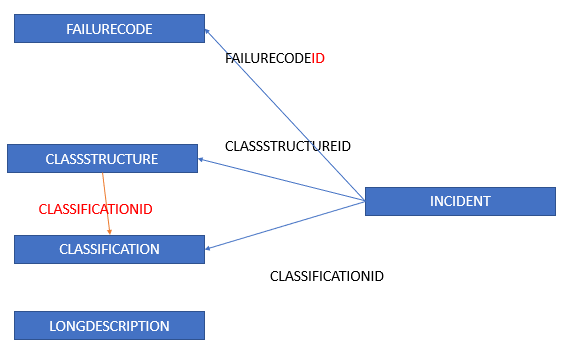

Revisar
*  longdescription sin enlace
*  reconstrucción de la consulta a partir de incidentes
* Desbalanceo
*  columnas sin info o con solo un datos (de 54 a 27 columnas)
*  la tabla classstructure tiene un enlace a la tabla de classification,  validar el cubo.  Esto elimina columanas del procesamiento  (no aportan a la clasificación)
*  diferencia entre los codigos que tienen la palabra u en el encabezado de los que no
* ¿cuantos registros tiene la tabla de incidentes?
* cuales son los textos de la maquina o humanos, estan marcados?  validé sin resultados concluyentes (4 tipos de creadores)

Acuerdos
* datos que tienen información en sus llaves que cruzan. se soluciona con la consulta desde incidentes
* **incidentes sin solucion o codigo de falla nos interesan para ejercicio, validar con el cliente**
*  la relación entre classificación padres e hijos, tiene alguna conexión o se analizan de forma independiente (sale del análisis)
* variable dependiente clasificación
  - incsolucion
  - failurecode


# Analisis variables dependientes
- incsolucion
- failurecode


In [77]:
df_soluciones=df_base['INCSOLUCION'].value_counts('frequencia').to_frame()
df_soluciones.shape

(58, 1)

In [78]:
df_codFallo=df_base['FAILURECODE'].value_counts('frequencia').to_frame()
df_codFallo.shape

(12, 1)

In [79]:
df_soluciones
# Parece un texto abierto, no una variable dependiente

,INCSOLUCION
FINALIZACION PAIS CLARO,0.111111
CCC: Descarga y revisión país claro,0.074074
"Rutina exitosa, sin novedades de fallas.",0.055556
FOIP: Se realiza revisión de gráficas de tráfico de datos en PRTG,0.055556
CCI: Descarga y revisión país claro,0.055556
"Rutina exitosa, sin novedades de fallas",0.037037
FOIP: Se realiza revisión de gráficas de tráfico de datos en PRTG ok,0.037037
"DAPLC: Se procede a realizar cierre del INC, sectores operativos sin alarmas.",0.037037
FOIP: Se realiza revisión de intermitencias ok,0.027778
FOIP: No se presentan intermitencias,0.018519


In [80]:
df_codFallo
# Sirve como variable dependiente,  desbalanceada

,FAILURECODE
ACCESO_ESTACION_BASE,0.813665
FALLA_SONDAS_CRC,0.031056
TRANSMISION,0.024845
BACKBONE IPRAN,0.024845
ENERGIA,0.018634
ACCESO RED COAXIAL,0.018634
CORE_VOZ_FIJA,0.012422
ACCESO RED PLANTA INTERNA,0.012422
FIBRA OPTICA,0.012422
GESTION RED BACKOFFICE IP,0.012422


# Procesamiento de texto
* Plan
 * contar clases variable dependiente
 * Limpieza
 * LDA
 * utilizar topicos como variable dummi para modelo

In [81]:
df_descripcion=df_base[['DESCRIPTION']].value_counts().to_frame('frequencia')
df_descripcion.shape

(583, 1)

In [82]:
df_descripcion.reset_index(inplace=True)
df_descripcion

,DESCRIPTION,frequencia
0,CCI: Descarga y revisión país claro,17
1,CCP:Revisión sondas Medux #724 #753 *229 *230,11
2,FOIP: Se realiza revisión de gráficas de tráfico de datos en PRTG,10
3,"CCP: NOC Pruebas por demanda, validación de sondas medux a nivel nacional",8
4,FOIP: Se realiza revisión de intermitencias,6
...,...,...
578,"FA: FUERA DE SERVICIO EB: GSM 1 por sectores. (IBG.CC Estacion, )",1
579,"FA: FUERA DE SERVICIO EB: GSM 1 por sectores. (CUN.Subachoque-2, )",1
580,"FA: FUERA DE SERVICIO EB: GSM 1 por sectores. (CUN.Piscilago, )",1
581,"FA: FUERA DE SERVICIO EB: GSM 1 por sectores. (CUN.Gama, )",1


In [83]:
import pyLDAvis
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()
import gensim
import pyLDAvis.gensim_models
from gensim.models.coherencemodel import CoherenceModel
from gensim import corpora
from gensim.corpora import Dictionary
from gensim.models import LdaModel

C:\ProgramData\Anaconda3\envs\T\lib\site-packages\sklearn\linear_model\_least_angle.py:30: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='lar', copy_X=True, eps=np.finfo(np.float).eps,
C:\ProgramData\Anaconda3\envs\T\lib\site-packages\sklearn\linear_model\_least_angle.py:169: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='la

In [84]:
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk.tokenize import ToktokTokenizer
import nltk
import json, re

C:\ProgramData\Anaconda3\envs\T\lib\site-packages\sklearn\feature_extraction\image.py:167: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int):


In [85]:
def limpiar_texto(texto):
    """
    Función para realizar la limpieza de un texto dado.
    """
    # Eliminamos los caracteres especiales
    texto = re.sub(r'\W', ' ', str(texto))
    # Eliminamos comas y /
    texto = re.sub(r',', ' ', str(texto))
    texto = re.sub(r'/', ' ', str(texto))
    # Eliminado las palabras que tengo un solo caracter
    texto = re.sub(r'\s+[a-zA-Z]\s+', ' ', texto)
    # Sustituir los espacios en blanco en uno solo
    texto = re.sub(r'\s+', ' ', texto, flags=re.I)
    # Convertimos textos a minusculas
    texto = texto.lower()
    return texto

In [86]:
nltk.download('stopwords')
STOPWORDS = set(stopwords.words("spanish"))
def filtrar_stopword_digitos(tokens):
    """
    Filtra stopwords y digitos de una lista de tokens.
    """
    return [token for token in tokens if token not in STOPWORDS 
            and not token.isdigit()]

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\CristhianJohnatanIzq\AppData\Roaming\nltk_dat
[nltk_data]     a...
[nltk_data]   Package stopwords is already up-to-date!


In [87]:
stemmer = SnowballStemmer("spanish")
def stem_palabras(tokens):
    """
    Reduce cada palabra de una lista dada a su raíz.
    """
    return [stemmer.stem(token) for token in tokens]

In [88]:
def Limpiar_Caracter(texto):
    if len(texto) == 1 or texto == ',':
        texto = ''
    else:
        texto = texto
    return texto

In [89]:
tokenizer = ToktokTokenizer()
df_descripcion["desc_proc"] = df_descripcion["DESCRIPTION"].apply(limpiar_texto)
df_descripcion["desc_proc"] = df_descripcion["desc_proc"].apply(tokenizer.tokenize)
df_descripcion["desc_proc"] = df_descripcion["desc_proc"].apply(filtrar_stopword_digitos)
df_descripcion["desc_proc"] = df_descripcion["desc_proc"].apply(stem_palabras)

In [90]:
## Falta limpiar texto

In [91]:
df_descripcion

,DESCRIPTION,frequencia,desc_proc
0,CCI: Descarga y revisión país claro,17,"[cci, descarg, revision, pais, clar]"
1,CCP:Revisión sondas Medux #724 #753 *229 *230,11,"[ccp, revision, sond, medux]"
2,FOIP: Se realiza revisión de gráficas de tráfico de datos en PRTG,10,"[foip, realiz, revision, grafic, trafic, dat, prtg]"
3,"CCP: NOC Pruebas por demanda, validación de sondas medux a nivel nacional",8,"[ccp, noc, prueb, demand, valid, sond, medux, nivel, nacional]"
4,FOIP: Se realiza revisión de intermitencias,6,"[foip, realiz, revision, intermitent]"
...,...,...,...
578,"FA: FUERA DE SERVICIO EB: GSM 1 por sectores. (IBG.CC Estacion, )",1,"[fa, servici, eb, gsm, sector, ibg, cc, estacion]"
579,"FA: FUERA DE SERVICIO EB: GSM 1 por sectores. (CUN.Subachoque-2, )",1,"[fa, servici, eb, gsm, sector, cun, subachoqu]"
580,"FA: FUERA DE SERVICIO EB: GSM 1 por sectores. (CUN.Piscilago, )",1,"[fa, servici, eb, gsm, sector, cun, piscilag]"
581,"FA: FUERA DE SERVICIO EB: GSM 1 por sectores. (CUN.Gama, )",1,"[fa, servici, eb, gsm, sector, cun, gam]"


In [92]:
#Lista_general=[]
#listAux = df_descripcion["desc_proc"].tolist()
#listAux = [x for x in listAux if x!= []]
Lista_general = df_descripcion["desc_proc"].tolist()
Lista_general = [x for x in Lista_general if x!= []]

In [93]:
"""
tokenizer = ToktokTokenizer() 
Lista_general=[]
dfc = dfSent[dfSent['Q2_NPS_GROUP']!='Promotor']
for column in Qs:    
    dfc["Tokens_"+column] = dfc["Tokens_"+column].apply(tokenizer.tokenize)
    dfc["Tokens_"+column] = dfc["Tokens_"+column].apply(filtrar_stopword_digitos)
    dfc["Tokens_"+column] = dfc["Tokens_"+column].apply(stem_palabras)
    #solo ciertas Qs son agregadas
    if column in ('Q4','Q10','Q12','Q15','Q18','Q20') :
        listAux = dfc["Tokens_"+column].tolist()
        listAux = [x for x in listAux if x!= []]
        #print("Qs")
        print(column, len(listAux))
        Lista_general = Lista_general+listAux"""

'\ntokenizer = ToktokTokenizer() \nLista_general=[]\ndfc = dfSent[dfSent[\'Q2_NPS_GROUP\']!=\'Promotor\']\nfor column in Qs:    \n    dfc["Tokens_"+column] = dfc["Tokens_"+column].apply(tokenizer.tokenize)\n    dfc["Tokens_"+column] = dfc["Tokens_"+column].apply(filtrar_stopword_digitos)\n    dfc["Tokens_"+column] = dfc["Tokens_"+column].apply(stem_palabras)\n    #solo ciertas Qs son agregadas\n    if column in (\'Q4\',\'Q10\',\'Q12\',\'Q15\',\'Q18\',\'Q20\') :\n        listAux = dfc["Tokens_"+column].tolist()\n        listAux = [x for x in listAux if x!= []]\n        #print("Qs")\n        print(column, len(listAux))\n        Lista_general = Lista_general+listAux'

In [94]:
#modelo topicos
### Funciones para modelo de tópicos
def make_bigrams(texts,bigram_mod):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts,bigram_mod,trigram_mod):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def impresionTopicos(mod,nPalabras,nTopicos):
    topicos = mod.print_topics(num_words=nPalabras, num_topics=nTopicos)
    for topico in topicos:
        print(topico)    
        
def impresionTopicosLimp(mod,nPalabras,nTopicos):
    #Impresion limpia de Tópicos
    topicos = mod.print_topics(num_words=nPalabras, num_topics=nTopicos)
    i=0
    for topico in topicos:
        i=i+1
        textoAux = re.sub(r'\W', ' ', str(topico))
        textoAux = re.sub(r'\s+[a-zA-Z]\s+', ' ', textoAux)
        textoAux = re.sub(r'[0-9]', ' ', textoAux)
        textoAux = re.sub(r'\s+', ' ', textoAux, flags=re.I)
        print(str(i),textoAux)

In [95]:
bigram = gensim.models.Phrases(Lista_general, min_count=5, threshold=10) 
trigram = gensim.models.Phrases(bigram[Lista_general], threshold=10)  

bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

data_words_bigrams = make_bigrams(Lista_general,bigram_mod)

diccionario = Dictionary(data_words_bigrams)
print(f'Número de tokens: {len(diccionario)}')

diccionario.filter_extremes(no_below=2, no_above = 0.9)
print(f'Número de tokens: {len(diccionario)}')

corpus = [diccionario.doc2bow(noticia) for noticia in data_words_bigrams]

Número de tokens: 968
Número de tokens: 414


In [96]:
numeroTopicos=10

In [97]:
lda = LdaModel(corpus=corpus, id2word=diccionario, 
               num_topics=numeroTopicos, random_state=35, 
               chunksize=1000, iterations=200, passes=40, alpha='auto')

In [98]:
impresionTopicos(lda,5,numeroTopicos)

(0, '0.088*"servici" + 0.086*"eb" + 0.073*"fa" + 0.056*"complet" + 0.047*"ant"')
(1, '0.151*"eb" + 0.079*"pe" + 0.040*"ccc_trabaj" + 0.040*"hor_hor" + 0.038*"energi"')
(2, '0.095*"3g" + 0.090*"complet" + 0.076*"servici" + 0.065*"fa" + 0.061*"eb"')
(3, '0.246*"wbts" + 0.120*"afect" + 0.117*"fa" + 0.108*"eb" + 0.098*"fall_perd"')
(4, '0.108*"eb" + 0.055*"faoc" + 0.054*"pe" + 0.048*"umts" + 0.047*"med"')
(5, '0.093*"cor" + 0.080*"ventan_manten" + 0.073*"id" + 0.066*"aprob" + 0.049*"val"')
(6, '0.063*"element_traffic" + 0.061*"cle_cod" + 0.058*"fc_alarm" + 0.056*"anormal_cgr" + 0.042*"snd"')
(7, '0.101*"eb" + 0.077*"ind" + 0.062*"comercial" + 0.059*"encend" + 0.059*"fe_plant"')
(8, '0.188*"bcf" + 0.110*"eb" + 0.102*"fa" + 0.102*"afect" + 0.067*"failur"')
(9, '0.139*"servici" + 0.135*"eb" + 0.125*"fa" + 0.079*"sector" + 0.062*"2g"')


In [99]:
impresionTopicosLimp(lda,15,numeroTopicos)

1  servici eb fa complet ant g bog lte bar gsm_sector g sector san faob bol 
2  eb pe ccc_trabaj hor_hor energi fee fee_alarm pow_bateri hui bateri plant_encend alarm_energi mid umts activ 
3  g complet servici fa eb y _y g_j cun car lte y prueb x_y bog 
4  wbts afect fa eb fall_perd gestion_m bog cun san mag bar val vm_id mon 
5  eb faoc pe umts med gsm sector val bloque_usuari mpacc_t caq mpacc_t _servici lte medellin foip 
6  cor ventan_manten id aprob val anormal_porcentaj alarm_c hast_minut cle_cod aprob_de cuc masiv traffic anormal_marcacion encim_element 
7  element_traffic cle_cod fc_alarm anormal_cgr snd porcentaj_cle cod_anormal marcacion_encim c_anormal alarm porcentaj fall bas_station faulty_bts cc 
8  eb ind comercial encend fe_plant fall_red met clar per parqu pal plaz via rubial banacol 
9  bcf eb fa afect failur fall_pcm servici ces nor hast boy bog vill tol snd 
10  servici eb fa sector g umts complet gsm_sector bog lte val ces cun suc plant_electr 


In [100]:
lda_display = pyLDAvis.gensim_models.prepare(lda, corpus, diccionario, sort_topics=False)
pyLDAvis.display(lda_display)

In [101]:
df_descripcion

,DESCRIPTION,frequencia,desc_proc
0,CCI: Descarga y revisión país claro,17,"[cci, descarg, revision, pais, clar]"
1,CCP:Revisión sondas Medux #724 #753 *229 *230,11,"[ccp, revision, sond, medux]"
2,FOIP: Se realiza revisión de gráficas de tráfico de datos en PRTG,10,"[foip, realiz, revision, grafic, trafic, dat, prtg]"
3,"CCP: NOC Pruebas por demanda, validación de sondas medux a nivel nacional",8,"[ccp, noc, prueb, demand, valid, sond, medux, nivel, nacional]"
4,FOIP: Se realiza revisión de intermitencias,6,"[foip, realiz, revision, intermitent]"
...,...,...,...
578,"FA: FUERA DE SERVICIO EB: GSM 1 por sectores. (IBG.CC Estacion, )",1,"[fa, servici, eb, gsm, sector, ibg, cc, estacion]"
579,"FA: FUERA DE SERVICIO EB: GSM 1 por sectores. (CUN.Subachoque-2, )",1,"[fa, servici, eb, gsm, sector, cun, subachoqu]"
580,"FA: FUERA DE SERVICIO EB: GSM 1 por sectores. (CUN.Piscilago, )",1,"[fa, servici, eb, gsm, sector, cun, piscilag]"
581,"FA: FUERA DE SERVICIO EB: GSM 1 por sectores. (CUN.Gama, )",1,"[fa, servici, eb, gsm, sector, cun, gam]"


In [102]:
df_descripcion.iloc[1]['desc_proc']

['ccp', 'revision', 'sond', 'medux']

In [103]:
bow_comentario = diccionario.doc2bow(df_descripcion.iloc[1]['desc_proc'])

In [104]:
bow_comentario

[(3, 1), (4, 1), (5, 1), (6, 1)]

In [105]:
distribucion_noticia = lda[bow_comentario]
distribucion_noticia

[(0, 0.011634762),
 (1, 0.011114004),
 (2, 0.45476568),
 (3, 0.012474737),
 (7, 0.010753737),
 (8, 0.012560168),
 (9, 0.46210083)]

In [106]:
[x[1] for x in distribucion_noticia]

[0.011634762,
 0.011114004,
 0.45476568,
 0.012474737,
 0.010753737,
 0.012560168,
 0.46210083]

In [107]:
type([x[1] for x in distribucion_noticia])

list

In [108]:
def disbribucionProbTopicos(arr_text):
    bow_comentario = diccionario.doc2bow(arr_text)
    distribucion_noticia = lda[bow_comentario]
    print(len(distribucion_noticia))
    print(distribucion_noticia)
    print (dict(distribucion_noticia))
    df_aux=pd.DataFrame(distribucion_noticia,columns=['ind','prob'])
    print(df_aux)
    df_plan=pd.DataFrame(index=range(0,numeroTopicos))
    df_plan=df_plan.merge(df_aux, left_index=True, right_on='ind', how='left')
    df_plan.fillna(0,inplace=True)
    df_plan.set_index('ind', inplace=True)
    print(df_plan['prob'])
    #return [x[1] for x in distribucion_noticia]    
    return df_plan['prob']

In [109]:
for i in range(0,numeroTopicos):
    df_descripcion[i]=0

In [110]:
df_descripcion

,DESCRIPTION,frequencia,desc_proc,0,1,2,3,4,5,6,7,8,9
0,CCI: Descarga y revisión país claro,17,"[cci, descarg, revision, pais, clar]",0,0,0,0,0,0,0,0,0,0
1,CCP:Revisión sondas Medux #724 #753 *229 *230,11,"[ccp, revision, sond, medux]",0,0,0,0,0,0,0,0,0,0
2,FOIP: Se realiza revisión de gráficas de tráfico de datos en PRTG,10,"[foip, realiz, revision, grafic, trafic, dat, prtg]",0,0,0,0,0,0,0,0,0,0
3,"CCP: NOC Pruebas por demanda, validación de sondas medux a nivel nacional",8,"[ccp, noc, prueb, demand, valid, sond, medux, nivel, nacional]",0,0,0,0,0,0,0,0,0,0
4,FOIP: Se realiza revisión de intermitencias,6,"[foip, realiz, revision, intermitent]",0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
578,"FA: FUERA DE SERVICIO EB: GSM 1 por sectores. (IBG.CC Estacion, )",1,"[fa, servici, eb, gsm, sector, ibg, cc, estacion]",0,0,0,0,0,0,0,0,0,0
579,"FA: FUERA DE SERVICIO EB: GSM 1 por sectores. (CUN.Subachoque-2, )",1,"[fa, servici, eb, gsm, sector, cun, subachoqu]",0,0,0,0,0,0,0,0,0,0
580,"FA: FUERA DE SERVICIO EB: GSM 1 por sectores. (CUN.Piscilago, )",1,"[fa, servici, eb, gsm, sector, cun, piscilag]",0,0,0,0,0,0,0,0,0,0
581,"FA: FUERA DE SERVICIO EB: GSM 1 por sectores. (CUN.Gama, )",1,"[fa, servici, eb, gsm, sector, cun, gam]",0,0,0,0,0,0,0,0,0,0


In [111]:
df_descripcion[[0,1,2,3,4,5,6,7,8,9]]=df_descripcion['desc_proc'].apply(disbribucionProbTopicos)
#df_descripcion['desc_proc'].apply(disbribucionProbTopicos)

7
[(0, 0.011634366), (1, 0.011113625), (3, 0.0124743115), (6, 0.9007286), (7, 0.01075337), (8, 0.01255974), (9, 0.01599428)]
{0: 0.011634366, 1: 0.011113625, 3: 0.0124743115, 6: 0.9007286, 7: 0.01075337, 8: 0.01255974, 9: 0.01599428}
   ind      prob
0    0  0.011634
1    1  0.011114
2    3  0.012474
3    6  0.900729
4    7  0.010753
5    8  0.012560
6    9  0.015994
ind
0    0.011634
1    0.011114
2    0.000000
3    0.012474
4    0.000000
5    0.000000
6    0.900729
7    0.010753
8    0.012560
9    0.015994
Name: prob, dtype: float32
7
[(0, 0.0116347615), (1, 0.011114003), (2, 0.45476562), (3, 0.012474736), (7, 0.010753736), (8, 0.012560167), (9, 0.46210083)]
{0: 0.0116347615, 1: 0.011114003, 2: 0.45476562, 3: 0.012474736, 7: 0.010753736, 8: 0.012560167, 9: 0.46210083}
   ind      prob
0    0  0.011635
1    1  0.011114
2    2  0.454766
3    3  0.012475
4    7  0.010754
5    8  0.012560
6    9  0.462101
ind
0    0.011635
1    0.011114
2    0.454766
3    0.012475
4    0.000000
5    0.00

2    7  0.323525
ind
0    0.000000
1    0.000000
2    0.000000
3    0.544101
4    0.000000
5    0.000000
6    0.099854
7    0.323525
8    0.000000
9    0.000000
Name: prob, dtype: float32
2
[(3, 0.8630885), (6, 0.09979296)]
{3: 0.8630885, 6: 0.09979296}
   ind      prob
0    3  0.863088
1    6  0.099793
ind
0    0.000000
1    0.000000
2    0.000000
3    0.863088
4    0.000000
5    0.000000
6    0.099793
7    0.000000
8    0.000000
9    0.000000
Name: prob, dtype: float32
2
[(3, 0.8213596), (6, 0.13277137)]
{3: 0.8213596, 6: 0.13277137}
   ind      prob
0    3  0.821360
1    6  0.132771
ind
0    0.000000
1    0.000000
2    0.000000
3    0.821360
4    0.000000
5    0.000000
6    0.132771
7    0.000000
8    0.000000
9    0.000000
Name: prob, dtype: float32
4
[(3, 0.54559374), (4, 0.1239808), (6, 0.07952451), (7, 0.22203237)]
{3: 0.54559374, 4: 0.1239808, 6: 0.07952451, 7: 0.22203237}
   ind      prob
0    3  0.545594
1    4  0.123981
2    6  0.079525
3    7  0.222032
ind
0    0.000000
1  

Name: prob, dtype: float32
3
[(0, 0.65413904), (4, 0.25795582), (8, 0.06971199)]
{0: 0.65413904, 4: 0.25795582, 8: 0.06971199}
   ind      prob
0    0  0.654139
1    4  0.257956
2    8  0.069712
ind
0    0.654139
1    0.000000
2    0.000000
3    0.000000
4    0.257956
5    0.000000
6    0.000000
7    0.000000
8    0.069712
9    0.000000
Name: prob, dtype: float32
3
[(2, 0.5247811), (4, 0.3703042), (5, 0.08088249)]
{2: 0.5247811, 4: 0.3703042, 5: 0.08088249}
   ind      prob
0    2  0.524781
1    4  0.370304
2    5  0.080882
ind
0    0.000000
1    0.000000
2    0.524781
3    0.000000
4    0.370304
5    0.080882
6    0.000000
7    0.000000
8    0.000000
9    0.000000
Name: prob, dtype: float32
4
[(0, 0.24851665), (3, 0.5249091), (4, 0.0990528), (5, 0.0986515)]
{0: 0.24851665, 3: 0.5249091, 4: 0.0990528, 5: 0.0986515}
   ind      prob
0    0  0.248517
1    3  0.524909
2    4  0.099053
3    5  0.098651
ind
0    0.248517
1    0.000000
2    0.000000
3    0.524909
4    0.099053
5    0.098651


Name: prob, dtype: float32
3
[(6, 0.099838465), (7, 0.28523093), (8, 0.5824474)]
{6: 0.099838465, 7: 0.28523093, 8: 0.5824474}
   ind      prob
0    6  0.099838
1    7  0.285231
2    8  0.582447
ind
0    0.000000
1    0.000000
2    0.000000
3    0.000000
4    0.000000
5    0.000000
6    0.099838
7    0.285231
8    0.582447
9    0.000000
Name: prob, dtype: float32
2
[(6, 0.11041407), (8, 0.8485936)]
{6: 0.11041407, 8: 0.8485936}
   ind      prob
0    6  0.110414
1    8  0.848594
ind
0    0.000000
1    0.000000
2    0.000000
3    0.000000
4    0.000000
5    0.000000
6    0.110414
7    0.000000
8    0.848594
9    0.000000
Name: prob, dtype: float32
3
[(1, 0.14270349), (6, 0.12361985), (8, 0.69372517)]
{1: 0.14270349, 6: 0.12361985, 8: 0.69372517}
   ind      prob
0    1  0.142703
1    6  0.123620
2    8  0.693725
ind
0    0.000000
1    0.142703
2    0.000000
3    0.000000
4    0.000000
5    0.000000
6    0.123620
7    0.000000
8    0.693725
9    0.000000
Name: prob, dtype: float32
2
[(6, 

3
[(3, 0.57587093), (6, 0.14269704), (7, 0.2561482)]
{3: 0.57587093, 6: 0.14269704, 7: 0.2561482}
   ind      prob
0    3  0.575871
1    6  0.142697
2    7  0.256148
ind
0    0.000000
1    0.000000
2    0.000000
3    0.575871
4    0.000000
5    0.000000
6    0.142697
7    0.256148
8    0.000000
9    0.000000
Name: prob, dtype: float32
2
[(3, 0.8305151), (6, 0.123616084)]
{3: 0.8305151, 6: 0.123616084}
   ind      prob
0    3  0.830515
1    6  0.123616
ind
0    0.000000
1    0.000000
2    0.000000
3    0.830515
4    0.000000
5    0.000000
6    0.123616
7    0.000000
8    0.000000
9    0.000000
Name: prob, dtype: float32
4
[(0, 0.46916252), (4, 0.16177765), (5, 0.31375542), (9, 0.011059956)]
{0: 0.46916252, 4: 0.16177765, 5: 0.31375542, 9: 0.011059956}
   ind      prob
0    0  0.469163
1    4  0.161778
2    5  0.313755
3    9  0.011060
ind
0    0.469163
1    0.000000
2    0.000000
3    0.000000
4    0.161778
5    0.313755
6    0.000000
7    0.000000
8    0.000000
9    0.011060
Name: prob

9    9  0.028877
ind
0    0.021005
1    0.020065
2    0.418290
3    0.022522
4    0.015414
5    0.013703
6    0.418032
7    0.019415
8    0.022676
9    0.028877
Name: prob, dtype: float32
10
[(0, 0.02100571), (1, 0.02006552), (2, 0.015553387), (3, 0.022522222), (4, 0.82089233), (5, 0.013702793), (6, 0.015289065), (7, 0.019415082), (8, 0.022676462), (9, 0.028877424)]
{0: 0.02100571, 1: 0.02006552, 2: 0.015553387, 3: 0.022522222, 4: 0.82089233, 5: 0.013702793, 6: 0.015289065, 7: 0.019415082, 8: 0.022676462, 9: 0.028877424}
   ind      prob
0    0  0.021006
1    1  0.020066
2    2  0.015553
3    3  0.022522
4    4  0.820892
5    5  0.013703
6    6  0.015289
7    7  0.019415
8    8  0.022676
9    9  0.028877
ind
0    0.021006
1    0.020066
2    0.015553
3    0.022522
4    0.820892
5    0.013703
6    0.015289
7    0.019415
8    0.022676
9    0.028877
Name: prob, dtype: float32
9
[(0, 0.8763019), (1, 0.014304481), (2, 0.011087834), (3, 0.01605584), (4, 0.01098891), (6, 0.010899402), (7, 0.01

Name: prob, dtype: float32
10
[(0, 0.021006223), (1, 0.020066008), (2, 0.015553767), (3, 0.42523098), (4, 0.015414998), (5, 0.013703127), (6, 0.41805413), (7, 0.019415556), (8, 0.022677016), (9, 0.028878162)]
{0: 0.021006223, 1: 0.020066008, 2: 0.015553767, 3: 0.42523098, 4: 0.015414998, 5: 0.013703127, 6: 0.41805413, 7: 0.019415556, 8: 0.022677016, 9: 0.028878162}
   ind      prob
0    0  0.021006
1    1  0.020066
2    2  0.015554
3    3  0.425231
4    4  0.015415
5    5  0.013703
6    6  0.418054
7    7  0.019416
8    8  0.022677
9    9  0.028878
ind
0    0.021006
1    0.020066
2    0.015554
3    0.425231
4    0.015415
5    0.013703
6    0.418054
7    0.019416
8    0.022677
9    0.028878
Name: prob, dtype: float32
4
[(1, 0.2910724), (3, 0.06398362), (5, 0.4173227), (6, 0.20909919)]
{1: 0.2910724, 3: 0.06398362, 5: 0.4173227, 6: 0.20909919}
   ind      prob
0    1  0.291072
1    3  0.063984
2    5  0.417323
3    6  0.209099
ind
0    0.000000
1    0.291072
2    0.000000
3    0.063984
4

Name: prob, dtype: float32
3
[(1, 0.30879256), (6, 0.12739767), (7, 0.5229031)]
{1: 0.30879256, 6: 0.12739767, 7: 0.5229031}
   ind      prob
0    1  0.308793
1    6  0.127398
2    7  0.522903
ind
0    0.000000
1    0.308793
2    0.000000
3    0.000000
4    0.000000
5    0.000000
6    0.127398
7    0.522903
8    0.000000
9    0.000000
Name: prob, dtype: float32
3
[(6, 0.23357797), (7, 0.4121055), (8, 0.31417483)]
{6: 0.23357797, 7: 0.4121055, 8: 0.31417483}
   ind      prob
0    6  0.233578
1    7  0.412106
2    8  0.314175
ind
0    0.000000
1    0.000000
2    0.000000
3    0.000000
4    0.000000
5    0.000000
6    0.233578
7    0.412106
8    0.314175
9    0.000000
Name: prob, dtype: float32
3
[(6, 0.16709277), (7, 0.7716975), (9, 0.011059988)]
{6: 0.16709277, 7: 0.7716975, 9: 0.011059988}
   ind      prob
0    6  0.167093
1    7  0.771698
2    9  0.011060
ind
0    0.000000
1    0.000000
2    0.000000
3    0.000000
4    0.000000
5    0.000000
6    0.167093
7    0.771698
8    0.000000
9

1    2  0.483316
ind
0    0.482527
1    0.000000
2    0.483316
3    0.000000
4    0.000000
5    0.000000
6    0.000000
7    0.000000
8    0.000000
9    0.000000
Name: prob, dtype: float32
2
[(0, 0.5650745), (2, 0.40350538)]
{0: 0.5650745, 2: 0.40350538}
   ind      prob
0    0  0.565075
1    2  0.403505
ind
0    0.565075
1    0.000000
2    0.403505
3    0.000000
4    0.000000
5    0.000000
6    0.000000
7    0.000000
8    0.000000
9    0.000000
Name: prob, dtype: float32
1
[(9, 0.9450373)]
{9: 0.9450373}
   ind      prob
0    9  0.945037
ind
0    0.000000
1    0.000000
2    0.000000
3    0.000000
4    0.000000
5    0.000000
6    0.000000
7    0.000000
8    0.000000
9    0.945037
Name: prob, dtype: float32
3
[(0, 0.13442037), (2, 0.7341118), (3, 0.10652501)]
{0: 0.13442037, 2: 0.7341118, 3: 0.10652501}
   ind      prob
0    0  0.134420
1    2  0.734112
2    3  0.106525
ind
0    0.134420
1    0.000000
2    0.734112
3    0.106525
4    0.000000
5    0.000000
6    0.000000
7    0.000000
8  

0    9  0.956628
ind
0    0.000000
1    0.000000
2    0.000000
3    0.000000
4    0.000000
5    0.000000
6    0.000000
7    0.000000
8    0.000000
9    0.956628
Name: prob, dtype: float32
2
[(0, 0.33007956), (9, 0.632049)]
{0: 0.33007956, 9: 0.632049}
   ind      prob
0    0  0.330080
1    9  0.632049
ind
0    0.330080
1    0.000000
2    0.000000
3    0.000000
4    0.000000
5    0.000000
6    0.000000
7    0.000000
8    0.000000
9    0.632049
Name: prob, dtype: float32
1
[(2, 0.94061637)]
{2: 0.94061637}
   ind      prob
0    2  0.940616
ind
0    0.000000
1    0.000000
2    0.940616
3    0.000000
4    0.000000
5    0.000000
6    0.000000
7    0.000000
8    0.000000
9    0.000000
Name: prob, dtype: float32
1
[(0, 0.9624808)]
{0: 0.9624808}
   ind      prob
0    0  0.962481
ind
0    0.962481
1    0.000000
2    0.000000
3    0.000000
4    0.000000
5    0.000000
6    0.000000
7    0.000000
8    0.000000
9    0.000000
Name: prob, dtype: float32
2
[(3, 0.42158034), (8, 0.5430511)]
{3: 0.4215

0    0  0.989859
ind
0    0.989859
1    0.000000
2    0.000000
3    0.000000
4    0.000000
5    0.000000
6    0.000000
7    0.000000
8    0.000000
9    0.000000
Name: prob, dtype: float32
2
[(2, 0.27437994), (4, 0.706717)]
{2: 0.27437994, 4: 0.706717}
   ind      prob
0    2  0.274380
1    4  0.706717
ind
0    0.000000
1    0.000000
2    0.274380
3    0.000000
4    0.706717
5    0.000000
6    0.000000
7    0.000000
8    0.000000
9    0.000000
Name: prob, dtype: float32
3
[(0, 0.39668095), (2, 0.509736), (4, 0.0826867)]
{0: 0.39668095, 2: 0.509736, 4: 0.0826867}
   ind      prob
0    0  0.396681
1    2  0.509736
2    4  0.082687
ind
0    0.396681
1    0.000000
2    0.509736
3    0.000000
4    0.082687
5    0.000000
6    0.000000
7    0.000000
8    0.000000
9    0.000000
Name: prob, dtype: float32
2
[(5, 0.77755946), (9, 0.21263713)]
{5: 0.77755946, 9: 0.21263713}
   ind      prob
0    5  0.777559
1    9  0.212637
ind
0    0.000000
1    0.000000
2    0.000000
3    0.000000
4    0.000000


Name: prob, dtype: float32
2
[(7, 0.39951143), (9, 0.55768716)]
{7: 0.39951143, 9: 0.55768716}
   ind      prob
0    7  0.399511
1    9  0.557687
ind
0    0.000000
1    0.000000
2    0.000000
3    0.000000
4    0.000000
5    0.000000
6    0.000000
7    0.399511
8    0.000000
9    0.557687
Name: prob, dtype: float32
2
[(5, 0.21448088), (9, 0.7457358)]
{5: 0.21448088, 9: 0.7457358}
   ind      prob
0    5  0.214481
1    9  0.745736
ind
0    0.000000
1    0.000000
2    0.000000
3    0.000000
4    0.000000
5    0.214481
6    0.000000
7    0.000000
8    0.000000
9    0.745736
Name: prob, dtype: float32
1
[(9, 0.9365596)]
{9: 0.9365596}
   ind     prob
0    9  0.93656
ind
0    0.00000
1    0.00000
2    0.00000
3    0.00000
4    0.00000
5    0.00000
6    0.00000
7    0.00000
8    0.00000
9    0.93656
Name: prob, dtype: float32
1
[(9, 0.9365596)]
{9: 0.9365596}
   ind     prob
0    9  0.93656
ind
0    0.00000
1    0.00000
2    0.00000
3    0.00000
4    0.00000
5    0.00000
6    0.00000
7    0.

Name: prob, dtype: float32
2
[(0, 0.29604143), (8, 0.6598079)]
{0: 0.29604143, 8: 0.6598079}
   ind      prob
0    0  0.296041
1    8  0.659808
ind
0    0.296041
1    0.000000
2    0.000000
3    0.000000
4    0.000000
5    0.000000
6    0.000000
7    0.000000
8    0.659808
9    0.000000
Name: prob, dtype: float32
2
[(8, 0.27277428), (9, 0.6897923)]
{8: 0.27277428, 9: 0.6897923}
   ind      prob
0    8  0.272774
1    9  0.689792
ind
0    0.000000
1    0.000000
2    0.000000
3    0.000000
4    0.000000
5    0.000000
6    0.000000
7    0.000000
8    0.272774
9    0.689792
Name: prob, dtype: float32
1
[(9, 0.94503635)]
{9: 0.94503635}
   ind      prob
0    9  0.945036
ind
0    0.000000
1    0.000000
2    0.000000
3    0.000000
4    0.000000
5    0.000000
6    0.000000
7    0.000000
8    0.000000
9    0.945036
Name: prob, dtype: float32
2
[(8, 0.38749403), (9, 0.5650669)]
{8: 0.38749403, 9: 0.5650669}
   ind      prob
0    8  0.387494
1    9  0.565067
ind
0    0.000000
1    0.000000
2    0.

Name: prob, dtype: float32
1
[(9, 0.95151645)]
{9: 0.95151645}
   ind      prob
0    9  0.951516
ind
0    0.000000
1    0.000000
2    0.000000
3    0.000000
4    0.000000
5    0.000000
6    0.000000
7    0.000000
8    0.000000
9    0.951516
Name: prob, dtype: float32
1
[(9, 0.9515155)]
{9: 0.9515155}
   ind      prob
0    9  0.951515
ind
0    0.000000
1    0.000000
2    0.000000
3    0.000000
4    0.000000
5    0.000000
6    0.000000
7    0.000000
8    0.000000
9    0.951515
Name: prob, dtype: float32
1
[(9, 0.9515155)]
{9: 0.9515155}
   ind      prob
0    9  0.951515
ind
0    0.000000
1    0.000000
2    0.000000
3    0.000000
4    0.000000
5    0.000000
6    0.000000
7    0.000000
8    0.000000
9    0.951515
Name: prob, dtype: float32
1
[(9, 0.93655914)]
{9: 0.93655914}
   ind      prob
0    9  0.936559
ind
0    0.000000
1    0.000000
2    0.000000
3    0.000000
4    0.000000
5    0.000000
6    0.000000
7    0.000000
8    0.000000
9    0.936559
Name: prob, dtype: float32
1
[(9, 0.9450

0    8  0.942979
ind
0    0.000000
1    0.000000
2    0.000000
3    0.000000
4    0.000000
5    0.000000
6    0.000000
7    0.000000
8    0.942979
9    0.000000
Name: prob, dtype: float32
2
[(4, 0.28252235), (9, 0.65994084)]
{4: 0.28252235, 9: 0.65994084}
   ind      prob
0    4  0.282522
1    9  0.659941
ind
0    0.000000
1    0.000000
2    0.000000
3    0.000000
4    0.282522
5    0.000000
6    0.000000
7    0.000000
8    0.000000
9    0.659941
Name: prob, dtype: float32
2
[(4, 0.1613407), (9, 0.7888108)]
{4: 0.1613407, 9: 0.7888108}
   ind      prob
0    4  0.161341
1    9  0.788811
ind
0    0.000000
1    0.000000
2    0.000000
3    0.000000
4    0.161341
5    0.000000
6    0.000000
7    0.000000
8    0.000000
9    0.788811
Name: prob, dtype: float32
2
[(4, 0.16138214), (9, 0.7887683)]
{4: 0.16138214, 9: 0.7887683}
   ind      prob
0    4  0.161382
1    9  0.788768
ind
0    0.000000
1    0.000000
2    0.000000
3    0.000000
4    0.161382
5    0.000000
6    0.000000
7    0.000000
8  

In [112]:
df_descripcion

,DESCRIPTION,frequencia,desc_proc,0,1,2,3,4,5,6,7,8,9
0,CCI: Descarga y revisión país claro,17,"[cci, descarg, revision, pais, clar]",0.011634,0.011114,0.000000,0.012474,0.000000,0.0,0.900729,0.010753,0.012560,0.015994
1,CCP:Revisión sondas Medux #724 #753 *229 *230,11,"[ccp, revision, sond, medux]",0.011635,0.011114,0.454766,0.012475,0.000000,0.0,0.000000,0.010754,0.012560,0.462101
2,FOIP: Se realiza revisión de gráficas de tráfico de datos en PRTG,10,"[foip, realiz, revision, grafic, trafic, dat, prtg]",0.000000,0.000000,0.673348,0.000000,0.000000,0.0,0.272339,0.000000,0.000000,0.000000
3,"CCP: NOC Pruebas por demanda, validación de sondas medux a nivel nacional",8,"[ccp, noc, prueb, demand, valid, sond, medux, nivel, nacional]",0.000000,0.000000,0.742313,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.218385
4,FOIP: Se realiza revisión de intermitencias,6,"[foip, realiz, revision, intermitent]",0.011634,0.011114,0.000000,0.012474,0.324903,0.0,0.584364,0.010753,0.012560,0.015994
...,...,...,...,...,...,...,...,...,...,...,...,...,...
578,"FA: FUERA DE SERVICIO EB: GSM 1 por sectores. (IBG.CC Estacion, )",1,"[fa, servici, eb, gsm, sector, ibg, cc, estacion]",0.817066,0.000000,0.000000,0.000000,0.136657,0.0,0.000000,0.000000,0.000000,0.000000
579,"FA: FUERA DE SERVICIO EB: GSM 1 por sectores. (CUN.Subachoque-2, )",1,"[fa, servici, eb, gsm, sector, cun, subachoqu]",0.000000,0.000000,0.000000,0.000000,0.193439,0.0,0.000000,0.000000,0.000000,0.749024
580,"FA: FUERA DE SERVICIO EB: GSM 1 por sectores. (CUN.Piscilago, )",1,"[fa, servici, eb, gsm, sector, cun, piscilag]",0.000000,0.000000,0.000000,0.000000,0.193532,0.0,0.000000,0.000000,0.000000,0.748931
581,"FA: FUERA DE SERVICIO EB: GSM 1 por sectores. (CUN.Gama, )",1,"[fa, servici, eb, gsm, sector, cun, gam]",0.211862,0.000000,0.000000,0.000000,0.159521,0.0,0.000000,0.000000,0.000000,0.585738


# Modelo
* Plan
 * listar variables
 * one hot encoder

In [113]:
df_base2=df_base.merge(df_descripcion, left_on='DESCRIPTION', right_on='DESCRIPTION',how='left')

In [114]:
df_base2

,DESCRIPTION,CLASSSTRUCTUREID,IMPACT,URGENCY,INTERNALPRIORITY,INCSOLUCION,FAILURECODE,CREATEDBY,CLASSIFICATIONID,clasi_CLASSIFICATIONID,clasi_DESCRIPTION,clasi_CLASSIFICATIONUID,clasi_ROWSTAMP,class_CLASSSTRUCTUREID,class_DESCRIPTION,class_PARENT,class_CLASSIFICATIONID,class_CLASSSTRUCTUREUID,class_HASCHILDREN,class_ROWSTAMP,class_PERSONGROUP,fail_FAILURECODE,fail_DESCRIPTION,fail_FAILURECODEID,fail_LANGCODE,fail_HASLD,fail_ROWSTAMP,frequencia,desc_proc,0,1,2,3,4,5,6,7,8,9
0,FA: Falla: Perdida de Gestión (O&M) En EB: BOY.Siachoque WBTS Afectada: WBTS-24647,I1131,3.0,3.0,3.0,NaN,NaN,MXINTADM,PERDIDA DE GESTION,PERDIDA DE GESTION,PERDIDA DE GESTION,3509000.0,6.603774e+09,I1131,SERVICIOS MOVILES \ NOTIFICACION/POSIBLE AFECTACION/SIN AFECTACION \ PERDIDA DE GESTION,INC1001,PERDIDA DE GESTION,7679000.0,0.0,1.150020e+10,FRONTOFFICE,NaN,NaN,NaN,NaN,NaN,NaN,1,"[fa, fall, perd, gestion, m, eb, boy, siachoqu, wbts, afect, wbts]",0.000000,0.000000,0.000000,0.655857,0.000000,0.000000,0.123699,0.000000,0.181212,0.000000
1,FC: \nAlarma 19039 % C.C ANORMALES *611 > 10% El porcentaje de clear codes anormales en la marcacion *611 esta por encima del 10% Elemento TRAFFICA-MSS01ING,I1131,1.0,1.0,1.0,NaN,NaN,MXINTADM,PERDIDA DE GESTION,PERDIDA DE GESTION,PERDIDA DE GESTION,3509000.0,6.603774e+09,I1131,SERVICIOS MOVILES \ NOTIFICACION/POSIBLE AFECTACION/SIN AFECTACION \ PERDIDA DE GESTION,INC1001,PERDIDA DE GESTION,7679000.0,0.0,1.150020e+10,FRONTOFFICE,NaN,NaN,NaN,NaN,NaN,NaN,1,"[fc, alarm, c, anormal, porcentaj, cle, cod, anormal, marcacion, encim, element, traffic, mss01ing]",0.000000,0.241824,0.000000,0.111287,0.000000,0.320016,0.294678,0.000000,0.000000,0.000000
2,FA: Falla: Perdida de Gestión (O&M) En EB: CES.Flores WBTS Afectada: WBTS-3946,I1131,3.0,3.0,3.0,NaN,NaN,MXINTADM,PERDIDA DE GESTION,PERDIDA DE GESTION,PERDIDA DE GESTION,3509000.0,6.603774e+09,I1131,SERVICIOS MOVILES \ NOTIFICACION/POSIBLE AFECTACION/SIN AFECTACION \ PERDIDA DE GESTION,INC1001,PERDIDA DE GESTION,7679000.0,0.0,1.150020e+10,FRONTOFFICE,NaN,NaN,NaN,NaN,NaN,NaN,1,"[fa, fall, perd, gestion, m, eb, ces, flor, wbts, afect, wbts]",0.000000,0.000000,0.000000,0.557173,0.000000,0.000000,0.085524,0.000000,0.000000,0.323831
3,"FA: FUERA DE SERVICIO EB: UMTS 1 completas. (BAR.Americas-2, )\r\nLTE 1 completas. (BAR.Americas-2, ) B",I1131,3.0,3.0,3.0,NaN,NaN,MXINTADM,PERDIDA DE GESTION,PERDIDA DE GESTION,PERDIDA DE GESTION,3509000.0,6.603774e+09,I1131,SERVICIOS MOVILES \ NOTIFICACION/POSIBLE AFECTACION/SIN AFECTACION \ PERDIDA DE GESTION,INC1001,PERDIDA DE GESTION,7679000.0,0.0,1.150020e+10,FRONTOFFICE,NaN,NaN,NaN,NaN,NaN,NaN,1,"[fa, servici, eb, umts, complet, bar, amer, lte, complet, bar, amer, b]",0.000000,0.000000,0.964402,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,"FA: FUERA DE SERVICIO EB CUN.LA PRADERA:H4 2G completas. 2G {3, B, C, 2, A}",I1131,3.0,3.0,3.0,NaN,NaN,NETCOOL,PERDIDA DE GESTION,PERDIDA DE GESTION,PERDIDA DE GESTION,3509000.0,6.603774e+09,I1131,SERVICIOS MOVILES \ NOTIFICACION/POSIBLE AFECTACION/SIN AFECTACION \ PERDIDA DE GESTION,INC1001,PERDIDA DE GESTION,7679000.0,0.0,1.150020e+10,FRONTOFFICE,NaN,NaN,NaN,NaN,NaN,NaN,2,"[fa, servici, eb, cun, prader, h4, 2g, complet, 2g, c]",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.960766
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
651,"C: Alarma 3031 BSSGP VIRTUAL CONNECTION PROCEDURE FAILED. BSC03NEI {HUI.La Ulloa, NEI.San Pedro, NEI.Chicala, NEI.Cambulos, NEI.La Toma, NEI.Antonio Narino, NEI.Yamuna, HUI.Campo Alegre, HUI.Cerro Neiva, NEI.Rosales, NEI.Las Brisas, HUI.Palermo, HUI.Cl",I1131,2.0,2.0,2.0,"DIAGNOSTICO DE CIERRE \n<> PARA La ALARMA CORRESPONDIENTE SE TRABAJA BAJO EL TK _ INC1975371 , SE PROCEDE A HACER CIERRE DE TK.",CORE_VOZ_FIJA,NETCOOL,PERDIDA DE GESTION,PERDIDA DE GESTION,PERDIDA DE GESTION,3509000.0,6.603774e+09,I1131,SERVICIOS MOV

##  Revisión

In [405]:
df_ind_rev= pd.read_csv('Data Incidet/rev2/Tabla_incidente.csv',sep=',', header = 0, engine='python',error_bad_lines=False)

Skipping line 90794: Expected 337 fields in line 90794, saw 516


In [406]:
## Solo status cerrado
df_ind_rev['STATUS'].value_counts()

CERRADO      86803
ELIMINADO    36190
CANCELADO    27145
INPROG           4
RESOLVED         2
CLOSED           1
Name: STATUS, dtype: int64

In [407]:
df_ind_rev=df_ind_rev[df_ind_rev['STATUS']=='CERRADO']

In [408]:
df_ind_rev=df_ind_rev[df_ind_rev['FAILURECODE'].notnull()]

In [409]:
df_ind_rev

,ACCUMULATEDHOLDTIME,ACTLABCOST,ACTLABHRS,ACTUALCONTACTDATE,ACTUALFINISH,ACTUALSTART,ADJUSTEDTARGETCONTACTTIME,ADJUSTEDTARGETRESOLUTIONTIME,ADJUSTEDTARGETRESPONSETIME,AFECTACION_TOTAL_CORE,AFFECTEDDATE,AFFECTEDEMAIL,AFFECTEDPERSON,AFFECTEDPHONE,ASSETNUM,ASSETORGID,ASSETSITEID,ASSIGNEDOWNERGROUP,A_S_C,A_S_O,BARRIO,CALCCALENDAR,CALCORGID,CALCSHIFT,CHANGEBY,CHANGEDATE,CINUM,CLASS,CLASSIFICATIONID,CLASSSTRUCTUREID,CLOSEDATE,CL_CI_AFEC,CL_CRC,CL_CRC_DETALLE_IMPACTO,CL_CRC_REMEDY,CL_C_CAUSA,CL_C_CAUSA_SAC,CL_C_DESC_AFECTACION,CL_C_DESC_AFEC_SAC,CL_C_DUR_FALLA,CL_C_FEC_EST_SOL,CL_C_FEC_SOL,CL_C_NO_COM,CL_C_REQ_COM,CL_C_SERVICIO_AFEC,CL_C_TIPO,CL_C_TIPOFALLA,CL_DEP_AFEC,CL_EB_AFEC,CL_EVIADO_R,CL_FECHA_CHECK_CRC,CL_FECHA_CRC,CL_FECPROC,CL_FEC_RECATEGORIZA,CL_IMPACTO,CL_INC_IMPACTO,CL_MUN_AFEC,CL_NOTNIV1,CL_NOTNIV2,CL_NOTNIV3,CL_NRO_AVANCE,CL_PROCESADO,CL_SERVICIO,CL_SER_AFEC,CL_TECNOLOGIA,CODERROR,COMMODITY,COMMODITYGROUP,CORRELATIONATTRS,CREATEDBY,CREATEWOMULTI,CREATIONDATE,CRQ,CRQ2,CUSTOMERID,CUSTOMERNAME,C_CL_AFECTA,DATOS,DEPTO,DESCERROR,DESCRIPCION_TECNICA,DESCRIPTION,DESCRIPTION_PLAN,DESCSRVID,DIAGCODE,DIAGNOSTICADO,DIRECCION,DTH,ERRORMESSAGE,ESOFENSOR,EXTERNALRECID,EXTERNALSYSTEM,EXTERNALSYSTEM_TICKETID,EYN,FAILURECODE,FO_GPON,FO_UNIFILAR,FR1CODE,FR2CODE,FTTH_FO_MASIVO,GAPRUEBA,GLACCOUNT,GLIDERCAMBIO,GLOBALTICKETCLASS,GLOBALTICKETID,GPREAPRUEBA,HASACTIVITY,HASLD,HASSOLUTION,HFC_BI,HFC_UNI,HISTORYFLAG,ID_CLIENTE,IMPACT,INCACCIONESP,INCAFECTAGSM,INCAFECTAGSMUSR,INCAFECTALTE,INCAFECTALTEUSR,INCAFECTAUMTS,INCAFECTAUMTSUSR,INCANIO,INCAREAFALLA,INCBAS,INCCARGA,INCCARGAPRIORIDAD,INCCAUSAP,INCCAUSAP_ENLD,INCCAUSAP_RUTINT,INCCAUSAS,INCCAUSAS_ENLD,INCCAUSAS_RUTINT,INCCENCARGADO,INCCOMPANY,INCCONIVEL1,INCCONIVEL2,INCCONIVEL3,INCCONTACTCUSTOMER,INCCPNIVEL1,INCCPNIVEL2,INCCPNIVEL3,INCCREATIONDATE,INCCUSTOMER,INCDATOS,INCELIMINAR,INCESTADOEB,INCEXCLUIR,INCEXCLUIR_ENLD,INCEXCLUIR_RUTINT,INCFINFALLA,INCFUENTE,INCGERENCIA,INCIMPCOBERTURA,INCINDISPONIBILIDADSA,INCINIFALLA,INCMCANCEL,INCMES,INCMESTADO,INCMEXCLUSION,INCMEXCLUSION_ENLD,INCMEXCLUSION_RUTINT,INCPACCION,INCPINDISPONIBILIDAD,INCPMEJORAMIENTO,INCPUNTOC,INCREGION,INCSEMANA,INCSERVICE,INCSITIOCOMUNFALLA,INCSOLUCION,INCTICKETVENDOR,INCTIEMFALLA,INCTIPOFALLA,INCTIPOFALLAS,INCTIPOINCIDENTE,INCTIPONEFALLA,INCTTRANSCURRIDO,INCVENDORGROUP,INCVOZ,INC_ALARMA,INC_CAMPO,INDICATEDPRIORITY,INHERITSTATUS,INTERNALPRIORITY,INT_WIFI,ISGLOBAL,ISKNOWNERROR,ISKNOWNERRORDATE,ISVIP3,LANGCODE,LATITUD,LINEA_TELEFONO,LOCALIDAD,LOCATION,LONGITUD,MENSSAGE,MODELO_EQUIPO,MOVIL,MUN100,MUNICIPIO,NEGOCIOS,NOTIFYDIAG,NOTIFYEOC,NOTIFYTCRM,NOTIFYWFM,NROCASO,ONCALLAUTOASSIGN,ONCALLFIRSTROTASSNPERSON,ONCALLOWNERGROUP,ONCALLREASSIGNTIME,ONCALLSTARTTIME,ORGID,ORIGRECORDCLASS,ORIGRECORDID,ORIGRECORGID,ORIGRECSITEID,OUTAGEDURATION,OWNER,OWNERGROUP,PAPRUEBA,PERCENTAFECTCI,PLIDERCAMBIO,PLUSPACTDELIVERYDATE,PLUSPAGREEMENT,PLUSPBBLINENUM,PLUSPBILLBATCH,PLUSPCALCCALNUM,PLUSPCALCORGID,PLUSPCALCSHIFT,PLUSPCOSTCENTER,PLUSPCUSTCHACCT,PLUSPCUSTOMER,PLUSPCUSTPONUM,PLUSPMAXPRICE,PLUSPPOOLITEMNUM,PLUSPPOOLITEMSETID,PLUSPPOOLNUM,PLUSPPOREQ,PLUSPPRICESCHED,PLUSPQUOTEDPRICE,PLUSPQUOTETYPE,PLUSPRESPONSEPLAN,PLUSPREVNUM,PLUSPTARGDELIVERYDATE,PMCOMIMPACT,PMCOMRESOLUTION,PMCOMTYPE,PMCOMURGENCY,PMCOSOLAPPLIEDBY,PMCOSOLAPPLIEDDATE,PMCOSOLFEEDBACK,PMCOSOLSTATUS,PMSCCRID,PMSCCURRENCY,PMSCINVALID,PMSCITEMNUM,PMSCITEMSETID,PMSCOFFSUMMARY,PMSCONETIMEPRICE,PMSCQUANTITY,PMSCRECURRINGPRICE,PMSCTMPLID,PMSCTOTALONETIMEPRICE,PMSCTOTALRECURRINGPRICE,PPREAPRUEBA,PROBLEMCODE,PROVEEDORES,REGIONAL,RELATEDTOGLOBAL,REPLACEDOWNER,REPORTDATE,REPORTEDBY,REPORTEDEMAIL,REPORTEDPHONE,REPORTEDPRIORITY,REVKPIQANOC,ROWSTAMP,R_COD_IMPACT,R_COD_STATUS,R_COD_URGENCY,R_MOTIVOESTADO,R_SERVICE_CI,R_SERVICE_TYPE,R_VENDOR,SELFSERVSOLACCESS,SITEID,SITEVISIT,SOLUTION,SOURCE,SR2G,SR3G,SR4G,SRAFECTA,SRDATOS,SRDESCRIPCION,SRDURAFECTA,SRIMPACTO,SRINTERNET,SRTIPO,SRTV,SRVAS,SRVOZ,STARTFAILDATE,STATUS,STATUSDATE,STOPFAILDATE,SUPERVISOR,TARGETCONTACTDATE,TARGETDESC,TARGETFINISH,TARGETSTART,TECN

In [410]:
(df_ind_rev.notnull().sum()/len(df_ind_rev)).to_frame('part')[:31]

,part
ACCUMULATEDHOLDTIME,0.999761
ACTLABCOST,1.000000
ACTLABHRS,1.000000
ACTUALCONTACTDATE,0.004717
ACTUALFINISH,0.971612
ACTUALSTART,0.908302
ADJUSTEDTARGETCONTACTTIME,0.000000
ADJUSTEDTARGETRESOLUTIONTIME,0.000000
ADJUSTEDTARGETRESPONSETIME,0.000000
AFECTACION_TOTAL_CORE,1.000000


In [411]:
(df_ind_rev.notnull().sum()/len(df_ind_rev)).to_frame('part')[31:80]

,part
CL_CI_AFEC,0.000634
CL_CRC,1.000000
CL_CRC_DETALLE_IMPACTO,0.000000
CL_CRC_REMEDY,1.000000
CL_C_CAUSA,0.000000
CL_C_CAUSA_SAC,0.000000
CL_C_DESC_AFECTACION,0.000141
CL_C_DESC_AFEC_SAC,0.000000
CL_C_DUR_FALLA,0.000197
CL_C_FEC_EST_SOL,0.000000


In [412]:
(df_ind_rev.notnull().sum()/len(df_ind_rev)).to_frame('part')[81:130]

,part
DESCRIPTION,0.999972
DESCRIPTION_PLAN,0.000000
DESCSRVID,0.000000
DIAGCODE,0.000000
DIAGNOSTICADO,1.000000
DIRECCION,0.000000
DTH,1.000000
ERRORMESSAGE,0.000042
ESOFENSOR,1.000000
EXTERNALRECID,0.000000


In [413]:
(df_ind_rev.notnull().sum()/len(df_ind_rev)).to_frame('part')[130:180]

,part
INCCAUSAS_ENLD,0.000000
INCCAUSAS_RUTINT,0.000000
INCCENCARGADO,0.000000
INCCOMPANY,1.000000
INCCONIVEL1,0.000000
INCCONIVEL2,0.000000
INCCONIVEL3,0.000000
INCCONTACTCUSTOMER,0.000000
INCCPNIVEL1,0.000000
INCCPNIVEL2,0.000000


In [414]:
(df_ind_rev.notnull().sum()/len(df_ind_rev)).to_frame('part')[180:230]

,part
INC_CAMPO,1.000000
INDICATEDPRIORITY,0.000000
INHERITSTATUS,1.000000
INTERNALPRIORITY,0.999014
INT_WIFI,1.000000
ISGLOBAL,1.000000
ISKNOWNERROR,1.000000
ISKNOWNERRORDATE,0.000000
ISVIP3,1.000000
LANGCODE,1.000000


In [415]:
(df_ind_rev.notnull().sum()/len(df_ind_rev)).to_frame('part')[230:280]

,part
PLUSPCUSTCHACCT,0.000000
PLUSPCUSTOMER,0.000000
PLUSPCUSTPONUM,0.000000
PLUSPMAXPRICE,0.000000
PLUSPPOOLITEMNUM,0.000000
PLUSPPOOLITEMSETID,0.000000
PLUSPPOOLNUM,0.000000
PLUSPPOREQ,1.000000
PLUSPPRICESCHED,0.000000
PLUSPQUOTEDPRICE,0.000000


In [416]:
(df_ind_rev.notnull().sum()/len(df_ind_rev)).to_frame('part')[280:330]

,part
R_MOTIVOESTADO,0.000000
R_SERVICE_CI,0.000000
R_SERVICE_TYPE,0.000000
R_VENDOR,0.000000
SELFSERVSOLACCESS,1.000000
SITEID,1.000000
SITEVISIT,1.000000
SOLUTION,0.000000
SOURCE,0.000000
SR2G,1.000000


In [417]:
(df_ind_rev.notnull().sum()/len(df_ind_rev)).to_frame('part')[330:380]

,part
UNIDAD_NEGOCIO,0.000000
URGENCY,0.999014
VENDOR,0.000000
VIRTUALENV,1.000000
VOZ,1.000000
VOZ_CLIENTE,0.000000
WORKTYPE,0.935296


df_ind_rev

In [418]:
val_datos=df_ind_rev.fillna(-1).nunique().to_frame('part_data')
val_datos[val_datos['part_data']<=1]

,part_data
ACTLABCOST,1
ACTLABHRS,1
ADJUSTEDTARGETCONTACTTIME,1
ADJUSTEDTARGETRESOLUTIONTIME,1
ADJUSTEDTARGETRESPONSETIME,1
...,...
UNIDAD_NEGOCIO,1
VENDOR,1
VIRTUALENV,1
VOZ,1


In [419]:
val_datos.loc['ACCUMULATEDHOLDTIME']

part_data    2
Name: ACCUMULATEDHOLDTIME, dtype: int64

In [420]:
df_ind_rev=df_ind_rev.drop(columns=val_datos[val_datos['part_data']<=1].index.values)

In [421]:
df_ind_rev.shape

(71016, 100)

## Seleccionar columnas

In [422]:
#fechas
col_fechas = [col for col in df_ind_rev.columns if 'DATE' in col]
col_fechas

['ACTUALCONTACTDATE',
 'AFFECTEDDATE',
 'CHANGEDATE',
 'CLOSEDATE',
 'CREATIONDATE',
 'REPORTDATE',
 'STARTFAILDATE',
 'STATUSDATE',
 'STOPFAILDATE']

In [423]:
df_ind_rev=df_ind_rev.drop(columns=col_fechas)
df_ind_rev.shape

(71016, 91)

In [424]:
# más campos de fecha
col_fechas=['ACTUALFINISH','ACTUALSTART','INCFINFALLA']

In [425]:
df_ind_rev=df_ind_rev.drop(columns=col_fechas)
df_ind_rev.shape

(71016, 88)

In [426]:
#2 valores
val_datos[val_datos['part_data']==2]

,part_data
ACCUMULATEDHOLDTIME,2
AFECTACION_TOTAL_CORE,2
ASSETNUM,2
ASSETSITEID,2
A_S_C,2
CL_C_REQ_COM,2
CL_NOTNIV1,2
CL_NOTNIV2,2
CL_NOTNIV3,2
DIAGNOSTICADO,2


In [427]:
camp_eliminar=['ACCUMULATEDHOLDTIME','AFECTACION_TOTAL_CORE','ASSETNUM','A_S_C','CL_C_DUR_FALLA','CL_C_REQ_COM','CL_C_SERVICIO_AFEC','CL_EB_AFEC',
               'CL_MUN_AFEC','CL_NOTNIV1','CL_NOTNIV2','CL_NOTNIV3','DESCERROR','ERRORMESSAGE','EXTERNALSYSTEM_TICKETID','INCINIFALLA','INC_CAMPO',
              'ISGLOBAL','LOCALIDAD','LOCATION','MUNICIPIO','NEGOCIOS','ONCALLAUTOASSIGN','ONCALLREASSIGNTIME','ONCALLSTARTTIME',
               'ORIGRECORDID','OWNERGROUP','PLUSPBBLINENUM','ROWSTAMP','TARGETFINISH','TICKETUID','CINUM','SUPERVISOR','INCREGION','DEPTO',
              'CL_DEP_AFEC','CHANGEBY','CREATEDBY','LANGCODE']

In [486]:
camp_approbados=['ASSETSITEID','ASSIGNEDOWNERGROUP','CL_C_TIPO','CL_SERVICIO','CL_SER_AFEC',
                'DIAGNOSTICADO','EXTERNALSYSTEM','FAILURECODE','FR1CODE','HASACTIVITY','HASLD','IMPACT','INCCARGAPRIORIDAD','INCEXCLUIR','INCEXCLUIR_ENLD',
                'INC_ALARMA','INTERNALPRIORITY','MUN100','ONCALLOWNERGROUP','ORIGRECORDCLASS','OUTAGEDURATION','OWNER','PROBLEMCODE',
                'PROVEEDORES','REGIONAL','SRDATOS','SRINTERNET','SRTV','SRVOZ','TICKETID','TICKET_EXT','TIPOCOMUNICADO','URGENCY','WORKTYPE',
                'FR2CODE','CLASSSTRUCTUREID','INCSERVICE','CLASSIFICATIONID']

In [487]:
len(camp_approbados)

41

In [429]:
camp_duda=['CL_CI_AFEC','TICKETREMEDY']

In [430]:
#muchos blancos, pocos ejemplos
camp_texto=['CL_C_DESC_AFECTACION','CL_INC_IMPACTO','C_CL_AFECTA','DESCRIPCION_TECNICA','DESCRIPTION','INCMCANCEL','INCMESTADO','INCMEXCLUSION',
            'INCSOLUCION']

In [431]:
len(camp_eliminar)+len(camp_approbados)+len(camp_duda)+len(camp_texto)

89

In [432]:
len(camp_eliminar+camp_approbados+camp_duda+camp_texto)

89

In [433]:
type(camp_eliminar+camp_approbados+camp_duda+camp_texto)

list

In [434]:
[i for i in list(set(list(df_ind_rev.columns))) if i not in (camp_eliminar+camp_approbados+camp_duda+camp_texto)]

[]

In [435]:
df_ind_rev.shape

(71016, 88)

In [436]:
df_ind_rev.sample(10)

,ACCUMULATEDHOLDTIME,AFECTACION_TOTAL_CORE,ASSETNUM,ASSETSITEID,ASSIGNEDOWNERGROUP,A_S_C,CHANGEBY,CINUM,CLASSIFICATIONID,CLASSSTRUCTUREID,CL_CI_AFEC,CL_C_DESC_AFECTACION,CL_C_DUR_FALLA,CL_C_REQ_COM,CL_C_SERVICIO_AFEC,CL_C_TIPO,CL_DEP_AFEC,CL_EB_AFEC,CL_INC_IMPACTO,CL_MUN_AFEC,CL_NOTNIV1,CL_NOTNIV2,CL_NOTNIV3,CL_SERVICIO,CL_SER_AFEC,CREATEDBY,C_CL_AFECTA,DEPTO,DESCERROR,DESCRIPCION_TECNICA,DESCRIPTION,DIAGNOSTICADO,ERRORMESSAGE,EXTERNALSYSTEM,EXTERNALSYSTEM_TICKETID,FAILURECODE,FR1CODE,FR2CODE,HASACTIVITY,HASLD,IMPACT,INCCARGAPRIORIDAD,INCEXCLUIR,INCEXCLUIR_ENLD,INCINIFALLA,INCMCANCEL,INCMESTADO,INCMEXCLUSION,INCREGION,INCSERVICE,INCSOLUCION,INC_ALARMA,INC_CAMPO,INTERNALPRIORITY,ISGLOBAL,LANGCODE,LOCALIDAD,LOCATION,MUN100,MUNICIPIO,NEGOCIOS,ONCALLAUTOASSIGN,ONCALLOWNERGROUP,ONCALLREASSIGNTIME,ONCALLSTARTTIME,ORIGRECORDCLASS,ORIGRECORDID,OUTAGEDURATION,OWNER,OWNERGROUP,PLUSPBBLINENUM,PROBLEMCODE,PROVEEDORES,REGIONAL,ROWSTAMP,SRDATOS,SRINTERNET,SRTV,SRVOZ,SUPERVISOR,TARGETFINISH,TICKETID,TICKETREMEDY,TICKETUID,TICKET_EXT,TIPOCOMUNICADO,URGENCY,WORKTYPE
128116,0.0,0,NaN,CLAROMOV,FOENERGI,NaN,EHT2582AA,156151,ALARMA DE ENERGIA,I1518,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,EHT2582A,NaN,NaN,NaN,NaN,FEE: Alarmas de Energia EB CAR.Ternera en Cartagena con power en baterias EB sin PE. (MID),0,NaN,FROM_NETCOOL,NaN,ACCESO_ESTACION_BASE,FALLA_ENER_COM_SITIO SIN PLANTA,RETORNA AC COMERCIAL,0,1,2.0,3.00,0,0,NaN,NaN,NaN,NaN,NaN,NOTIFICACION,"JHCHC Seguimiento FEE:Se hace seguimiento a la EB reportada encontrando alarmas canceladas, se cierra TK.",1,0,2.0,0,EN,NaN,CAR.TERNERA,0,NaN,0,0,FOENERGI,3000-01-01 00:00:00,NaN,NaN,NaN,0.000000,EHT2582AA,FOENERGI,NaN,NOT_ENERGIA,ELECTRICARIBE,COSTA,9.590278e+09,0.0,0.0,0.0,0.0,NaN,NaN,INC1008611,NaN,20752664.0,5364780,NaN,2.0,ME
55230,0.0,0,NaN,CLAROMOV,GSGR,NaN,ICF5355A,EQ0179,T&D CALL CENTER,I1640,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ENH2592A,NaN,NaN,NaN,NaN,LENTITUD T&D,0,NaN,NaN,NaN,FALLAS_HG_GSGR,CONFIG_CONECTIVIDAD,CONFIG_SISTEMA,0,1,3.0,2.00,0,0,NaN,NaN,NaN,NaN,NaN,NaN,"No se encuentran fallas en la aplicación, se debe validar conectividad.",0,0,3.0,0,ES,NaN,CLAROMOV,0,NaN,0,0,GSGR,3000-01-01 00:00:00,NaN,NaN,NaN,0.000000,ICF5355A,GSGR,NaN,FALLA_PLATAFORMA,NaN,NaN,6.949018e+09,0.0,0.0,0.0,0.0,GIL.CANTILLO,NaN,INC1058797,NaN,20799137.0,NaN,NaN,3.0,ME
70517,0.0,0,NaN,CLAROMOV,O&MOCC,NaN,MAXADMIN,11431,ALARMA DE ENERGIA,I1518,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ECM9564B,NaN,NaN,NaN,NaN,FEE: Alarmas de Energia EB CAU.Guachene en Cauca con planta encendida EB con PE. (MID),0,NaN,FROM_NETCOOL,NaN,ACCESO_ESTACION_BASE,FALLA_ENER_COM_SITIO CON PLANTA,RETORNA AC COMERCIAL,0,1,2.0,3.01,0,0,NaN,NaN,NaN,NaN,NaN,NOTIFICACION,NaN,1,0,2.0,0,EN,NaN,CAU.GUACHENE,0,NaN,0,0,O&MOCC,3000-01-01 00:00:00,NaN,NaN,NaN,6.900000,NaN,O&MOCC,NaN,NaN,CEO,OCCIDENTE,9.592010e+09,0.0,0.0,0.0,0.0,NaN,NaN,INC992258,NaN,20737353.0,16677,NaN,2.0,ME
56982,0.0,0,NaN,CLAROMOV,O&MCENT,NaN,MAXADMIN,2329,NOTIFICACION/POSIBLE AFECTACION/SIN AFECTACION,INC1001,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ECF6118A,NaN,NaN,NaN,NaN,FEE: Alarmas de Energia EB CUN.Guaduas-2 en Cundinamarca con planta encendida activa EB con PE.,0,NaN,FROM_NETCOOL,NaN,ACCESO_ESTACION_BASE,FALLA_ENER_COM_SITIO CON PLANTA,RETORNA AC COMERCIAL,0,1,2.0,3.01,0,0,NaN,NaN,NaN,NaN,NaN,INCIDENTE,TK REVISION ZTE,1,0,2.0,0,EN,NaN,CUN.GUADUAS-2,0,NaN,0,0,FOENERGI,3000-01-01 00:00:00,NaN,NaN,NaN,42.633333,NaN,O&MCENT,NaN,NaN,ENEL (CODENSA),CENTRO ORIENTE,9.591793e+09,0.0,0.0,0.0,0.0,NaN,NaN,INC988617,NaN,20733546.0,29536136,NaN,2.0,ME
43613,0.0,0,NaN,CLAROMOV,FO BBIP,NaN,MAXADMIN,30039,NOTIFICACION/POSIBLE AFECTACION/SIN AFECTACION,INC1001,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ECM1698FF,NaN,NaN,NaN,NaN,FOIP: Se realiza revisión de gráficas de tráfico de datos en PRTG,0,NaN,NaN,NaN,ACCESO_ESTACION_BASE,V_ERROR-IMPLEMENT,REPAR,0,1,3.0,2.00,0,0,NaN,NaN,NaN,NaN,NaN,NaN,FOIP: Se realiza r

In [437]:
df_ind_rev.shape

(71016, 88)

## Revisión Aprobados

In [438]:
camp_approbados

['ASSETSITEID',
 'ASSIGNEDOWNERGROUP',
 'CHANGEBY',
 'CL_C_TIPO',
 '',
 'CL_SERVICIO',
 'CL_SER_AFEC',
 'CREATEDBY',
 'DIAGNOSTICADO',
 'EXTERNALSYSTEM',
 'FAILURECODE',
 'FR1CODE',
 'HASACTIVITY',
 'HASLD',
 'IMPACT',
 'INCCARGAPRIORIDAD',
 'INCEXCLUIR',
 'INCEXCLUIR_ENLD',
 'INC_ALARMA',
 'INTERNALPRIORITY',
 'LANGCODE',
 'MUN100',
 'ONCALLOWNERGROUP',
 'ORIGRECORDCLASS',
 'OUTAGEDURATION',
 'OWNER',
 'PROBLEMCODE',
 'PROVEEDORES',
 'REGIONAL',
 'SRDATOS',
 'SRINTERNET',
 'SRTV',
 'SRVOZ',
 'TICKETID',
 'TICKET_EXT',
 'TIPOCOMUNICADO',
 'URGENCY',
 'WORKTYPE',
 'FR2CODE',
 'CLASSSTRUCTUREID',
 'INCSERVICE',
 'CLASSIFICATIONID',
 'INCSOLUCION']

In [439]:
len(camp_approbados)

43

In [442]:
df_ind_rev[camp_approbados]

,ASSETSITEID,ASSIGNEDOWNERGROUP,CHANGEBY,CL_C_TIPO,CL_SERVICIO,CL_SER_AFEC,CREATEDBY,DIAGNOSTICADO,EXTERNALSYSTEM,FAILURECODE,FR1CODE,HASACTIVITY,HASLD,IMPACT,INCCARGAPRIORIDAD,INCEXCLUIR,INCEXCLUIR_ENLD,INC_ALARMA,INTERNALPRIORITY,LANGCODE,MUN100,ONCALLOWNERGROUP,ORIGRECORDCLASS,OUTAGEDURATION,OWNER,PROBLEMCODE,PROVEEDORES,REGIONAL,SRDATOS,SRINTERNET,SRTV,SRVOZ,TICKETID,TICKET_EXT,TIPOCOMUNICADO,URGENCY,WORKTYPE,FR2CODE,CLASSSTRUCTUREID,INCSERVICE,CLASSIFICATIONID,INCSOLUCION
14,CLAROMOV,NOCBOLSAINC,MAXADMIN,NaN,NaN,NaN,NETCOOL,0,NETCOOL_CA_FS_II,ACCESO_ESTACION_BASE,T_CONEC_CABLES/CONECT,1,1,2.0,2.02,1,0,0,3.0,EN,0,FOSERVICIO,NaN,42.916667,NaN,NaN,ELECTRICARIBE,COSTA,1.0,0.0,0.0,1.0,INC1972953,5801074,NaN,3.0,CFIBRA,REPAR,I1286,NaN,CONTINUA,NaN
17,CLAROMOV,CUSTCARE,MAXADMIN,NaN,NaN,NaN,ECM1207B,0,NaN,ACCESO_ESTACION_BASE,NaN,0,1,3.0,2.01,0,0,0,3.0,ES,0,NaN,NaN,0.016667,ECM1207B,NaN,NaN,CENTRO ORIENTE,0.0,0.0,0.0,0.0,INC921809,NaN,NaN,3.0,ME,NaN,I1512,NaN,RUTINA,"Rutina exitosa, sin novedades de fallas"
24,CLAROMOV,CUSTCARE,MAXADMIN,NaN,NaN,NaN,ECF3574BB,0,NaN,ACCESO_ESTACION_BASE,NaN,0,1,3.0,2.01,0,0,0,3.0,ES,0,NaN,NaN,0.050000,ECF3574BB,NaN,NaN,CENTRO ORIENTE,0.0,0.0,0.0,0.0,INC922198,NaN,NaN,3.0,ME,NaN,I1512,NaN,RUTINA,NaN
25,CLAROMOV,CUSTCARE,MAXADMIN,NaN,NaN,NaN,ECF3574BB,0,NaN,ACCESO_ESTACION_BASE,NaN,0,1,3.0,2.01,0,0,0,3.0,ES,0,NaN,NaN,0.016667,ECF3574BB,NaN,NaN,CENTRO ORIENTE,0.0,0.0,0.0,0.0,INC922276,NaN,NaN,3.0,ME,NaN,I1512,NaN,RUTINA,NaN
36,CLAROMOV,FOPERFORMANCE,MAXADMIN,NaN,NaN,NaN,ECM3478CC,0,NaN,ACCESO_ESTACION_BASE,NaN,0,0,3.0,2.00,0,0,0,3.0,ES,0,NaN,NaN,0.000000,NaN,NaN,NaN,CENTRO ORIENTE,0.0,0.0,0.0,1.0,INC944267,NaN,NaN,3.0,ME,NaN,INC1002,NaN,PERFORMANCE/CALIDAD/DEGRADACION,Se realiza reinicio en el elemento [BTS] (Afectación de KPIS-{7607} <7607 TRX OPERATION DEGRADED> /NA\)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150133,CLAROMOV,O&MORIENT,MAXADMIN,RIESGO AFECTACIÓN DE SERVICIO,NaN,NaN,ECM3963D,0,FROM_NETCOOL,ACCESO_ESTACION_BASE,FALLA_ENER_COM_SITIO CON PLANTA,0,0,2.0,2.01,0,0,1,3.0,EN,0,O&MORIENT,NaN,11.033333,NaN,NaN,ENERCA,CENTRO ORIENTE,0.0,0.0,0.0,0.0,INC1150106,163170,FALLA MASIVA,3.0,ME,RETORNA AC COMERCIAL,I1518,INCIDENTE,ALARMA DE ENERGIA,NaN
150136,CLAROMOV,O&MCOSINC,MAXADMIN,RIESGO AFECTACIÓN DE SERVICIO,NaN,NaN,ECM9061C,0,FROM_NETCOOL,ACCESO_ESTACION_BASE,FALLA_ENER_COM_SITIO CON PLANTA,0,1,2.0,3.01,0,0,1,2.0,EN,0,O&MNORTINC,NaN,50.000000,NaN,NaN,ELECTRICARIBE,COSTA,0.0,0.0,0.0,0.0,INC1150130,5428144,FALLA MASIVA,2.0,ME,RETORNA AC COMERCIAL,I1518,INCIDENTE,ALARMA DE ENERGIA,.....
150140,NaN,CC_SON_NOC,EHT9092A,NaN,NaN,NaN,ECM7146C,0,NaN,FALLA_SONDAS_CRC,SON_CRC_SININTER,0,1,2.0,3.00,0,0,0,2.0,ES,0,CC_SON_NOC,NaN,0.000000,NaN,SON_CRC_DESCO,NaN,NaN,1.0,0.0,0.0,0.0,INC1150436,NaN,NaN,2.0,ME,SON_CRC_RECUPSININT,I1521,NaN,FALLA SONDAS,Sonda se recupera según información del NOC NAE. EB sin intervención por parte de O&M.
150141,CLAROMOV,FOENERGI,ECM5855CC,RIESGO AFECTACIÓN DE SERVICIO,NaN,NaN,ECM9295G,0,FROM_NETCOOL,ACCESO_ESTACION_BASE,E_EC_SSPE_BAT_AUTON-NORM,1,1,2.0,2.00,1,0,1,3.0,EN,0,FOENERGI,NaN,0.000000,ECM5855CC,SIT_TOT,ELECTRICARIBE,COSTA,1.0,0.0,0.0,1.0,INC1158092,5432118,FALLA MASIVA,3.0,ME,TERC_AC_COMERC,I1286,INCIDENTE,CONTINUA,"Falla Red Comercial sitio sin planta eléctrica de respaldo, afectación en la red MT de la electrificadora."


## Binarios

In [443]:
df_ind_rev.fillna(-1)['ASSETSITEID'].value_counts()

CLAROMOV    64552
-1           6464
Name: ASSETSITEID, dtype: int64

In [444]:
df_ind_rev.fillna(-1)['HASACTIVITY'].value_counts()

0    60627
1    10389
Name: HASACTIVITY, dtype: int64

In [445]:
df_ind_rev.fillna(-1)['HASLD'].value_counts()

1    64185
0     6831
Name: HASLD, dtype: int64

In [446]:
df_ind_rev.fillna(-1)['DIAGNOSTICADO'].value_counts()

0    70295
1      721
Name: DIAGNOSTICADO, dtype: int64

In [447]:
df_ind_rev.fillna(-1)['INCEXCLUIR'].value_counts()

0    58893
1    12123
Name: INCEXCLUIR, dtype: int64

In [448]:
df_ind_rev.fillna(-1)['INCEXCLUIR_ENLD'].value_counts()

0    66047
1     4969
Name: INCEXCLUIR_ENLD, dtype: int64

In [449]:
df_ind_rev.fillna(-1)['INC_ALARMA'].value_counts()

1    37211
0    33805
Name: INC_ALARMA, dtype: int64

In [450]:
df_ind_rev.fillna(-1)['LANGCODE'].value_counts()

EN    39238
ES    31778
Name: LANGCODE, dtype: int64

In [451]:
df_ind_rev.fillna(-1)['MUN100'].value_counts()

0    70554
1      462
Name: MUN100, dtype: int64

In [452]:
df_ind_rev.fillna(-1)['SRDATOS'].value_counts()

0.0    47311
1.0    23705
Name: SRDATOS, dtype: int64

In [453]:
df_ind_rev.fillna(-1)['SRINTERNET'].value_counts()

0.0    70504
1.0      512
Name: SRINTERNET, dtype: int64

In [454]:
df_ind_rev.fillna(-1)['SRTV'].value_counts()

0.0    70594
1.0      422
Name: SRTV, dtype: int64

In [455]:
df_ind_rev.fillna(-1)['SRVOZ'].value_counts()

0.0    51850
1.0    19166
Name: SRVOZ, dtype: int64

# IDs

In [456]:
df_ind_rev.fillna(-1)['TICKETID'].value_counts()

INC1972953    1
INC1119376    1
INC970702     1
INC970535     1
INC1122300    1
             ..
INC1064888    1
INC975458     1
INC975462     1
INC975465     1
INC1161467    1
Name: TICKETID, Length: 71016, dtype: int64

In [457]:
df_ind_rev.fillna(-1)['TICKET_EXT'].value_counts()

-1                         54130
PQR                           54
DOCUMENTOS DE EXCLUSION       16
CO165655                      14
3612711                       13
                           ...  
31095718                       1
5384401                        1
5384675                        1
5382770                        1
33248025                       1
Name: TICKET_EXT, Length: 13136, dtype: int64

In [458]:
df_ind_rev.fillna(-1)['CLASSSTRUCTUREID'].value_counts()

I1286      18853
I1518      11210
I1512       7274
INC1001     5493
I1528       4684
           ...  
I1143          1
I1259          1
3650           1
INC003         1
I1573          1
Name: CLASSSTRUCTUREID, Length: 210, dtype: int64

## Codigos y

In [459]:
df_ind_rev.fillna(-1)['CLASSIFICATIONID'].value_counts()

CONTINUA                                          20107
ALARMA DE ENERGIA                                 11161
RUTINA                                             7274
NOTIFICACION/POSIBLE AFECTACION/SIN AFECTACION     5509
ELEMENTO CORE                                      4684
                                                  ...  
CABLE MODEMS SNR DW BAJO                              1
NIVELES BAJO EN RT                                    1
EMPRESAS Y NEGOCIOS                                   1
LENTITUD/INTERMITENCIA EN EL SERVICIO                 1
KOU CORPORATIVO                                       1
Name: CLASSIFICATIONID, Length: 147, dtype: int64

In [460]:
df_ind_rev.fillna(-1)['PROBLEMCODE'].value_counts()

-1                  37934
SIT_TOT              6181
NOT_ENERGIA          6050
SIT_PARC_3G          2989
SON_CRC_DESCO        2817
                    ...  
REGISTRO_USUARIO        1
OO_SERVIDOR             1
BAM FAILED              1
CONECTORES              1
FAN FAULT               1
Name: PROBLEMCODE, Length: 199, dtype: int64

In [461]:
df_ind_rev.fillna(-1)['FAILURECODE'].value_counts()

ACCESO_ESTACION_BASE             51852
FALLA_SONDAS_CRC                  4081
FIBRA OPTICA                      2867
PRUEBAS DE SERVICIOS MOVILES      2056
TRANSMISION                       1780
                                 ...  
BOCORE ALARMAS CORE VOZ MOVIL        1
TEMPORAL                             1
DESEMPENO_ACCESO_MOVIL_MESCAL        1
FAL_ASO_SER_CAN_LIN_HAC_COL          1
CORE_ROAMING_CANAL_SCCP              1
Name: FAILURECODE, Length: 63, dtype: int64

# Númericos

In [462]:
df_ind_rev.fillna(-1)['IMPACT'].value_counts()

 2.0    38796
 3.0    30981
 1.0     1234
-1.0        5
Name: IMPACT, dtype: int64

In [463]:
df_ind_rev.fillna(-1)['INCCARGAPRIORIDAD'].value_counts()

2.00     27671
3.00     11629
2.01     10817
3.01     10258
3.02      1931
         ...  
9.34         1
10.39        1
7.25         1
5.97         1
8.24         1
Name: INCCARGAPRIORIDAD, Length: 555, dtype: int64

In [464]:
df_ind_rev.fillna(-1)['INTERNALPRIORITY'].value_counts()

 3.0    42159
 2.0    26572
 1.0     2215
-1.0       70
Name: INTERNALPRIORITY, dtype: int64

In [465]:
df_ind_rev.fillna(-1)['OUTAGEDURATION'].value_counts()

0.000000      26454
0.016667       4966
0.033333       1198
0.050000        540
0.066667        324
              ...  
219.116667        1
111.116667        1
266.533333        1
35.633333         1
50.000000         1
Name: OUTAGEDURATION, Length: 9837, dtype: int64

In [466]:
df_ind_rev.fillna(-1)['URGENCY'].value_counts()

 3.0    42157
 2.0    26530
 1.0     2259
-1.0       70
Name: URGENCY, dtype: int64

### Categorias

In [467]:
df_ind_rev.fillna(-1)['ASSIGNEDOWNERGROUP'].value_counts()

O&MCOSINC                  7686
FRONTOFFICE                6234
CUSTCARE                   5286
FOENERGI                   4827
O&MOCC                     4744
                           ... 
BOGOTA_Z2_DESEMPENO           1
PRUEBA                        1
CAMPTOLN                      1
NOCPYMES                      1
CASANARE_Z15_EMERGENCIA       1
Name: ASSIGNEDOWNERGROUP, Length: 140, dtype: int64

In [506]:
df_ind_rev.fillna(-1)[['ASSIGNEDOWNERGROUP']].value_counts().to_frame().head(50)

,0
ASSIGNEDOWNERGROUP,
O&MCOSINC,7686
FRONTOFFICE,6234
CUSTCARE,5286
FOENERGI,4827
O&MOCC,4744
MESACALI,4596
NOCBOLSAINC,4537
O&MNOROCC,3825
O&MCENT,3098


In [469]:
df_ind_rev.fillna(-1)['CL_C_TIPO'].value_counts()

-1                               60660
RIESGO AFECTACIÓN DE SERVICIO    10112
AUSENCIA DE SERVICIO               238
DEGRADACIÓN DE SERVICIO              6
Name: CL_C_TIPO, dtype: int64

In [470]:
df_ind_rev.fillna(-1)['CL_DEP_AFEC'].value_counts()

-1                    70772
BOGOTA D.C               28
ANTIOQUIA                26
ATLANTICO                18
VALLE DEL CAUCA          15
CESAR                    15
CUNDINAMARCA             14
MAGDALENA                13
BOYACA                   10
SANTANDER                10
TOLIMA                    9
CORDOBA                   8
RISARALDA                 7
BOLIVAR                   7
GUAJIRA                   7
NARINO                    6
CASANARE                  6
CAUCA                     6
SUCRE                     5
META                      4
CHOCO                     4
NORTE DE SANTANDER        3
BOLIVAR;                  2
PUTUMAYO                  2
GUAINIA;                  2
ANTIOQUIA;                2
HUILA                     2
QUINDIO                   2
ARAUCA                    2
CAQUETA                   2
BOGOTA D.C;               1
GUAVIARE                  1
AMAZONAS                  1
CALDAS                    1
RISARALDA;                1
PUTUMAYO;           

In [509]:
df_ind_rev.fillna(-1)[['CL_DEP_AFEC']].value_counts().to_frame().head(10)

,0
CL_DEP_AFEC,
-1,70772
BOGOTA D.C,28
ANTIOQUIA,26
ATLANTICO,18
CESAR,15
VALLE DEL CAUCA,15
CUNDINAMARCA,14
MAGDALENA,13
BOYACA,10


In [471]:
df_ind_rev.fillna(-1)['CL_SERVICIO'].value_counts()

-1               65583
PERFORMANCE       4612
ACCESO             743
INTERMITENCIA       78
Name: CL_SERVICIO, dtype: int64

In [472]:
df_ind_rev.fillna(-1)['CL_SER_AFEC'].value_counts()

-1         70830
3G           132
2G            29
2G,            6
4G             4
2G y 3G        4
2G Y 3G        4
3G,            3
todas          2
3G y 4G        1
3G Y 4G        1
Name: CL_SER_AFEC, dtype: int64

In [514]:
df_ind_rev['CL_SER_AFEC']=np.where(df_ind_rev['CL_SER_AFEC']=='2G,','2G',df_ind_rev['CL_SER_AFEC'])
df_ind_rev['CL_SER_AFEC']=np.where(df_ind_rev['CL_SER_AFEC']=='2G y 3G','2G Y 3G',df_ind_rev['CL_SER_AFEC'])
df_ind_rev['CL_SER_AFEC']=np.where(df_ind_rev['CL_SER_AFEC']=='3G,','3G',df_ind_rev['CL_SER_AFEC'])
df_ind_rev['CL_SER_AFEC']=np.where(df_ind_rev['CL_SER_AFEC']=='3G y 4G','3G Y 4G',df_ind_rev['CL_SER_AFEC'])

In [515]:
df_ind_rev.fillna(-1)['CL_SER_AFEC'].value_counts()

-1         70830
3G           135
2G            35
2G Y 3G        8
4G             4
todas          2
3G Y 4G        2
Name: CL_SER_AFEC, dtype: int64

In [475]:
df_ind_rev.fillna(-1)['EXTERNALSYSTEM'].value_counts()

-1                           33774
FROM_NETCOOL                 24116
NETCOOL_CA_FS                 5231
FGKPIE                        3974
COR20_ENERGIA_NOKIA            867
COR69_REINICIO_MC_3G           739
NETCOOL_CA_FM                  558
FGKPIT                         440
COR48_BL_USR                   436
NETCOOL_COR36                  230
COR80_KPI_EFECTIVIDAD_MC       143
COR38_ALARMAS_CRITICAS         129
NETCOOL_COR67                   75
NETCOOL_BSGGP                   61
4GKPIT                          45
INTERMITENCIA_MC_COR69          42
INTERMITENCIA_MC_FG             36
NETCOOL_INSP025                 28
NETCOOL_CA_FS_II                22
NETCOOL_COR_39_40               15
NETCOOL_INSP024                  9
2GKPIE                           7
2GKPIT                           6
NETCOOL_CC_PA                    6
NETCOOL_COR14                    5
4GKPIE                           3
FGHW                             3
4GHW                             3
COR37_ALARMAS_MME_HS

In [522]:
df_ind_rev.fillna(-1)['FR1CODE'].value_counts()

-1                                 9361
FALLA_ENER_COM_SITIO CON PLANTA    8238
FALLA_ENER_COM_SITIO SIN PLANTA    6650
FALLA_BSC                          3533
EAC_EC_SSPE_DB                     3442
                                   ... 
FALLA_INTERFER_SOLAR                  1
DOBLADO OBRAS CIVILES                 1
MARCACION ERRONEA                     1
ERROR_CONFIG                          1
FUENTE MODULO INVERSOR AVERIADO       1
Name: FR1CODE, Length: 491, dtype: int64

In [519]:
df_ind_rev.fillna(-1)['FR1CODE'].value_counts().to_frame().head(30)

,FR1CODE
-1,9361
FALLA_ENER_COM_SITIO CON PLANTA,8238
FALLA_ENER_COM_SITIO SIN PLANTA,6650
FALLA_BSC,3533
EAC_EC_SSPE_DB,3442
A_CEL_HW_RFMODUL,2553
SON_CRC_SININTER,2013
E_EC_SCPE_FPE_DB,1835
PRUEBA_RUTINA,1730
FALLA_ENER_COM_CERT_ALARMAS,1684


In [520]:
df_ind_rev.fillna(-1)['ONCALLOWNERGROUP'].value_counts().to_frame().head(30)

,ONCALLOWNERGROUP
-1,27041
O&MCOSINC,6232
FOENERGI,6044
NOCBOLSAINC,3847
O&MOCC,3761
FOSERVICIO,3156
O&MNOROCC,3056
FO BBIP,2685
O&MCENT,2279
O&MORIENT,2149


In [478]:
df_ind_rev.fillna(-1)['ORIGRECORDCLASS'].value_counts()

-1           70569
SR             443
INCIDENT         3
WORKORDER        1
Name: ORIGRECORDCLASS, dtype: int64

In [479]:
df_ind_rev.fillna(-1)['PROVEEDORES'].value_counts()

-1                                           54183
ELECTRICARIBE                                 6871
ENEL (CODENSA)                                2110
EPM                                           1313
ENERTOLIMA                                     856
EBSA                                           688
ESSA                                           593
CHEC                                           490
EMCALI                                         489
EMSA                                           469
EPSA                                           451
CEO                                            374
CEDENAR                                        355
ENERCA                                         307
ELECTROHUILA                                   298
ELECTROCAQUETA                                 184
EDEQ                                           171
CENS                                           167
EEP                                            148
DISPAC                         

In [524]:
df_ind_rev.fillna(-1)['PROVEEDORES'].value_counts().to_frame().head(20)

,PROVEEDORES
-1,54183
ELECTRICARIBE,6871
ENEL (CODENSA),2110
EPM,1313
ENERTOLIMA,856
EBSA,688
ESSA,593
CHEC,490
EMCALI,489
EMSA,469


In [480]:
df_ind_rev.fillna(-1)['REGIONAL'].value_counts()

CENTRO ORIENTE    28801
COSTA             14996
NORTE             11453
OCCIDENTE          8532
-1                 7229
ORIENTE               5
Name: REGIONAL, dtype: int64

In [481]:
df_ind_rev.fillna(-1)['TIPOCOMUNICADO'].value_counts()

-1                      60520
FALLA MASIVA            10365
MUNICIPIO(S) AL 100%      131
Name: TIPOCOMUNICADO, dtype: int64

In [482]:
df_ind_rev.fillna(-1)['WORKTYPE'].value_counts()

ME        65919
-1         4595
CCOAX       395
CFIBRA      105
MC            2
Name: WORKTYPE, dtype: int64

In [483]:
df_ind_rev.fillna(-1)['FR2CODE'].value_counts()

RETORNA AC COMERCIAL      15088
-1                        11030
REPAR                      8478
REEMPLAZAR                 4661
TERC_AC_COMERC             4219
                          ...  
CAMBIOS_TARJETA_RED           1
REINICIO_TRAFF_CUS            1
EXITOSA                       1
VERIFICACION_SAFE_CORE        1
COMPROB_FILESYSTEM            1
Name: FR2CODE, Length: 223, dtype: int64

In [527]:
df_ind_rev.fillna(-1)['FR2CODE'].value_counts().to_frame().head(30)

,FR2CODE
RETORNA AC COMERCIAL,15088
-1,11030
REPAR,8478
REEMPLAZAR,4661
TERC_AC_COMERC,4219
RECONFIGURACION,3589
RES_REM,2894
RECONF_SIT,2175
PRUEBA_EX,2018
SON_CRC_RECUPSININT,2013


In [484]:
df_ind_rev.fillna(-1)['INCSERVICE'].value_counts()

-1               33804
INCIDENTE        22427
NOTIFICACION      8828
PERFORMANCE       5348
BLOQUEO            403
INTERMITENCIA      206
Name: INCSERVICE, dtype: int64

# Validación Textos

In [528]:
camp_texto

['CL_C_DESC_AFECTACION',
 'CL_INC_IMPACTO',
 'C_CL_AFECTA',
 'DESCRIPCION_TECNICA',
 'DESCRIPTION',
 'INCMCANCEL',
 'INCMESTADO',
 'INCMEXCLUSION']

In [536]:
print(df_ind_rev['CL_C_DESC_AFECTACION'].notnull().sum()/len(df_ind_rev), df_ind_rev['CL_C_DESC_AFECTACION'].notnull().sum())
#eliminar

0.00014081333783936013 10


In [537]:
print(df_ind_rev['CL_INC_IMPACTO'].notnull().sum()/len(df_ind_rev), df_ind_rev['CL_INC_IMPACTO'].notnull().sum())
#eliminar

0.0002675453418947843 19


In [538]:
print(df_ind_rev['C_CL_AFECTA'].notnull().sum()/len(df_ind_rev), df_ind_rev['C_CL_AFECTA'].notnull().sum())
#eliminar

0.00014081333783936013 10


In [539]:
print(df_ind_rev['DESCRIPCION_TECNICA'].notnull().sum()/len(df_ind_rev), df_ind_rev['DESCRIPCION_TECNICA'].notnull().sum())
#eliminar

0.0008167173594682888 58


In [540]:
print(df_ind_rev['DESCRIPTION'].notnull().sum()/len(df_ind_rev), df_ind_rev['DESCRIPTION'].notnull().sum())

0.9999718373324321 71014


In [541]:
print(df_ind_rev['INCMCANCEL'].notnull().sum()/len(df_ind_rev), df_ind_rev['INCMCANCEL'].notnull().sum())
#eliminar

8.448800270361608e-05 6


In [542]:
print(df_ind_rev['INCMESTADO'].notnull().sum()/len(df_ind_rev), df_ind_rev['INCMESTADO'].notnull().sum())

0.010645488340655627 756


In [551]:
df_ind_rev[df_ind_rev['INCMESTADO'].notnull()]['INCMESTADO'].value_counts()

ACCION NECESARIA EN SITIO              413
PERMISOS CLIENTE                       195
ACTIVIDADES POR PARTE DEL PROVEEDOR     59
CONDICIONES CLIMATICAS                  36
ACTIVIDADES DE FIBRA EXTERNA            18
FALTA DE MATERIALES O REPUESTOS         14
NO AUTORIZACION EN HORARIO NO HABIL     10
CONDICIONES DE SEGURIDAD EN LA ZONA      4
EB EN MONITOREO                          2
PERMISOS PROVEEDOR INFRAESTRUCTURA       2
REPUESTOS CLARO                          1
ORDEN PUBLICO                            1
PTE INC/TAS                              1
Name: INCMESTADO, dtype: int64

In [543]:
print(df_ind_rev['INCMEXCLUSION'].notnull().sum()/len(df_ind_rev), df_ind_rev['INCMEXCLUSION'].notnull().sum())

0.1708206601329278 12131


In [550]:
df_ind_rev[df_ind_rev['INCMEXCLUSION'].notnull()]['INCMEXCLUSION'].value_counts()

Falla red de energia electrica comercial AC                                                           10073
Imposibilidad ACCESO, Estacion Base por causa Terceros (propietarios, vecinos, actos juridicos)         598
Falla red comercial                                                                                     425
Falla del medio de transmision alquilado a terceros (Cable Fibra Optica, MW, SAT)                       273
Fenomeno atmosferico: Clima adverso, lluvias, vientos, granizo, ventisca, tormenta electrica            198
Imposibilidad de LLEGAR al sitio por causa de Terceros ( paros civicos, orden publico)                  164
Robo, hurto                                                                                              96
Fallas ocurridas por daños ocasionados por animales y/o humanos (accidente de transito)                  61
Falla de infraestructura fisica alquilada a terceros (postes, camaras, torres, transponder)              50
Trabajo programado y notific

# Recortes

In [ ]:
CHANGEBY  sifijos

In [173]:
df_ind_rev.dtypes

ACCUMULATEDHOLDTIME      float64
AFECTACION_TOTAL_CORE      int64
AFFECTEDEMAIL             object
AFFECTEDPERSON            object
ASSETNUM                 float64
                          ...   
TICKETUID                float64
TICKET_EXT                object
TIPOCOMUNICADO            object
URGENCY                  float64
WORKTYPE                  object
Length: 113, dtype: object

<soapenv:Envelope xmlns:soapenv="http://schemas.xmlsoap.org/soap/envelope/" xmlns:v1="http://www.amx.com/Schema/Operation/TicketRegistry/V1.0" xmlns:v11="http://www.amx.com/CO/Schema/ClaroHeaders/v1">
	<soapenv:Header/>
		<soapenv:Body>
		   <v1:TicketRegistryRequest>
			<v1:headerRequest>
			<v11:transactionId>INC1161216</v11:transactionId>
			<v11:system>MAXIMO</v11:system>
			<v11:user>user</v11:user>
			<v11:password>ss</v11:password>
			<v11:requestDate>2019-04-12T09:26:32</v11:requestDate>
			<v11:ipApplication>190.144.215.103</v11:ipApplication>
			<v11:traceabilityId></v11:traceabilityId>
			</v1:headerRequest>
			<v1:advanceNotes>
			<v1:date>2019-04-12T08:25:22</v1:date>
			<v1:note>AVANCE COMPLEX</v1:note>
			<v1:user>ECF2467A</v1:user></v1:advanceNotes>
			<v1:affectedCI>
				<v1:id>ANT.Apartado-3</v1:id>
				<v1:location>ANT.APARTADO-3</v1:location>
				<v1:name>LMN-PLMN/SBTS-525249/LNBTS-525249</v1:name>				
			</v1:affectedCI>
			<v1:affectedCI>
				<v1:id>ANT.Apartado-3</v1:id>
				<v1:location>ANT.APARTADO-3</v1:location>
				<v1:name>LMN-PLMN/RNC-2000/WBTS-2114</v1:name>
			</v1:affectedCI>
			<v1:affectedPlataforms>NOKIA,</v1:affectedPlataforms>
			<v1:affectedServices>Voz-Datos</v1:affectedServices>
			<v1:createTime>2019-04-11T15:00:29</v1:createTime>
			<v1:createUser>MXINTADM</v1:createUser>
			<v1:estimatedSolutionTime>0</v1:estimatedSolutionTime>
			<v1:failureCause>SERVICIOS FIJOS\FO Y COAX\AFECTACION DE SERVICIO_A</v1:failureCause>
			<v1:failureLocation>C2-2-R2-BTS-RC-ANT-10644,C1-2-R2-ANT-ST-10644</v1:failureLocation>
			<v1:reporterGroup>NOCBOLSAINC</v1:reporterGroup>
			<v1:reporterUser>N/A</v1:reporterUser>
			<v1:script>N/A</v1:script>
			<v1:ticketCategory>INCIDENT</v1:ticketCategory>
			<v1:ticketDescription>FAOC: Fuera de servicio EB ANT.Apartado-3 UMTS/LTE en Antioquia EB con PE. (AID)</v1:ticketDescription>
			<v1:ticketEndDate>2019-04-12T09:26:32</v1:ticketEndDate>
			<v1:ticketEstatimatedEndDate>2019-04-11T16:00:29</v1:ticketEstatimatedEndDate>
			<v1:ticketId>INC1161216</v1:ticketId>
			<v1:ticketPriority>2</v1:ticketPriority>
			<v1:ticketSolution>N/A</v1:ticketSolution>
			<v1:ticketStartDate>2019-04-12T09:26:32</v1:ticketStartDate>
			<v1:ticketStatus>INPROG</v1:ticketStatus>
			<v1:ticketSymptom>I1309</v1:ticketSymptom>
			<v1:troubleTickectSystem>NETCOOL_CA_FS</v1:troubleTickectSystem>
			<v1:updateTime>2019-04-12T09:26:32</v1:updateTime>
			<v1:updateUser>MAXADMIN</v1:updateUser>
			<v1:visualizeForAll>S</v1:visualizeForAll>
		   </v1:TicketRegistryRequest>
		</soapenv:Body>
</soapenv:Envelope>

## Observaciones
* Partir por creado por para separar humano máquina
* partir por idioma  (mirar los textos de cada idioma, para identificar columnas)
* mirar si dejar textos con pocos ejemplos

In [131]:
EXTERNALSYSTEM

CAUSAS

NameError: name 'EXTERNALSYSTEM' is not defined